In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/EXCL.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,2.393792,2.327897,2.269292,1.138244,1.200055,1.162808,1.110837,0.195354,0.478070,0.710854,0.0,0.5,0.5,-1.0,0.594005,0.066667,0.592593,2.732008
2012-10-18,2.430647,2.355021,2.287182,1.896593,1.200055,1.162808,1.110837,0.507998,0.385900,0.662926,0.5,0.5,0.5,-1.0,0.599455,0.133333,0.592593,2.732008
2012-10-19,2.476715,2.379885,2.303582,1.945187,1.361501,1.315222,1.240480,0.909952,0.434740,0.691659,1.0,0.5,0.5,-1.0,0.604905,0.200000,0.592593,2.799177
2012-10-22,2.531997,2.407010,2.322962,1.766551,0.407668,0.685853,0.772045,-0.092802,-0.063191,0.026328,-1.0,0.5,0.5,-1.0,0.621253,0.400000,0.629630,2.664839
2012-10-23,2.564244,2.427353,2.336380,0.781027,0.064289,0.417951,0.561367,-0.358124,-0.231107,0.047837,-0.5,0.5,0.5,-1.0,0.626703,0.466667,0.629630,2.597670


### Plot the Close price - our target

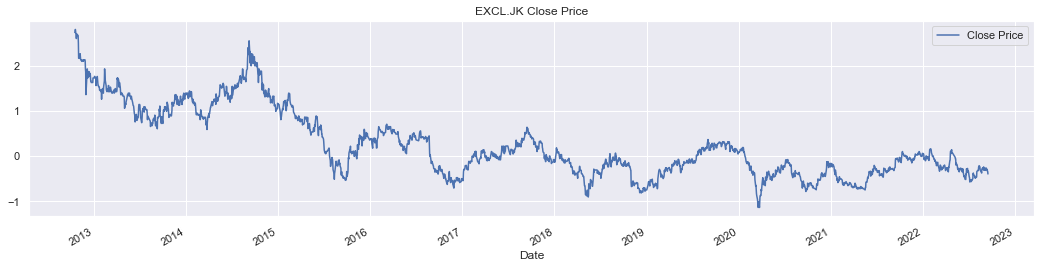

In [3]:
df['Close'].plot(figsize=(18,4))
plt.legend(['Close Price'])
plt.title('EXCL.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [4]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [6]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.75857
[1]	validation_0-rmse:0.75145
[2]	validation_0-rmse:0.74438
[3]	validation_0-rmse:0.73740
[4]	validation_0-rmse:0.73048
[5]	validation_0-rmse:0.72364
[6]	validation_0-rmse:0.71686
[7]	validation_0-rmse:0.71014
[8]	validation_0-rmse:0.70347
[9]	validation_0-rmse:0.69688
[10]	validation_0-rmse:0.69036
[11]	validation_0-rmse:0.68390
[12]	validation_0-rmse:0.67752
[13]	validation_0-rmse:0.67118
[14]	validation_0-rmse:0.66490
[15]	validation_0-rmse:0.65870
[16]	validation_0-rmse:0.65255
[17]	validation_0-rmse:0.64647
[18]	validation_0-rmse:0.64045
[19]	validation_0-rmse:0.63449
[20]	validation_0-rmse:0.62859
[21]	validation_0-rmse:0.62274
[22]	validation_0-rmse:0.61696
[23]	validation_0-rmse:0.61122
[24]	validation_0-rmse:0.60557
[25]	validation_0-rmse:0.59994
[26]	validation_0-rmse:0.59439
[27]	validation_0-rmse:0.58889
[28]	validation_0-rmse:0.58340
[29]	validation_0-rmse:0.57796
[30]	validation_0-rmse:0.57263
[31]	validation_0-rmse:0.56731
[32]	validation_0-

[260]	validation_0-rmse:0.10866
[261]	validation_0-rmse:0.10819
[262]	validation_0-rmse:0.10772
[263]	validation_0-rmse:0.10721
[264]	validation_0-rmse:0.10673
[265]	validation_0-rmse:0.10627
[266]	validation_0-rmse:0.10582
[267]	validation_0-rmse:0.10535
[268]	validation_0-rmse:0.10488
[269]	validation_0-rmse:0.10442
[270]	validation_0-rmse:0.10399
[271]	validation_0-rmse:0.10356
[272]	validation_0-rmse:0.10313
[273]	validation_0-rmse:0.10271
[274]	validation_0-rmse:0.10229
[275]	validation_0-rmse:0.10187
[276]	validation_0-rmse:0.10143
[277]	validation_0-rmse:0.10101
[278]	validation_0-rmse:0.10061
[279]	validation_0-rmse:0.10021
[280]	validation_0-rmse:0.09983
[281]	validation_0-rmse:0.09943
[282]	validation_0-rmse:0.09905
[283]	validation_0-rmse:0.09864
[284]	validation_0-rmse:0.09825
[285]	validation_0-rmse:0.09787
[286]	validation_0-rmse:0.09751
[287]	validation_0-rmse:0.09713
[288]	validation_0-rmse:0.09675
[289]	validation_0-rmse:0.09640
[290]	validation_0-rmse:0.09605
[291]	va

[16]	validation_0-rmse:0.65165
[17]	validation_0-rmse:0.64549
[18]	validation_0-rmse:0.63945
[19]	validation_0-rmse:0.63340
[20]	validation_0-rmse:0.62742
[21]	validation_0-rmse:0.62149
[22]	validation_0-rmse:0.61563
[23]	validation_0-rmse:0.60991
[24]	validation_0-rmse:0.60416
[25]	validation_0-rmse:0.59855
[26]	validation_0-rmse:0.59293
[27]	validation_0-rmse:0.58739
[28]	validation_0-rmse:0.58193
[29]	validation_0-rmse:0.57648
[30]	validation_0-rmse:0.57112
[31]	validation_0-rmse:0.56584
[32]	validation_0-rmse:0.56056
[33]	validation_0-rmse:0.55541
[34]	validation_0-rmse:0.55028
[35]	validation_0-rmse:0.54515
[36]	validation_0-rmse:0.54007
[37]	validation_0-rmse:0.53512
[38]	validation_0-rmse:0.53020
[39]	validation_0-rmse:0.52533
[40]	validation_0-rmse:0.52049
[41]	validation_0-rmse:0.51571
[42]	validation_0-rmse:0.51093
[43]	validation_0-rmse:0.50621
[44]	validation_0-rmse:0.50159
[45]	validation_0-rmse:0.49701
[46]	validation_0-rmse:0.49246
[47]	validation_0-rmse:0.48799
[48]	val

[275]	validation_0-rmse:0.09018
[276]	validation_0-rmse:0.08973
[277]	validation_0-rmse:0.08926
[278]	validation_0-rmse:0.08887
[279]	validation_0-rmse:0.08843
[280]	validation_0-rmse:0.08799
[281]	validation_0-rmse:0.08754
[282]	validation_0-rmse:0.08711
[283]	validation_0-rmse:0.08673
[284]	validation_0-rmse:0.08632
[285]	validation_0-rmse:0.08589
[286]	validation_0-rmse:0.08549
[287]	validation_0-rmse:0.08506
[288]	validation_0-rmse:0.08466
[289]	validation_0-rmse:0.08431
[290]	validation_0-rmse:0.08394
[291]	validation_0-rmse:0.08354
[292]	validation_0-rmse:0.08316
[293]	validation_0-rmse:0.08282
[294]	validation_0-rmse:0.08243
[295]	validation_0-rmse:0.08204
[296]	validation_0-rmse:0.08167
[297]	validation_0-rmse:0.08134
[298]	validation_0-rmse:0.08097
[299]	validation_0-rmse:0.08060
[300]	validation_0-rmse:0.08024
[301]	validation_0-rmse:0.07991
[302]	validation_0-rmse:0.07958
[303]	validation_0-rmse:0.07924
[304]	validation_0-rmse:0.07888
[305]	validation_0-rmse:0.07854
[306]	va

[33]	validation_0-rmse:0.55303
[34]	validation_0-rmse:0.54782
[35]	validation_0-rmse:0.54267
[36]	validation_0-rmse:0.53758
[37]	validation_0-rmse:0.53253
[38]	validation_0-rmse:0.52752
[39]	validation_0-rmse:0.52258
[40]	validation_0-rmse:0.51770
[41]	validation_0-rmse:0.51286
[42]	validation_0-rmse:0.50807
[43]	validation_0-rmse:0.50332
[44]	validation_0-rmse:0.49862
[45]	validation_0-rmse:0.49397
[46]	validation_0-rmse:0.48935
[47]	validation_0-rmse:0.48480
[48]	validation_0-rmse:0.48029
[49]	validation_0-rmse:0.47583
[50]	validation_0-rmse:0.47141
[51]	validation_0-rmse:0.46705
[52]	validation_0-rmse:0.46272
[53]	validation_0-rmse:0.45844
[54]	validation_0-rmse:0.45418
[55]	validation_0-rmse:0.44998
[56]	validation_0-rmse:0.44583
[57]	validation_0-rmse:0.44172
[58]	validation_0-rmse:0.43766
[59]	validation_0-rmse:0.43363
[60]	validation_0-rmse:0.42965
[61]	validation_0-rmse:0.42571
[62]	validation_0-rmse:0.42181
[63]	validation_0-rmse:0.41795
[64]	validation_0-rmse:0.41408
[65]	val

[291]	validation_0-rmse:0.07728
[292]	validation_0-rmse:0.07692
[293]	validation_0-rmse:0.07655
[294]	validation_0-rmse:0.07616
[295]	validation_0-rmse:0.07579
[296]	validation_0-rmse:0.07543
[297]	validation_0-rmse:0.07507
[298]	validation_0-rmse:0.07472
[299]	validation_0-rmse:0.07435
[300]	validation_0-rmse:0.07400
[301]	validation_0-rmse:0.07366
[302]	validation_0-rmse:0.07334
[303]	validation_0-rmse:0.07300
[304]	validation_0-rmse:0.07266
[305]	validation_0-rmse:0.07235
[306]	validation_0-rmse:0.07200
[307]	validation_0-rmse:0.07169
[308]	validation_0-rmse:0.07135
[309]	validation_0-rmse:0.07105
[310]	validation_0-rmse:0.07072
[311]	validation_0-rmse:0.07040
[312]	validation_0-rmse:0.07008
[313]	validation_0-rmse:0.06976
[314]	validation_0-rmse:0.06946
[315]	validation_0-rmse:0.06916
[316]	validation_0-rmse:0.06887
[317]	validation_0-rmse:0.06858
[318]	validation_0-rmse:0.06827
[319]	validation_0-rmse:0.06797
[320]	validation_0-rmse:0.06767
[321]	validation_0-rmse:0.06738
[322]	va

[49]	validation_0-rmse:0.48173
[50]	validation_0-rmse:0.47737
[51]	validation_0-rmse:0.47308
[52]	validation_0-rmse:0.46881
[53]	validation_0-rmse:0.46460
[54]	validation_0-rmse:0.46041
[55]	validation_0-rmse:0.45631
[56]	validation_0-rmse:0.45217
[57]	validation_0-rmse:0.44808
[58]	validation_0-rmse:0.44407
[59]	validation_0-rmse:0.44012
[60]	validation_0-rmse:0.43615
[61]	validation_0-rmse:0.43227
[62]	validation_0-rmse:0.42845
[63]	validation_0-rmse:0.42464
[64]	validation_0-rmse:0.42083
[65]	validation_0-rmse:0.41714
[66]	validation_0-rmse:0.41345
[67]	validation_0-rmse:0.40975
[68]	validation_0-rmse:0.40614
[69]	validation_0-rmse:0.40251
[70]	validation_0-rmse:0.39900
[71]	validation_0-rmse:0.39550
[72]	validation_0-rmse:0.39198
[73]	validation_0-rmse:0.38857
[74]	validation_0-rmse:0.38516
[75]	validation_0-rmse:0.38173
[76]	validation_0-rmse:0.37841
[77]	validation_0-rmse:0.37510
[78]	validation_0-rmse:0.37179
[79]	validation_0-rmse:0.36860
[80]	validation_0-rmse:0.36542
[81]	val

[307]	validation_0-rmse:0.07726
[308]	validation_0-rmse:0.07687
[309]	validation_0-rmse:0.07648
[310]	validation_0-rmse:0.07613
[311]	validation_0-rmse:0.07580
[312]	validation_0-rmse:0.07545
[313]	validation_0-rmse:0.07512
[314]	validation_0-rmse:0.07477
[315]	validation_0-rmse:0.07444
[316]	validation_0-rmse:0.07409
[317]	validation_0-rmse:0.07377
[318]	validation_0-rmse:0.07339
[319]	validation_0-rmse:0.07310
[320]	validation_0-rmse:0.07279
[321]	validation_0-rmse:0.07242
[322]	validation_0-rmse:0.07214
[323]	validation_0-rmse:0.07176
[324]	validation_0-rmse:0.07145
[325]	validation_0-rmse:0.07118
[326]	validation_0-rmse:0.07083
[327]	validation_0-rmse:0.07054
[328]	validation_0-rmse:0.07018
[329]	validation_0-rmse:0.06993
[330]	validation_0-rmse:0.06959
[331]	validation_0-rmse:0.06932
[332]	validation_0-rmse:0.06898
[333]	validation_0-rmse:0.06873
[334]	validation_0-rmse:0.06846
[335]	validation_0-rmse:0.06812
[336]	validation_0-rmse:0.06788
[337]	validation_0-rmse:0.06757
[338]	va

[66]	validation_0-rmse:0.40835
[67]	validation_0-rmse:0.40467
[68]	validation_0-rmse:0.40102
[69]	validation_0-rmse:0.39742
[70]	validation_0-rmse:0.39385
[71]	validation_0-rmse:0.39031
[72]	validation_0-rmse:0.38681
[73]	validation_0-rmse:0.38335
[74]	validation_0-rmse:0.37992
[75]	validation_0-rmse:0.37654
[76]	validation_0-rmse:0.37318
[77]	validation_0-rmse:0.36986
[78]	validation_0-rmse:0.36658
[79]	validation_0-rmse:0.36332
[80]	validation_0-rmse:0.36009
[81]	validation_0-rmse:0.35690
[82]	validation_0-rmse:0.35374
[83]	validation_0-rmse:0.35062
[84]	validation_0-rmse:0.34753
[85]	validation_0-rmse:0.34448
[86]	validation_0-rmse:0.34146
[87]	validation_0-rmse:0.33846
[88]	validation_0-rmse:0.33549
[89]	validation_0-rmse:0.33255
[90]	validation_0-rmse:0.32966
[91]	validation_0-rmse:0.32679
[92]	validation_0-rmse:0.32394
[93]	validation_0-rmse:0.32113
[94]	validation_0-rmse:0.31834
[95]	validation_0-rmse:0.31558
[96]	validation_0-rmse:0.31286
[97]	validation_0-rmse:0.31015
[98]	val

[324]	validation_0-rmse:0.07121
[325]	validation_0-rmse:0.07093
[326]	validation_0-rmse:0.07065
[327]	validation_0-rmse:0.07037
[328]	validation_0-rmse:0.07009
[329]	validation_0-rmse:0.06979
[330]	validation_0-rmse:0.06950
[331]	validation_0-rmse:0.06924
[332]	validation_0-rmse:0.06897
[333]	validation_0-rmse:0.06871
[334]	validation_0-rmse:0.06845
[335]	validation_0-rmse:0.06819
[336]	validation_0-rmse:0.06793
[337]	validation_0-rmse:0.06767
[338]	validation_0-rmse:0.06742
[339]	validation_0-rmse:0.06716
[340]	validation_0-rmse:0.06691
[341]	validation_0-rmse:0.06667
[342]	validation_0-rmse:0.06641
[343]	validation_0-rmse:0.06616
[344]	validation_0-rmse:0.06592
[345]	validation_0-rmse:0.06568
[346]	validation_0-rmse:0.06545
[347]	validation_0-rmse:0.06521
[348]	validation_0-rmse:0.06498
[349]	validation_0-rmse:0.06474
[350]	validation_0-rmse:0.06450
[351]	validation_0-rmse:0.06427
[352]	validation_0-rmse:0.06405
[353]	validation_0-rmse:0.06383
[354]	validation_0-rmse:0.06360
[355]	va

[83]	validation_0-rmse:0.35510
[84]	validation_0-rmse:0.35202
[85]	validation_0-rmse:0.34897
[86]	validation_0-rmse:0.34598
[87]	validation_0-rmse:0.34301
[88]	validation_0-rmse:0.34007
[89]	validation_0-rmse:0.33716
[90]	validation_0-rmse:0.33426
[91]	validation_0-rmse:0.33143
[92]	validation_0-rmse:0.32861
[93]	validation_0-rmse:0.32582
[94]	validation_0-rmse:0.32303
[95]	validation_0-rmse:0.32028
[96]	validation_0-rmse:0.31759
[97]	validation_0-rmse:0.31494
[98]	validation_0-rmse:0.31230
[99]	validation_0-rmse:0.30966
[100]	validation_0-rmse:0.30711
[101]	validation_0-rmse:0.30457
[102]	validation_0-rmse:0.30201
[103]	validation_0-rmse:0.29951
[104]	validation_0-rmse:0.29701
[105]	validation_0-rmse:0.29454
[106]	validation_0-rmse:0.29210
[107]	validation_0-rmse:0.28977
[108]	validation_0-rmse:0.28736
[109]	validation_0-rmse:0.28503
[110]	validation_0-rmse:0.28272
[111]	validation_0-rmse:0.28048
[112]	validation_0-rmse:0.27821
[113]	validation_0-rmse:0.27597
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.08234
[341]	validation_0-rmse:0.08215
[342]	validation_0-rmse:0.08195
[343]	validation_0-rmse:0.08177
[344]	validation_0-rmse:0.08156
[345]	validation_0-rmse:0.08135
[346]	validation_0-rmse:0.08116
[347]	validation_0-rmse:0.08098
[348]	validation_0-rmse:0.08080
[349]	validation_0-rmse:0.08059
[350]	validation_0-rmse:0.08038
[351]	validation_0-rmse:0.08021
[352]	validation_0-rmse:0.08002
[353]	validation_0-rmse:0.07980
[354]	validation_0-rmse:0.07963
[355]	validation_0-rmse:0.07947
[356]	validation_0-rmse:0.07929
[357]	validation_0-rmse:0.07913
[358]	validation_0-rmse:0.07894
[359]	validation_0-rmse:0.07878
[360]	validation_0-rmse:0.07860
[361]	validation_0-rmse:0.07843
[362]	validation_0-rmse:0.07826
[363]	validation_0-rmse:0.07809
[364]	validation_0-rmse:0.07791
[365]	validation_0-rmse:0.07773
[366]	validation_0-rmse:0.07757
[367]	validation_0-rmse:0.07744
[368]	validation_0-rmse:0.07725
[369]	validation_0-rmse:0.07708
[370]	validation_0-rmse:0.07693
[371]	va

[597]	validation_0-rmse:0.06048
[598]	validation_0-rmse:0.06046
[599]	validation_0-rmse:0.06045
[0]	validation_0-rmse:0.75850
[1]	validation_0-rmse:0.75129
[2]	validation_0-rmse:0.74416
[3]	validation_0-rmse:0.73710
[4]	validation_0-rmse:0.73011
[5]	validation_0-rmse:0.72322
[6]	validation_0-rmse:0.71638
[7]	validation_0-rmse:0.70961
[8]	validation_0-rmse:0.70294
[9]	validation_0-rmse:0.69633
[10]	validation_0-rmse:0.68973
[11]	validation_0-rmse:0.68325
[12]	validation_0-rmse:0.67675
[13]	validation_0-rmse:0.67036
[14]	validation_0-rmse:0.66407
[15]	validation_0-rmse:0.65781
[16]	validation_0-rmse:0.65165
[17]	validation_0-rmse:0.64549
[18]	validation_0-rmse:0.63945
[19]	validation_0-rmse:0.63340
[20]	validation_0-rmse:0.62742
[21]	validation_0-rmse:0.62149
[22]	validation_0-rmse:0.61563
[23]	validation_0-rmse:0.60991
[24]	validation_0-rmse:0.60416
[25]	validation_0-rmse:0.59855
[26]	validation_0-rmse:0.59293
[27]	validation_0-rmse:0.58739
[28]	validation_0-rmse:0.58193
[29]	validation

[257]	validation_0-rmse:0.09912
[258]	validation_0-rmse:0.09856
[259]	validation_0-rmse:0.09805
[260]	validation_0-rmse:0.09753
[261]	validation_0-rmse:0.09699
[262]	validation_0-rmse:0.09649
[263]	validation_0-rmse:0.09596
[264]	validation_0-rmse:0.09544
[265]	validation_0-rmse:0.09498
[266]	validation_0-rmse:0.09447
[267]	validation_0-rmse:0.09397
[268]	validation_0-rmse:0.09348
[269]	validation_0-rmse:0.09299
[270]	validation_0-rmse:0.09250
[271]	validation_0-rmse:0.09201
[272]	validation_0-rmse:0.09158
[273]	validation_0-rmse:0.09113
[274]	validation_0-rmse:0.09064
[275]	validation_0-rmse:0.09018
[276]	validation_0-rmse:0.08973
[277]	validation_0-rmse:0.08926
[278]	validation_0-rmse:0.08887
[279]	validation_0-rmse:0.08843
[280]	validation_0-rmse:0.08799
[281]	validation_0-rmse:0.08754
[282]	validation_0-rmse:0.08711
[283]	validation_0-rmse:0.08673
[284]	validation_0-rmse:0.08632
[285]	validation_0-rmse:0.08589
[286]	validation_0-rmse:0.08549
[287]	validation_0-rmse:0.08506
[288]	va

[514]	validation_0-rmse:0.04960
[515]	validation_0-rmse:0.04953
[516]	validation_0-rmse:0.04948
[517]	validation_0-rmse:0.04945
[518]	validation_0-rmse:0.04940
[519]	validation_0-rmse:0.04934
[520]	validation_0-rmse:0.04929
[521]	validation_0-rmse:0.04924
[522]	validation_0-rmse:0.04918
[523]	validation_0-rmse:0.04912
[524]	validation_0-rmse:0.04907
[525]	validation_0-rmse:0.04902
[526]	validation_0-rmse:0.04897
[527]	validation_0-rmse:0.04892
[528]	validation_0-rmse:0.04887
[529]	validation_0-rmse:0.04880
[530]	validation_0-rmse:0.04874
[531]	validation_0-rmse:0.04869
[532]	validation_0-rmse:0.04864
[533]	validation_0-rmse:0.04858
[534]	validation_0-rmse:0.04853
[535]	validation_0-rmse:0.04849
[536]	validation_0-rmse:0.04844
[537]	validation_0-rmse:0.04841
[538]	validation_0-rmse:0.04836
[539]	validation_0-rmse:0.04831
[540]	validation_0-rmse:0.04826
[541]	validation_0-rmse:0.04822
[542]	validation_0-rmse:0.04817
[543]	validation_0-rmse:0.04815
[544]	validation_0-rmse:0.04812
[545]	va

[174]	validation_0-rmse:0.16256
[175]	validation_0-rmse:0.16134
[176]	validation_0-rmse:0.16008
[177]	validation_0-rmse:0.15885
[178]	validation_0-rmse:0.15768
[179]	validation_0-rmse:0.15646
[180]	validation_0-rmse:0.15529
[181]	validation_0-rmse:0.15414
[182]	validation_0-rmse:0.15296
[183]	validation_0-rmse:0.15183
[184]	validation_0-rmse:0.15070
[185]	validation_0-rmse:0.14959
[186]	validation_0-rmse:0.14845
[187]	validation_0-rmse:0.14738
[188]	validation_0-rmse:0.14626
[189]	validation_0-rmse:0.14519
[190]	validation_0-rmse:0.14413
[191]	validation_0-rmse:0.14309
[192]	validation_0-rmse:0.14204
[193]	validation_0-rmse:0.14103
[194]	validation_0-rmse:0.14000
[195]	validation_0-rmse:0.13900
[196]	validation_0-rmse:0.13799
[197]	validation_0-rmse:0.13701
[198]	validation_0-rmse:0.13603
[199]	validation_0-rmse:0.13507
[200]	validation_0-rmse:0.13410
[201]	validation_0-rmse:0.13316
[202]	validation_0-rmse:0.13223
[203]	validation_0-rmse:0.13130
[204]	validation_0-rmse:0.13038
[205]	va

[431]	validation_0-rmse:0.04747
[432]	validation_0-rmse:0.04737
[433]	validation_0-rmse:0.04727
[434]	validation_0-rmse:0.04716
[435]	validation_0-rmse:0.04706
[436]	validation_0-rmse:0.04696
[437]	validation_0-rmse:0.04686
[438]	validation_0-rmse:0.04675
[439]	validation_0-rmse:0.04665
[440]	validation_0-rmse:0.04655
[441]	validation_0-rmse:0.04644
[442]	validation_0-rmse:0.04636
[443]	validation_0-rmse:0.04626
[444]	validation_0-rmse:0.04616
[445]	validation_0-rmse:0.04605
[446]	validation_0-rmse:0.04596
[447]	validation_0-rmse:0.04587
[448]	validation_0-rmse:0.04578
[449]	validation_0-rmse:0.04568
[450]	validation_0-rmse:0.04560
[451]	validation_0-rmse:0.04550
[452]	validation_0-rmse:0.04543
[453]	validation_0-rmse:0.04534
[454]	validation_0-rmse:0.04525
[455]	validation_0-rmse:0.04516
[456]	validation_0-rmse:0.04507
[457]	validation_0-rmse:0.04499
[458]	validation_0-rmse:0.04491
[459]	validation_0-rmse:0.04482
[460]	validation_0-rmse:0.04474
[461]	validation_0-rmse:0.04466
[462]	va

[91]	validation_0-rmse:0.33230
[92]	validation_0-rmse:0.32942
[93]	validation_0-rmse:0.32664
[94]	validation_0-rmse:0.32389
[95]	validation_0-rmse:0.32116
[96]	validation_0-rmse:0.31844
[97]	validation_0-rmse:0.31576
[98]	validation_0-rmse:0.31314
[99]	validation_0-rmse:0.31051
[100]	validation_0-rmse:0.30791
[101]	validation_0-rmse:0.30536
[102]	validation_0-rmse:0.30276
[103]	validation_0-rmse:0.30024
[104]	validation_0-rmse:0.29778
[105]	validation_0-rmse:0.29524
[106]	validation_0-rmse:0.29280
[107]	validation_0-rmse:0.29031
[108]	validation_0-rmse:0.28784
[109]	validation_0-rmse:0.28550
[110]	validation_0-rmse:0.28308
[111]	validation_0-rmse:0.28077
[112]	validation_0-rmse:0.27839
[113]	validation_0-rmse:0.27606
[114]	validation_0-rmse:0.27380
[115]	validation_0-rmse:0.27155
[116]	validation_0-rmse:0.26933
[117]	validation_0-rmse:0.26713
[118]	validation_0-rmse:0.26499
[119]	validation_0-rmse:0.26286
[120]	validation_0-rmse:0.26078
[121]	validation_0-rmse:0.25868
[122]	validation_

[348]	validation_0-rmse:0.06464
[349]	validation_0-rmse:0.06443
[350]	validation_0-rmse:0.06417
[351]	validation_0-rmse:0.06393
[352]	validation_0-rmse:0.06365
[353]	validation_0-rmse:0.06336
[354]	validation_0-rmse:0.06312
[355]	validation_0-rmse:0.06287
[356]	validation_0-rmse:0.06260
[357]	validation_0-rmse:0.06237
[358]	validation_0-rmse:0.06215
[359]	validation_0-rmse:0.06188
[360]	validation_0-rmse:0.06162
[361]	validation_0-rmse:0.06143
[362]	validation_0-rmse:0.06117
[363]	validation_0-rmse:0.06096
[364]	validation_0-rmse:0.06071
[365]	validation_0-rmse:0.06046
[366]	validation_0-rmse:0.06025
[367]	validation_0-rmse:0.06007
[368]	validation_0-rmse:0.05986
[369]	validation_0-rmse:0.05968
[370]	validation_0-rmse:0.05948
[371]	validation_0-rmse:0.05930
[372]	validation_0-rmse:0.05911
[373]	validation_0-rmse:0.05889
[374]	validation_0-rmse:0.05870
[375]	validation_0-rmse:0.05851
[376]	validation_0-rmse:0.05835
[377]	validation_0-rmse:0.05817
[378]	validation_0-rmse:0.05797
[379]	va

[5]	validation_0-rmse:0.72295
[6]	validation_0-rmse:0.71605
[7]	validation_0-rmse:0.70924
[8]	validation_0-rmse:0.70245
[9]	validation_0-rmse:0.69577
[10]	validation_0-rmse:0.68917
[11]	validation_0-rmse:0.68259
[12]	validation_0-rmse:0.67612
[13]	validation_0-rmse:0.66967
[14]	validation_0-rmse:0.66334
[15]	validation_0-rmse:0.65702
[16]	validation_0-rmse:0.65076
[17]	validation_0-rmse:0.64460
[18]	validation_0-rmse:0.63847
[19]	validation_0-rmse:0.63245
[20]	validation_0-rmse:0.62644
[21]	validation_0-rmse:0.62056
[22]	validation_0-rmse:0.61470
[23]	validation_0-rmse:0.60893
[24]	validation_0-rmse:0.60320
[25]	validation_0-rmse:0.59752
[26]	validation_0-rmse:0.59191
[27]	validation_0-rmse:0.58632
[28]	validation_0-rmse:0.58079
[29]	validation_0-rmse:0.57534
[30]	validation_0-rmse:0.56996
[31]	validation_0-rmse:0.56463
[32]	validation_0-rmse:0.55932
[33]	validation_0-rmse:0.55409
[34]	validation_0-rmse:0.54891
[35]	validation_0-rmse:0.54379
[36]	validation_0-rmse:0.53872
[37]	validati

[265]	validation_0-rmse:0.09362
[266]	validation_0-rmse:0.09311
[267]	validation_0-rmse:0.09262
[268]	validation_0-rmse:0.09213
[269]	validation_0-rmse:0.09164
[270]	validation_0-rmse:0.09119
[271]	validation_0-rmse:0.09073
[272]	validation_0-rmse:0.09025
[273]	validation_0-rmse:0.08980
[274]	validation_0-rmse:0.08935
[275]	validation_0-rmse:0.08889
[276]	validation_0-rmse:0.08845
[277]	validation_0-rmse:0.08800
[278]	validation_0-rmse:0.08757
[279]	validation_0-rmse:0.08712
[280]	validation_0-rmse:0.08670
[281]	validation_0-rmse:0.08626
[282]	validation_0-rmse:0.08584
[283]	validation_0-rmse:0.08541
[284]	validation_0-rmse:0.08501
[285]	validation_0-rmse:0.08461
[286]	validation_0-rmse:0.08421
[287]	validation_0-rmse:0.08379
[288]	validation_0-rmse:0.08341
[289]	validation_0-rmse:0.08301
[290]	validation_0-rmse:0.08263
[291]	validation_0-rmse:0.08222
[292]	validation_0-rmse:0.08185
[293]	validation_0-rmse:0.08148
[294]	validation_0-rmse:0.08109
[295]	validation_0-rmse:0.08073
[296]	va

[522]	validation_0-rmse:0.04303
[523]	validation_0-rmse:0.04296
[524]	validation_0-rmse:0.04288
[525]	validation_0-rmse:0.04283
[526]	validation_0-rmse:0.04277
[527]	validation_0-rmse:0.04273
[528]	validation_0-rmse:0.04266
[529]	validation_0-rmse:0.04259
[530]	validation_0-rmse:0.04254
[531]	validation_0-rmse:0.04248
[532]	validation_0-rmse:0.04243
[533]	validation_0-rmse:0.04238
[534]	validation_0-rmse:0.04233
[535]	validation_0-rmse:0.04227
[536]	validation_0-rmse:0.04223
[537]	validation_0-rmse:0.04217
[538]	validation_0-rmse:0.04213
[539]	validation_0-rmse:0.04206
[540]	validation_0-rmse:0.04200
[541]	validation_0-rmse:0.04195
[542]	validation_0-rmse:0.04189
[543]	validation_0-rmse:0.04183
[544]	validation_0-rmse:0.04178
[545]	validation_0-rmse:0.04172
[546]	validation_0-rmse:0.04168
[547]	validation_0-rmse:0.04163
[548]	validation_0-rmse:0.04159
[549]	validation_0-rmse:0.04155
[550]	validation_0-rmse:0.04150
[551]	validation_0-rmse:0.04144
[552]	validation_0-rmse:0.04140
[553]	va

[182]	validation_0-rmse:0.16691
[183]	validation_0-rmse:0.16580
[184]	validation_0-rmse:0.16473
[185]	validation_0-rmse:0.16368
[186]	validation_0-rmse:0.16262
[187]	validation_0-rmse:0.16156
[188]	validation_0-rmse:0.16055
[189]	validation_0-rmse:0.15957
[190]	validation_0-rmse:0.15855
[191]	validation_0-rmse:0.15758
[192]	validation_0-rmse:0.15659
[193]	validation_0-rmse:0.15559
[194]	validation_0-rmse:0.15460
[195]	validation_0-rmse:0.15366
[196]	validation_0-rmse:0.15271
[197]	validation_0-rmse:0.15177
[198]	validation_0-rmse:0.15087
[199]	validation_0-rmse:0.14995
[200]	validation_0-rmse:0.14902
[201]	validation_0-rmse:0.14815
[202]	validation_0-rmse:0.14731
[203]	validation_0-rmse:0.14641
[204]	validation_0-rmse:0.14552
[205]	validation_0-rmse:0.14466
[206]	validation_0-rmse:0.14381
[207]	validation_0-rmse:0.14297
[208]	validation_0-rmse:0.14215
[209]	validation_0-rmse:0.14130
[210]	validation_0-rmse:0.14046
[211]	validation_0-rmse:0.13970
[212]	validation_0-rmse:0.13890
[213]	va

[439]	validation_0-rmse:0.06887
[440]	validation_0-rmse:0.06876
[441]	validation_0-rmse:0.06868
[442]	validation_0-rmse:0.06861
[443]	validation_0-rmse:0.06853
[444]	validation_0-rmse:0.06845
[445]	validation_0-rmse:0.06836
[446]	validation_0-rmse:0.06828
[447]	validation_0-rmse:0.06821
[448]	validation_0-rmse:0.06810
[449]	validation_0-rmse:0.06803
[450]	validation_0-rmse:0.06796
[451]	validation_0-rmse:0.06789
[452]	validation_0-rmse:0.06781
[453]	validation_0-rmse:0.06771
[454]	validation_0-rmse:0.06764
[455]	validation_0-rmse:0.06755
[456]	validation_0-rmse:0.06748
[457]	validation_0-rmse:0.06740
[458]	validation_0-rmse:0.06734
[459]	validation_0-rmse:0.06724
[460]	validation_0-rmse:0.06717
[461]	validation_0-rmse:0.06711
[462]	validation_0-rmse:0.06704
[463]	validation_0-rmse:0.06698
[464]	validation_0-rmse:0.06688
[465]	validation_0-rmse:0.06680
[466]	validation_0-rmse:0.06674
[467]	validation_0-rmse:0.06667
[468]	validation_0-rmse:0.06658
[469]	validation_0-rmse:0.06652
[470]	va

[696]	validation_0-rmse:0.05849
[697]	validation_0-rmse:0.05848
[698]	validation_0-rmse:0.05847
[699]	validation_0-rmse:0.05844
[0]	validation_0-rmse:0.75850
[1]	validation_0-rmse:0.75129
[2]	validation_0-rmse:0.74416
[3]	validation_0-rmse:0.73710
[4]	validation_0-rmse:0.73011
[5]	validation_0-rmse:0.72322
[6]	validation_0-rmse:0.71638
[7]	validation_0-rmse:0.70961
[8]	validation_0-rmse:0.70294
[9]	validation_0-rmse:0.69633
[10]	validation_0-rmse:0.68973
[11]	validation_0-rmse:0.68325
[12]	validation_0-rmse:0.67675
[13]	validation_0-rmse:0.67036
[14]	validation_0-rmse:0.66407
[15]	validation_0-rmse:0.65781
[16]	validation_0-rmse:0.65165
[17]	validation_0-rmse:0.64549
[18]	validation_0-rmse:0.63945
[19]	validation_0-rmse:0.63340
[20]	validation_0-rmse:0.62742
[21]	validation_0-rmse:0.62149
[22]	validation_0-rmse:0.61563
[23]	validation_0-rmse:0.60991
[24]	validation_0-rmse:0.60416
[25]	validation_0-rmse:0.59855
[26]	validation_0-rmse:0.59293
[27]	validation_0-rmse:0.58739
[28]	validatio

[256]	validation_0-rmse:0.09963
[257]	validation_0-rmse:0.09912
[258]	validation_0-rmse:0.09856
[259]	validation_0-rmse:0.09805
[260]	validation_0-rmse:0.09753
[261]	validation_0-rmse:0.09699
[262]	validation_0-rmse:0.09649
[263]	validation_0-rmse:0.09596
[264]	validation_0-rmse:0.09544
[265]	validation_0-rmse:0.09498
[266]	validation_0-rmse:0.09447
[267]	validation_0-rmse:0.09397
[268]	validation_0-rmse:0.09348
[269]	validation_0-rmse:0.09299
[270]	validation_0-rmse:0.09250
[271]	validation_0-rmse:0.09201
[272]	validation_0-rmse:0.09158
[273]	validation_0-rmse:0.09113
[274]	validation_0-rmse:0.09064
[275]	validation_0-rmse:0.09018
[276]	validation_0-rmse:0.08973
[277]	validation_0-rmse:0.08926
[278]	validation_0-rmse:0.08887
[279]	validation_0-rmse:0.08843
[280]	validation_0-rmse:0.08799
[281]	validation_0-rmse:0.08754
[282]	validation_0-rmse:0.08711
[283]	validation_0-rmse:0.08673
[284]	validation_0-rmse:0.08632
[285]	validation_0-rmse:0.08589
[286]	validation_0-rmse:0.08549
[287]	va

[513]	validation_0-rmse:0.04964
[514]	validation_0-rmse:0.04960
[515]	validation_0-rmse:0.04953
[516]	validation_0-rmse:0.04948
[517]	validation_0-rmse:0.04945
[518]	validation_0-rmse:0.04940
[519]	validation_0-rmse:0.04934
[520]	validation_0-rmse:0.04929
[521]	validation_0-rmse:0.04924
[522]	validation_0-rmse:0.04918
[523]	validation_0-rmse:0.04912
[524]	validation_0-rmse:0.04907
[525]	validation_0-rmse:0.04902
[526]	validation_0-rmse:0.04897
[527]	validation_0-rmse:0.04892
[528]	validation_0-rmse:0.04887
[529]	validation_0-rmse:0.04880
[530]	validation_0-rmse:0.04874
[531]	validation_0-rmse:0.04869
[532]	validation_0-rmse:0.04864
[533]	validation_0-rmse:0.04858
[534]	validation_0-rmse:0.04853
[535]	validation_0-rmse:0.04849
[536]	validation_0-rmse:0.04844
[537]	validation_0-rmse:0.04841
[538]	validation_0-rmse:0.04836
[539]	validation_0-rmse:0.04831
[540]	validation_0-rmse:0.04826
[541]	validation_0-rmse:0.04822
[542]	validation_0-rmse:0.04817
[543]	validation_0-rmse:0.04815
[544]	va

[72]	validation_0-rmse:0.38474
[73]	validation_0-rmse:0.38126
[74]	validation_0-rmse:0.37779
[75]	validation_0-rmse:0.37436
[76]	validation_0-rmse:0.37097
[77]	validation_0-rmse:0.36766
[78]	validation_0-rmse:0.36433
[79]	validation_0-rmse:0.36104
[80]	validation_0-rmse:0.35779
[81]	validation_0-rmse:0.35457
[82]	validation_0-rmse:0.35138
[83]	validation_0-rmse:0.34824
[84]	validation_0-rmse:0.34508
[85]	validation_0-rmse:0.34201
[86]	validation_0-rmse:0.33896
[87]	validation_0-rmse:0.33595
[88]	validation_0-rmse:0.33295
[89]	validation_0-rmse:0.32999
[90]	validation_0-rmse:0.32707
[91]	validation_0-rmse:0.32414
[92]	validation_0-rmse:0.32130
[93]	validation_0-rmse:0.31847
[94]	validation_0-rmse:0.31565
[95]	validation_0-rmse:0.31285
[96]	validation_0-rmse:0.31014
[97]	validation_0-rmse:0.30740
[98]	validation_0-rmse:0.30468
[99]	validation_0-rmse:0.30202
[100]	validation_0-rmse:0.29938
[101]	validation_0-rmse:0.29677
[102]	validation_0-rmse:0.29417
[103]	validation_0-rmse:0.29158
[104

[329]	validation_0-rmse:0.06519
[330]	validation_0-rmse:0.06494
[331]	validation_0-rmse:0.06467
[332]	validation_0-rmse:0.06442
[333]	validation_0-rmse:0.06417
[334]	validation_0-rmse:0.06390
[335]	validation_0-rmse:0.06364
[336]	validation_0-rmse:0.06340
[337]	validation_0-rmse:0.06316
[338]	validation_0-rmse:0.06293
[339]	validation_0-rmse:0.06267
[340]	validation_0-rmse:0.06243
[341]	validation_0-rmse:0.06220
[342]	validation_0-rmse:0.06196
[343]	validation_0-rmse:0.06171
[344]	validation_0-rmse:0.06147
[345]	validation_0-rmse:0.06125
[346]	validation_0-rmse:0.06101
[347]	validation_0-rmse:0.06080
[348]	validation_0-rmse:0.06057
[349]	validation_0-rmse:0.06036
[350]	validation_0-rmse:0.06014
[351]	validation_0-rmse:0.05992
[352]	validation_0-rmse:0.05970
[353]	validation_0-rmse:0.05948
[354]	validation_0-rmse:0.05928
[355]	validation_0-rmse:0.05908
[356]	validation_0-rmse:0.05886
[357]	validation_0-rmse:0.05866
[358]	validation_0-rmse:0.05846
[359]	validation_0-rmse:0.05826
[360]	va

[585]	validation_0-rmse:0.03823
[586]	validation_0-rmse:0.03820
[587]	validation_0-rmse:0.03817
[588]	validation_0-rmse:0.03813
[589]	validation_0-rmse:0.03810
[590]	validation_0-rmse:0.03807
[591]	validation_0-rmse:0.03803
[592]	validation_0-rmse:0.03801
[593]	validation_0-rmse:0.03797
[594]	validation_0-rmse:0.03794
[595]	validation_0-rmse:0.03790
[596]	validation_0-rmse:0.03788
[597]	validation_0-rmse:0.03785
[598]	validation_0-rmse:0.03781
[599]	validation_0-rmse:0.03779
[600]	validation_0-rmse:0.03775
[601]	validation_0-rmse:0.03773
[602]	validation_0-rmse:0.03769
[603]	validation_0-rmse:0.03766
[604]	validation_0-rmse:0.03763
[605]	validation_0-rmse:0.03761
[606]	validation_0-rmse:0.03758
[607]	validation_0-rmse:0.03755
[608]	validation_0-rmse:0.03752
[609]	validation_0-rmse:0.03750
[610]	validation_0-rmse:0.03748
[611]	validation_0-rmse:0.03744
[612]	validation_0-rmse:0.03742
[613]	validation_0-rmse:0.03739
[614]	validation_0-rmse:0.03737
[615]	validation_0-rmse:0.03735
[616]	va

[145]	validation_0-rmse:0.21385
[146]	validation_0-rmse:0.21217
[147]	validation_0-rmse:0.21056
[148]	validation_0-rmse:0.20897
[149]	validation_0-rmse:0.20739
[150]	validation_0-rmse:0.20582
[151]	validation_0-rmse:0.20422
[152]	validation_0-rmse:0.20268
[153]	validation_0-rmse:0.20117
[154]	validation_0-rmse:0.19968
[155]	validation_0-rmse:0.19818
[156]	validation_0-rmse:0.19672
[157]	validation_0-rmse:0.19521
[158]	validation_0-rmse:0.19377
[159]	validation_0-rmse:0.19229
[160]	validation_0-rmse:0.19088
[161]	validation_0-rmse:0.18949
[162]	validation_0-rmse:0.18811
[163]	validation_0-rmse:0.18668
[164]	validation_0-rmse:0.18531
[165]	validation_0-rmse:0.18396
[166]	validation_0-rmse:0.18264
[167]	validation_0-rmse:0.18129
[168]	validation_0-rmse:0.17999
[169]	validation_0-rmse:0.17863
[170]	validation_0-rmse:0.17735
[171]	validation_0-rmse:0.17607
[172]	validation_0-rmse:0.17483
[173]	validation_0-rmse:0.17358
[174]	validation_0-rmse:0.17236
[175]	validation_0-rmse:0.17112
[176]	va

[402]	validation_0-rmse:0.05389
[403]	validation_0-rmse:0.05375
[404]	validation_0-rmse:0.05359
[405]	validation_0-rmse:0.05341
[406]	validation_0-rmse:0.05327
[407]	validation_0-rmse:0.05310
[408]	validation_0-rmse:0.05294
[409]	validation_0-rmse:0.05281
[410]	validation_0-rmse:0.05268
[411]	validation_0-rmse:0.05251
[412]	validation_0-rmse:0.05237
[413]	validation_0-rmse:0.05220
[414]	validation_0-rmse:0.05208
[415]	validation_0-rmse:0.05195
[416]	validation_0-rmse:0.05180
[417]	validation_0-rmse:0.05165
[418]	validation_0-rmse:0.05151
[419]	validation_0-rmse:0.05134
[420]	validation_0-rmse:0.05122
[421]	validation_0-rmse:0.05108
[422]	validation_0-rmse:0.05095
[423]	validation_0-rmse:0.05083
[424]	validation_0-rmse:0.05069
[425]	validation_0-rmse:0.05055
[426]	validation_0-rmse:0.05040
[427]	validation_0-rmse:0.05029
[428]	validation_0-rmse:0.05018
[429]	validation_0-rmse:0.05004
[430]	validation_0-rmse:0.04993
[431]	validation_0-rmse:0.04981
[432]	validation_0-rmse:0.04968
[433]	va

[659]	validation_0-rmse:0.03604
[660]	validation_0-rmse:0.03601
[661]	validation_0-rmse:0.03599
[662]	validation_0-rmse:0.03596
[663]	validation_0-rmse:0.03594
[664]	validation_0-rmse:0.03592
[665]	validation_0-rmse:0.03591
[666]	validation_0-rmse:0.03589
[667]	validation_0-rmse:0.03587
[668]	validation_0-rmse:0.03584
[669]	validation_0-rmse:0.03582
[670]	validation_0-rmse:0.03579
[671]	validation_0-rmse:0.03578
[672]	validation_0-rmse:0.03576
[673]	validation_0-rmse:0.03574
[674]	validation_0-rmse:0.03572
[675]	validation_0-rmse:0.03569
[676]	validation_0-rmse:0.03568
[677]	validation_0-rmse:0.03566
[678]	validation_0-rmse:0.03565
[679]	validation_0-rmse:0.03562
[680]	validation_0-rmse:0.03560
[681]	validation_0-rmse:0.03559
[682]	validation_0-rmse:0.03557
[683]	validation_0-rmse:0.03555
[684]	validation_0-rmse:0.03553
[685]	validation_0-rmse:0.03551
[686]	validation_0-rmse:0.03550
[687]	validation_0-rmse:0.03547
[688]	validation_0-rmse:0.03545
[689]	validation_0-rmse:0.03542
[690]	va

[219]	validation_0-rmse:0.12233
[220]	validation_0-rmse:0.12155
[221]	validation_0-rmse:0.12080
[222]	validation_0-rmse:0.12004
[223]	validation_0-rmse:0.11929
[224]	validation_0-rmse:0.11855
[225]	validation_0-rmse:0.11783
[226]	validation_0-rmse:0.11710
[227]	validation_0-rmse:0.11638
[228]	validation_0-rmse:0.11566
[229]	validation_0-rmse:0.11496
[230]	validation_0-rmse:0.11425
[231]	validation_0-rmse:0.11356
[232]	validation_0-rmse:0.11288
[233]	validation_0-rmse:0.11220
[234]	validation_0-rmse:0.11153
[235]	validation_0-rmse:0.11086
[236]	validation_0-rmse:0.11021
[237]	validation_0-rmse:0.10954
[238]	validation_0-rmse:0.10890
[239]	validation_0-rmse:0.10826
[240]	validation_0-rmse:0.10763
[241]	validation_0-rmse:0.10699
[242]	validation_0-rmse:0.10637
[243]	validation_0-rmse:0.10576
[244]	validation_0-rmse:0.10516
[245]	validation_0-rmse:0.10455
[246]	validation_0-rmse:0.10396
[247]	validation_0-rmse:0.10335
[248]	validation_0-rmse:0.10278
[249]	validation_0-rmse:0.10222
[250]	va

[476]	validation_0-rmse:0.04646
[477]	validation_0-rmse:0.04635
[478]	validation_0-rmse:0.04627
[479]	validation_0-rmse:0.04617
[480]	validation_0-rmse:0.04609
[481]	validation_0-rmse:0.04599
[482]	validation_0-rmse:0.04591
[483]	validation_0-rmse:0.04583
[484]	validation_0-rmse:0.04575
[485]	validation_0-rmse:0.04565
[486]	validation_0-rmse:0.04557
[487]	validation_0-rmse:0.04548
[488]	validation_0-rmse:0.04541
[489]	validation_0-rmse:0.04533
[490]	validation_0-rmse:0.04523
[491]	validation_0-rmse:0.04517
[492]	validation_0-rmse:0.04508
[493]	validation_0-rmse:0.04501
[494]	validation_0-rmse:0.04495
[495]	validation_0-rmse:0.04486
[496]	validation_0-rmse:0.04478
[497]	validation_0-rmse:0.04469
[498]	validation_0-rmse:0.04463
[499]	validation_0-rmse:0.04455
[500]	validation_0-rmse:0.04448
[501]	validation_0-rmse:0.04441
[502]	validation_0-rmse:0.04436
[503]	validation_0-rmse:0.04429
[504]	validation_0-rmse:0.04421
[505]	validation_0-rmse:0.04414
[506]	validation_0-rmse:0.04409
[507]	va

[34]	validation_0-rmse:0.55171
[35]	validation_0-rmse:0.54664
[36]	validation_0-rmse:0.54162
[37]	validation_0-rmse:0.53666
[38]	validation_0-rmse:0.53171
[39]	validation_0-rmse:0.52684
[40]	validation_0-rmse:0.52202
[41]	validation_0-rmse:0.51722
[42]	validation_0-rmse:0.51250
[43]	validation_0-rmse:0.50780
[44]	validation_0-rmse:0.50318
[45]	validation_0-rmse:0.49862
[46]	validation_0-rmse:0.49406
[47]	validation_0-rmse:0.48957
[48]	validation_0-rmse:0.48509
[49]	validation_0-rmse:0.48069
[50]	validation_0-rmse:0.47634
[51]	validation_0-rmse:0.47201
[52]	validation_0-rmse:0.46776
[53]	validation_0-rmse:0.46353
[54]	validation_0-rmse:0.45935
[55]	validation_0-rmse:0.45521
[56]	validation_0-rmse:0.45109
[57]	validation_0-rmse:0.44703
[58]	validation_0-rmse:0.44303
[59]	validation_0-rmse:0.43904
[60]	validation_0-rmse:0.43510
[61]	validation_0-rmse:0.43123
[62]	validation_0-rmse:0.42738
[63]	validation_0-rmse:0.42355
[64]	validation_0-rmse:0.41978
[65]	validation_0-rmse:0.41605
[66]	val

[293]	validation_0-rmse:0.09502
[294]	validation_0-rmse:0.09469
[295]	validation_0-rmse:0.09433
[296]	validation_0-rmse:0.09400
[297]	validation_0-rmse:0.09367
[298]	validation_0-rmse:0.09333
[299]	validation_0-rmse:0.09301
[300]	validation_0-rmse:0.09270
[301]	validation_0-rmse:0.09238
[302]	validation_0-rmse:0.09208
[303]	validation_0-rmse:0.09176
[304]	validation_0-rmse:0.09145
[305]	validation_0-rmse:0.09115
[306]	validation_0-rmse:0.09084
[307]	validation_0-rmse:0.09053
[308]	validation_0-rmse:0.09023
[309]	validation_0-rmse:0.08993
[310]	validation_0-rmse:0.08965
[311]	validation_0-rmse:0.08936
[312]	validation_0-rmse:0.08909
[313]	validation_0-rmse:0.08880
[314]	validation_0-rmse:0.08853
[315]	validation_0-rmse:0.08825
[316]	validation_0-rmse:0.08799
[317]	validation_0-rmse:0.08771
[318]	validation_0-rmse:0.08745
[319]	validation_0-rmse:0.08719
[320]	validation_0-rmse:0.08689
[321]	validation_0-rmse:0.08665
[322]	validation_0-rmse:0.08640
[323]	validation_0-rmse:0.08616
[324]	va

[550]	validation_0-rmse:0.06209
[551]	validation_0-rmse:0.06203
[552]	validation_0-rmse:0.06197
[553]	validation_0-rmse:0.06193
[554]	validation_0-rmse:0.06191
[555]	validation_0-rmse:0.06186
[556]	validation_0-rmse:0.06183
[557]	validation_0-rmse:0.06180
[558]	validation_0-rmse:0.06175
[559]	validation_0-rmse:0.06172
[560]	validation_0-rmse:0.06169
[561]	validation_0-rmse:0.06166
[562]	validation_0-rmse:0.06160
[563]	validation_0-rmse:0.06158
[564]	validation_0-rmse:0.06152
[565]	validation_0-rmse:0.06147
[566]	validation_0-rmse:0.06145
[567]	validation_0-rmse:0.06139
[568]	validation_0-rmse:0.06135
[569]	validation_0-rmse:0.06133
[570]	validation_0-rmse:0.06128
[571]	validation_0-rmse:0.06124
[572]	validation_0-rmse:0.06121
[573]	validation_0-rmse:0.06117
[574]	validation_0-rmse:0.06115
[575]	validation_0-rmse:0.06112
[576]	validation_0-rmse:0.06110
[577]	validation_0-rmse:0.06105
[578]	validation_0-rmse:0.06103
[579]	validation_0-rmse:0.06100
[580]	validation_0-rmse:0.06097
[581]	va

[807]	validation_0-rmse:0.05733
[808]	validation_0-rmse:0.05732
[809]	validation_0-rmse:0.05731
[810]	validation_0-rmse:0.05730
[811]	validation_0-rmse:0.05729
[812]	validation_0-rmse:0.05728
[813]	validation_0-rmse:0.05728
[814]	validation_0-rmse:0.05727
[815]	validation_0-rmse:0.05726
[816]	validation_0-rmse:0.05725
[817]	validation_0-rmse:0.05724
[818]	validation_0-rmse:0.05723
[819]	validation_0-rmse:0.05722
[820]	validation_0-rmse:0.05721
[821]	validation_0-rmse:0.05720
[822]	validation_0-rmse:0.05719
[823]	validation_0-rmse:0.05718
[824]	validation_0-rmse:0.05718
[825]	validation_0-rmse:0.05717
[826]	validation_0-rmse:0.05716
[827]	validation_0-rmse:0.05715
[828]	validation_0-rmse:0.05715
[829]	validation_0-rmse:0.05714
[830]	validation_0-rmse:0.05714
[831]	validation_0-rmse:0.05713
[832]	validation_0-rmse:0.05712
[833]	validation_0-rmse:0.05711
[834]	validation_0-rmse:0.05710
[835]	validation_0-rmse:0.05710
[836]	validation_0-rmse:0.05709
[837]	validation_0-rmse:0.05708
[838]	va

[66]	validation_0-rmse:0.41056
[67]	validation_0-rmse:0.40686
[68]	validation_0-rmse:0.40320
[69]	validation_0-rmse:0.39963
[70]	validation_0-rmse:0.39604
[71]	validation_0-rmse:0.39248
[72]	validation_0-rmse:0.38897
[73]	validation_0-rmse:0.38553
[74]	validation_0-rmse:0.38210
[75]	validation_0-rmse:0.37876
[76]	validation_0-rmse:0.37540
[77]	validation_0-rmse:0.37210
[78]	validation_0-rmse:0.36888
[79]	validation_0-rmse:0.36565
[80]	validation_0-rmse:0.36247
[81]	validation_0-rmse:0.35932
[82]	validation_0-rmse:0.35617
[83]	validation_0-rmse:0.35309
[84]	validation_0-rmse:0.35006
[85]	validation_0-rmse:0.34707
[86]	validation_0-rmse:0.34408
[87]	validation_0-rmse:0.34114
[88]	validation_0-rmse:0.33819
[89]	validation_0-rmse:0.33532
[90]	validation_0-rmse:0.33249
[91]	validation_0-rmse:0.32966
[92]	validation_0-rmse:0.32682
[93]	validation_0-rmse:0.32407
[94]	validation_0-rmse:0.32135
[95]	validation_0-rmse:0.31864
[96]	validation_0-rmse:0.31596
[97]	validation_0-rmse:0.31325
[98]	val

[324]	validation_0-rmse:0.07272
[325]	validation_0-rmse:0.07247
[326]	validation_0-rmse:0.07220
[327]	validation_0-rmse:0.07193
[328]	validation_0-rmse:0.07165
[329]	validation_0-rmse:0.07139
[330]	validation_0-rmse:0.07112
[331]	validation_0-rmse:0.07085
[332]	validation_0-rmse:0.07062
[333]	validation_0-rmse:0.07036
[334]	validation_0-rmse:0.07012
[335]	validation_0-rmse:0.06986
[336]	validation_0-rmse:0.06961
[337]	validation_0-rmse:0.06938
[338]	validation_0-rmse:0.06915
[339]	validation_0-rmse:0.06891
[340]	validation_0-rmse:0.06867
[341]	validation_0-rmse:0.06843
[342]	validation_0-rmse:0.06822
[343]	validation_0-rmse:0.06798
[344]	validation_0-rmse:0.06778
[345]	validation_0-rmse:0.06754
[346]	validation_0-rmse:0.06734
[347]	validation_0-rmse:0.06713
[348]	validation_0-rmse:0.06693
[349]	validation_0-rmse:0.06672
[350]	validation_0-rmse:0.06652
[351]	validation_0-rmse:0.06630
[352]	validation_0-rmse:0.06612
[353]	validation_0-rmse:0.06594
[354]	validation_0-rmse:0.06575
[355]	va

[581]	validation_0-rmse:0.04680
[582]	validation_0-rmse:0.04676
[583]	validation_0-rmse:0.04672
[584]	validation_0-rmse:0.04670
[585]	validation_0-rmse:0.04667
[586]	validation_0-rmse:0.04663
[587]	validation_0-rmse:0.04660
[588]	validation_0-rmse:0.04656
[589]	validation_0-rmse:0.04653
[590]	validation_0-rmse:0.04649
[591]	validation_0-rmse:0.04646
[592]	validation_0-rmse:0.04644
[593]	validation_0-rmse:0.04642
[594]	validation_0-rmse:0.04639
[595]	validation_0-rmse:0.04637
[596]	validation_0-rmse:0.04633
[597]	validation_0-rmse:0.04631
[598]	validation_0-rmse:0.04627
[599]	validation_0-rmse:0.04624
[600]	validation_0-rmse:0.04622
[601]	validation_0-rmse:0.04618
[602]	validation_0-rmse:0.04616
[603]	validation_0-rmse:0.04613
[604]	validation_0-rmse:0.04610
[605]	validation_0-rmse:0.04608
[606]	validation_0-rmse:0.04605
[607]	validation_0-rmse:0.04602
[608]	validation_0-rmse:0.04598
[609]	validation_0-rmse:0.04595
[610]	validation_0-rmse:0.04593
[611]	validation_0-rmse:0.04590
[612]	va

[838]	validation_0-rmse:0.04235
[839]	validation_0-rmse:0.04234
[840]	validation_0-rmse:0.04233
[841]	validation_0-rmse:0.04231
[842]	validation_0-rmse:0.04231
[843]	validation_0-rmse:0.04230
[844]	validation_0-rmse:0.04228
[845]	validation_0-rmse:0.04227
[846]	validation_0-rmse:0.04226
[847]	validation_0-rmse:0.04225
[848]	validation_0-rmse:0.04224
[849]	validation_0-rmse:0.04223
[850]	validation_0-rmse:0.04221
[851]	validation_0-rmse:0.04221
[852]	validation_0-rmse:0.04220
[853]	validation_0-rmse:0.04219
[854]	validation_0-rmse:0.04219
[855]	validation_0-rmse:0.04218
[856]	validation_0-rmse:0.04217
[857]	validation_0-rmse:0.04216
[858]	validation_0-rmse:0.04216
[859]	validation_0-rmse:0.04215
[860]	validation_0-rmse:0.04214
[861]	validation_0-rmse:0.04213
[862]	validation_0-rmse:0.04212
[863]	validation_0-rmse:0.04212
[864]	validation_0-rmse:0.04210
[865]	validation_0-rmse:0.04209
[866]	validation_0-rmse:0.04208
[867]	validation_0-rmse:0.04208
[868]	validation_0-rmse:0.04207
[869]	va

[98]	validation_0-rmse:0.30468
[99]	validation_0-rmse:0.30202
[100]	validation_0-rmse:0.29938
[101]	validation_0-rmse:0.29677
[102]	validation_0-rmse:0.29417
[103]	validation_0-rmse:0.29158
[104]	validation_0-rmse:0.28902
[105]	validation_0-rmse:0.28652
[106]	validation_0-rmse:0.28407
[107]	validation_0-rmse:0.28159
[108]	validation_0-rmse:0.27916
[109]	validation_0-rmse:0.27672
[110]	validation_0-rmse:0.27435
[111]	validation_0-rmse:0.27199
[112]	validation_0-rmse:0.26966
[113]	validation_0-rmse:0.26734
[114]	validation_0-rmse:0.26508
[115]	validation_0-rmse:0.26281
[116]	validation_0-rmse:0.26058
[117]	validation_0-rmse:0.25834
[118]	validation_0-rmse:0.25618
[119]	validation_0-rmse:0.25400
[120]	validation_0-rmse:0.25188
[121]	validation_0-rmse:0.24976
[122]	validation_0-rmse:0.24767
[123]	validation_0-rmse:0.24556
[124]	validation_0-rmse:0.24352
[125]	validation_0-rmse:0.24151
[126]	validation_0-rmse:0.23945
[127]	validation_0-rmse:0.23748
[128]	validation_0-rmse:0.23545
[129]	vali

[355]	validation_0-rmse:0.05908
[356]	validation_0-rmse:0.05886
[357]	validation_0-rmse:0.05866
[358]	validation_0-rmse:0.05846
[359]	validation_0-rmse:0.05826
[360]	validation_0-rmse:0.05806
[361]	validation_0-rmse:0.05786
[362]	validation_0-rmse:0.05765
[363]	validation_0-rmse:0.05746
[364]	validation_0-rmse:0.05727
[365]	validation_0-rmse:0.05707
[366]	validation_0-rmse:0.05688
[367]	validation_0-rmse:0.05669
[368]	validation_0-rmse:0.05650
[369]	validation_0-rmse:0.05632
[370]	validation_0-rmse:0.05613
[371]	validation_0-rmse:0.05596
[372]	validation_0-rmse:0.05578
[373]	validation_0-rmse:0.05560
[374]	validation_0-rmse:0.05543
[375]	validation_0-rmse:0.05523
[376]	validation_0-rmse:0.05506
[377]	validation_0-rmse:0.05489
[378]	validation_0-rmse:0.05472
[379]	validation_0-rmse:0.05456
[380]	validation_0-rmse:0.05439
[381]	validation_0-rmse:0.05422
[382]	validation_0-rmse:0.05406
[383]	validation_0-rmse:0.05390
[384]	validation_0-rmse:0.05374
[385]	validation_0-rmse:0.05356
[386]	va

[612]	validation_0-rmse:0.03742
[613]	validation_0-rmse:0.03739
[614]	validation_0-rmse:0.03737
[615]	validation_0-rmse:0.03735
[616]	validation_0-rmse:0.03732
[617]	validation_0-rmse:0.03729
[618]	validation_0-rmse:0.03726
[619]	validation_0-rmse:0.03723
[620]	validation_0-rmse:0.03721
[621]	validation_0-rmse:0.03718
[622]	validation_0-rmse:0.03716
[623]	validation_0-rmse:0.03713
[624]	validation_0-rmse:0.03710
[625]	validation_0-rmse:0.03708
[626]	validation_0-rmse:0.03706
[627]	validation_0-rmse:0.03703
[628]	validation_0-rmse:0.03701
[629]	validation_0-rmse:0.03698
[630]	validation_0-rmse:0.03695
[631]	validation_0-rmse:0.03694
[632]	validation_0-rmse:0.03691
[633]	validation_0-rmse:0.03688
[634]	validation_0-rmse:0.03685
[635]	validation_0-rmse:0.03683
[636]	validation_0-rmse:0.03681
[637]	validation_0-rmse:0.03678
[638]	validation_0-rmse:0.03675
[639]	validation_0-rmse:0.03673
[640]	validation_0-rmse:0.03670
[641]	validation_0-rmse:0.03668
[642]	validation_0-rmse:0.03665
[643]	va

[869]	validation_0-rmse:0.03357
[870]	validation_0-rmse:0.03356
[871]	validation_0-rmse:0.03356
[872]	validation_0-rmse:0.03354
[873]	validation_0-rmse:0.03353
[874]	validation_0-rmse:0.03353
[875]	validation_0-rmse:0.03352
[876]	validation_0-rmse:0.03351
[877]	validation_0-rmse:0.03350
[878]	validation_0-rmse:0.03350
[879]	validation_0-rmse:0.03349
[880]	validation_0-rmse:0.03348
[881]	validation_0-rmse:0.03347
[882]	validation_0-rmse:0.03346
[883]	validation_0-rmse:0.03346
[884]	validation_0-rmse:0.03345
[885]	validation_0-rmse:0.03344
[886]	validation_0-rmse:0.03344
[887]	validation_0-rmse:0.03343
[888]	validation_0-rmse:0.03342
[889]	validation_0-rmse:0.03341
[890]	validation_0-rmse:0.03341
[891]	validation_0-rmse:0.03340
[892]	validation_0-rmse:0.03339
[893]	validation_0-rmse:0.03338
[894]	validation_0-rmse:0.03338
[895]	validation_0-rmse:0.03337
[896]	validation_0-rmse:0.03335
[897]	validation_0-rmse:0.03335
[898]	validation_0-rmse:0.03334
[899]	validation_0-rmse:0.03333
[900]	va

[129]	validation_0-rmse:0.24245
[130]	validation_0-rmse:0.24054
[131]	validation_0-rmse:0.23859
[132]	validation_0-rmse:0.23673
[133]	validation_0-rmse:0.23487
[134]	validation_0-rmse:0.23304
[135]	validation_0-rmse:0.23121
[136]	validation_0-rmse:0.22942
[137]	validation_0-rmse:0.22763
[138]	validation_0-rmse:0.22582
[139]	validation_0-rmse:0.22403
[140]	validation_0-rmse:0.22230
[141]	validation_0-rmse:0.22053
[142]	validation_0-rmse:0.21883
[143]	validation_0-rmse:0.21716
[144]	validation_0-rmse:0.21550
[145]	validation_0-rmse:0.21385
[146]	validation_0-rmse:0.21217
[147]	validation_0-rmse:0.21056
[148]	validation_0-rmse:0.20897
[149]	validation_0-rmse:0.20739
[150]	validation_0-rmse:0.20582
[151]	validation_0-rmse:0.20422
[152]	validation_0-rmse:0.20268
[153]	validation_0-rmse:0.20117
[154]	validation_0-rmse:0.19968
[155]	validation_0-rmse:0.19818
[156]	validation_0-rmse:0.19672
[157]	validation_0-rmse:0.19521
[158]	validation_0-rmse:0.19377
[159]	validation_0-rmse:0.19229
[160]	va

[386]	validation_0-rmse:0.05658
[387]	validation_0-rmse:0.05640
[388]	validation_0-rmse:0.05618
[389]	validation_0-rmse:0.05600
[390]	validation_0-rmse:0.05585
[391]	validation_0-rmse:0.05566
[392]	validation_0-rmse:0.05547
[393]	validation_0-rmse:0.05531
[394]	validation_0-rmse:0.05513
[395]	validation_0-rmse:0.05498
[396]	validation_0-rmse:0.05483
[397]	validation_0-rmse:0.05470
[398]	validation_0-rmse:0.05454
[399]	validation_0-rmse:0.05436
[400]	validation_0-rmse:0.05420
[401]	validation_0-rmse:0.05405
[402]	validation_0-rmse:0.05389
[403]	validation_0-rmse:0.05375
[404]	validation_0-rmse:0.05359
[405]	validation_0-rmse:0.05341
[406]	validation_0-rmse:0.05327
[407]	validation_0-rmse:0.05310
[408]	validation_0-rmse:0.05294
[409]	validation_0-rmse:0.05281
[410]	validation_0-rmse:0.05268
[411]	validation_0-rmse:0.05251
[412]	validation_0-rmse:0.05237
[413]	validation_0-rmse:0.05220
[414]	validation_0-rmse:0.05208
[415]	validation_0-rmse:0.05195
[416]	validation_0-rmse:0.05180
[417]	va

[643]	validation_0-rmse:0.03641
[644]	validation_0-rmse:0.03639
[645]	validation_0-rmse:0.03636
[646]	validation_0-rmse:0.03633
[647]	validation_0-rmse:0.03630
[648]	validation_0-rmse:0.03628
[649]	validation_0-rmse:0.03626
[650]	validation_0-rmse:0.03623
[651]	validation_0-rmse:0.03622
[652]	validation_0-rmse:0.03619
[653]	validation_0-rmse:0.03617
[654]	validation_0-rmse:0.03615
[655]	validation_0-rmse:0.03612
[656]	validation_0-rmse:0.03610
[657]	validation_0-rmse:0.03608
[658]	validation_0-rmse:0.03606
[659]	validation_0-rmse:0.03604
[660]	validation_0-rmse:0.03601
[661]	validation_0-rmse:0.03599
[662]	validation_0-rmse:0.03596
[663]	validation_0-rmse:0.03594
[664]	validation_0-rmse:0.03592
[665]	validation_0-rmse:0.03591
[666]	validation_0-rmse:0.03589
[667]	validation_0-rmse:0.03587
[668]	validation_0-rmse:0.03584
[669]	validation_0-rmse:0.03582
[670]	validation_0-rmse:0.03579
[671]	validation_0-rmse:0.03578
[672]	validation_0-rmse:0.03576
[673]	validation_0-rmse:0.03574
[674]	va

[900]	validation_0-rmse:0.03280
[901]	validation_0-rmse:0.03279
[902]	validation_0-rmse:0.03278
[903]	validation_0-rmse:0.03278
[904]	validation_0-rmse:0.03277
[905]	validation_0-rmse:0.03276
[906]	validation_0-rmse:0.03275
[907]	validation_0-rmse:0.03275
[908]	validation_0-rmse:0.03273
[909]	validation_0-rmse:0.03272
[910]	validation_0-rmse:0.03272
[911]	validation_0-rmse:0.03271
[912]	validation_0-rmse:0.03271
[913]	validation_0-rmse:0.03269
[914]	validation_0-rmse:0.03268
[915]	validation_0-rmse:0.03268
[916]	validation_0-rmse:0.03267
[917]	validation_0-rmse:0.03266
[918]	validation_0-rmse:0.03265
[919]	validation_0-rmse:0.03264
[920]	validation_0-rmse:0.03263
[921]	validation_0-rmse:0.03262
[922]	validation_0-rmse:0.03261
[923]	validation_0-rmse:0.03260
[924]	validation_0-rmse:0.03259
[925]	validation_0-rmse:0.03258
[926]	validation_0-rmse:0.03257
[927]	validation_0-rmse:0.03257
[928]	validation_0-rmse:0.03256
[929]	validation_0-rmse:0.03254
[930]	validation_0-rmse:0.03254
[931]	va

[160]	validation_0-rmse:0.18526
[161]	validation_0-rmse:0.18384
[162]	validation_0-rmse:0.18241
[163]	validation_0-rmse:0.18101
[164]	validation_0-rmse:0.17966
[165]	validation_0-rmse:0.17830
[166]	validation_0-rmse:0.17694
[167]	validation_0-rmse:0.17563
[168]	validation_0-rmse:0.17429
[169]	validation_0-rmse:0.17300
[170]	validation_0-rmse:0.17170
[171]	validation_0-rmse:0.17043
[172]	validation_0-rmse:0.16915
[173]	validation_0-rmse:0.16789
[174]	validation_0-rmse:0.16666
[175]	validation_0-rmse:0.16544
[176]	validation_0-rmse:0.16423
[177]	validation_0-rmse:0.16305
[178]	validation_0-rmse:0.16185
[179]	validation_0-rmse:0.16066
[180]	validation_0-rmse:0.15951
[181]	validation_0-rmse:0.15835
[182]	validation_0-rmse:0.15722
[183]	validation_0-rmse:0.15608
[184]	validation_0-rmse:0.15497
[185]	validation_0-rmse:0.15387
[186]	validation_0-rmse:0.15278
[187]	validation_0-rmse:0.15170
[188]	validation_0-rmse:0.15064
[189]	validation_0-rmse:0.14958
[190]	validation_0-rmse:0.14853
[191]	va

[417]	validation_0-rmse:0.05291
[418]	validation_0-rmse:0.05276
[419]	validation_0-rmse:0.05264
[420]	validation_0-rmse:0.05252
[421]	validation_0-rmse:0.05238
[422]	validation_0-rmse:0.05226
[423]	validation_0-rmse:0.05215
[424]	validation_0-rmse:0.05202
[425]	validation_0-rmse:0.05189
[426]	validation_0-rmse:0.05176
[427]	validation_0-rmse:0.05165
[428]	validation_0-rmse:0.05152
[429]	validation_0-rmse:0.05141
[430]	validation_0-rmse:0.05128
[431]	validation_0-rmse:0.05115
[432]	validation_0-rmse:0.05102
[433]	validation_0-rmse:0.05091
[434]	validation_0-rmse:0.05079
[435]	validation_0-rmse:0.05066
[436]	validation_0-rmse:0.05054
[437]	validation_0-rmse:0.05042
[438]	validation_0-rmse:0.05031
[439]	validation_0-rmse:0.05020
[440]	validation_0-rmse:0.05008
[441]	validation_0-rmse:0.04997
[442]	validation_0-rmse:0.04985
[443]	validation_0-rmse:0.04975
[444]	validation_0-rmse:0.04964
[445]	validation_0-rmse:0.04952
[446]	validation_0-rmse:0.04941
[447]	validation_0-rmse:0.04931
[448]	va

[674]	validation_0-rmse:0.03734
[675]	validation_0-rmse:0.03732
[676]	validation_0-rmse:0.03730
[677]	validation_0-rmse:0.03728
[678]	validation_0-rmse:0.03726
[679]	validation_0-rmse:0.03723
[680]	validation_0-rmse:0.03722
[681]	validation_0-rmse:0.03720
[682]	validation_0-rmse:0.03717
[683]	validation_0-rmse:0.03715
[684]	validation_0-rmse:0.03713
[685]	validation_0-rmse:0.03710
[686]	validation_0-rmse:0.03709
[687]	validation_0-rmse:0.03708
[688]	validation_0-rmse:0.03706
[689]	validation_0-rmse:0.03704
[690]	validation_0-rmse:0.03703
[691]	validation_0-rmse:0.03701
[692]	validation_0-rmse:0.03699
[693]	validation_0-rmse:0.03697
[694]	validation_0-rmse:0.03695
[695]	validation_0-rmse:0.03693
[696]	validation_0-rmse:0.03691
[697]	validation_0-rmse:0.03690
[698]	validation_0-rmse:0.03688
[699]	validation_0-rmse:0.03686
[700]	validation_0-rmse:0.03684
[701]	validation_0-rmse:0.03683
[702]	validation_0-rmse:0.03681
[703]	validation_0-rmse:0.03680
[704]	validation_0-rmse:0.03677
[705]	va

[931]	validation_0-rmse:0.03394
[932]	validation_0-rmse:0.03393
[933]	validation_0-rmse:0.03392
[934]	validation_0-rmse:0.03391
[935]	validation_0-rmse:0.03390
[936]	validation_0-rmse:0.03389
[937]	validation_0-rmse:0.03387
[938]	validation_0-rmse:0.03387
[939]	validation_0-rmse:0.03385
[940]	validation_0-rmse:0.03385
[941]	validation_0-rmse:0.03384
[942]	validation_0-rmse:0.03383
[943]	validation_0-rmse:0.03382
[944]	validation_0-rmse:0.03381
[945]	validation_0-rmse:0.03380
[946]	validation_0-rmse:0.03379
[947]	validation_0-rmse:0.03378
[948]	validation_0-rmse:0.03378
[949]	validation_0-rmse:0.03377
[950]	validation_0-rmse:0.03375
[951]	validation_0-rmse:0.03374
[952]	validation_0-rmse:0.03374
[953]	validation_0-rmse:0.03373
[954]	validation_0-rmse:0.03372
[955]	validation_0-rmse:0.03372
[956]	validation_0-rmse:0.03370
[957]	validation_0-rmse:0.03369
[958]	validation_0-rmse:0.03367
[959]	validation_0-rmse:0.03367
[960]	validation_0-rmse:0.03366
[961]	validation_0-rmse:0.03365
[962]	va

[191]	validation_0-rmse:0.15073
[192]	validation_0-rmse:0.14971
[193]	validation_0-rmse:0.14873
[194]	validation_0-rmse:0.14775
[195]	validation_0-rmse:0.14680
[196]	validation_0-rmse:0.14581
[197]	validation_0-rmse:0.14487
[198]	validation_0-rmse:0.14393
[199]	validation_0-rmse:0.14302
[200]	validation_0-rmse:0.14212
[201]	validation_0-rmse:0.14122
[202]	validation_0-rmse:0.14032
[203]	validation_0-rmse:0.13943
[204]	validation_0-rmse:0.13856
[205]	validation_0-rmse:0.13770
[206]	validation_0-rmse:0.13685
[207]	validation_0-rmse:0.13601
[208]	validation_0-rmse:0.13516
[209]	validation_0-rmse:0.13433
[210]	validation_0-rmse:0.13353
[211]	validation_0-rmse:0.13269
[212]	validation_0-rmse:0.13189
[213]	validation_0-rmse:0.13110
[214]	validation_0-rmse:0.13028
[215]	validation_0-rmse:0.12950
[216]	validation_0-rmse:0.12871
[217]	validation_0-rmse:0.12796
[218]	validation_0-rmse:0.12719
[219]	validation_0-rmse:0.12645
[220]	validation_0-rmse:0.12571
[221]	validation_0-rmse:0.12496
[222]	va

[448]	validation_0-rmse:0.06626
[449]	validation_0-rmse:0.06621
[450]	validation_0-rmse:0.06617
[451]	validation_0-rmse:0.06612
[452]	validation_0-rmse:0.06605
[453]	validation_0-rmse:0.06600
[454]	validation_0-rmse:0.06596
[455]	validation_0-rmse:0.06591
[456]	validation_0-rmse:0.06585
[457]	validation_0-rmse:0.06581
[458]	validation_0-rmse:0.06576
[459]	validation_0-rmse:0.06571
[460]	validation_0-rmse:0.06566
[461]	validation_0-rmse:0.06562
[462]	validation_0-rmse:0.06558
[463]	validation_0-rmse:0.06553
[464]	validation_0-rmse:0.06549
[465]	validation_0-rmse:0.06545
[466]	validation_0-rmse:0.06539
[467]	validation_0-rmse:0.06535
[468]	validation_0-rmse:0.06531
[469]	validation_0-rmse:0.06527
[470]	validation_0-rmse:0.06523
[471]	validation_0-rmse:0.06519
[472]	validation_0-rmse:0.06515
[473]	validation_0-rmse:0.06511
[474]	validation_0-rmse:0.06507
[475]	validation_0-rmse:0.06503
[476]	validation_0-rmse:0.06500
[477]	validation_0-rmse:0.06495
[478]	validation_0-rmse:0.06491
[479]	va

[208]	validation_0-rmse:0.11629
[209]	validation_0-rmse:0.11546
[210]	validation_0-rmse:0.11458
[211]	validation_0-rmse:0.11371
[212]	validation_0-rmse:0.11289
[213]	validation_0-rmse:0.11205
[214]	validation_0-rmse:0.11125
[215]	validation_0-rmse:0.11041
[216]	validation_0-rmse:0.10961
[217]	validation_0-rmse:0.10880
[218]	validation_0-rmse:0.10801
[219]	validation_0-rmse:0.10724
[220]	validation_0-rmse:0.10646
[221]	validation_0-rmse:0.10572
[222]	validation_0-rmse:0.10496
[223]	validation_0-rmse:0.10421
[224]	validation_0-rmse:0.10350
[225]	validation_0-rmse:0.10281
[226]	validation_0-rmse:0.10210
[227]	validation_0-rmse:0.10140
[228]	validation_0-rmse:0.10068
[229]	validation_0-rmse:0.09997
[230]	validation_0-rmse:0.09929
[231]	validation_0-rmse:0.09860
[232]	validation_0-rmse:0.09792
[233]	validation_0-rmse:0.09725
[234]	validation_0-rmse:0.09661
[235]	validation_0-rmse:0.09598
[236]	validation_0-rmse:0.09533
[237]	validation_0-rmse:0.09472
[238]	validation_0-rmse:0.09411
[239]	va

[465]	validation_0-rmse:0.05103
[466]	validation_0-rmse:0.05100
[467]	validation_0-rmse:0.05098
[468]	validation_0-rmse:0.05095
[469]	validation_0-rmse:0.05093
[470]	validation_0-rmse:0.05092
[471]	validation_0-rmse:0.05089
[472]	validation_0-rmse:0.05087
[473]	validation_0-rmse:0.05086
[474]	validation_0-rmse:0.05083
[475]	validation_0-rmse:0.05082
[476]	validation_0-rmse:0.05079
[477]	validation_0-rmse:0.05078
[478]	validation_0-rmse:0.05075
[479]	validation_0-rmse:0.05074
[480]	validation_0-rmse:0.05072
[481]	validation_0-rmse:0.05069
[482]	validation_0-rmse:0.05067
[483]	validation_0-rmse:0.05065
[484]	validation_0-rmse:0.05063
[485]	validation_0-rmse:0.05062
[486]	validation_0-rmse:0.05060
[487]	validation_0-rmse:0.05057
[488]	validation_0-rmse:0.05056
[489]	validation_0-rmse:0.05054
[490]	validation_0-rmse:0.05052
[491]	validation_0-rmse:0.05051
[492]	validation_0-rmse:0.05049
[493]	validation_0-rmse:0.05048
[494]	validation_0-rmse:0.05047
[495]	validation_0-rmse:0.05045
[496]	va

[225]	validation_0-rmse:0.09842
[226]	validation_0-rmse:0.09767
[227]	validation_0-rmse:0.09691
[228]	validation_0-rmse:0.09617
[229]	validation_0-rmse:0.09544
[230]	validation_0-rmse:0.09472
[231]	validation_0-rmse:0.09399
[232]	validation_0-rmse:0.09327
[233]	validation_0-rmse:0.09258
[234]	validation_0-rmse:0.09188
[235]	validation_0-rmse:0.09119
[236]	validation_0-rmse:0.09050
[237]	validation_0-rmse:0.08983
[238]	validation_0-rmse:0.08917
[239]	validation_0-rmse:0.08850
[240]	validation_0-rmse:0.08785
[241]	validation_0-rmse:0.08720
[242]	validation_0-rmse:0.08657
[243]	validation_0-rmse:0.08593
[244]	validation_0-rmse:0.08530
[245]	validation_0-rmse:0.08468
[246]	validation_0-rmse:0.08407
[247]	validation_0-rmse:0.08346
[248]	validation_0-rmse:0.08286
[249]	validation_0-rmse:0.08227
[250]	validation_0-rmse:0.08168
[251]	validation_0-rmse:0.08110
[252]	validation_0-rmse:0.08053
[253]	validation_0-rmse:0.07996
[254]	validation_0-rmse:0.07940
[255]	validation_0-rmse:0.07884
[256]	va

[482]	validation_0-rmse:0.03285
[483]	validation_0-rmse:0.03281
[484]	validation_0-rmse:0.03277
[485]	validation_0-rmse:0.03273
[486]	validation_0-rmse:0.03269
[487]	validation_0-rmse:0.03264
[488]	validation_0-rmse:0.03260
[489]	validation_0-rmse:0.03256
[490]	validation_0-rmse:0.03252
[491]	validation_0-rmse:0.03248
[492]	validation_0-rmse:0.03244
[493]	validation_0-rmse:0.03241
[494]	validation_0-rmse:0.03237
[495]	validation_0-rmse:0.03233
[496]	validation_0-rmse:0.03229
[497]	validation_0-rmse:0.03226
[498]	validation_0-rmse:0.03222
[499]	validation_0-rmse:0.03218
[0]	validation_0-rmse:0.75843
[1]	validation_0-rmse:0.75116
[2]	validation_0-rmse:0.74396
[3]	validation_0-rmse:0.73684
[4]	validation_0-rmse:0.72978
[5]	validation_0-rmse:0.72280
[6]	validation_0-rmse:0.71587
[7]	validation_0-rmse:0.70911
[8]	validation_0-rmse:0.70233
[9]	validation_0-rmse:0.69560
[10]	validation_0-rmse:0.68902
[11]	validation_0-rmse:0.68241
[12]	validation_0-rmse:0.67594
[13]	validation_0-rmse:0.66957


[242]	validation_0-rmse:0.09061
[243]	validation_0-rmse:0.08995
[244]	validation_0-rmse:0.08932
[245]	validation_0-rmse:0.08868
[246]	validation_0-rmse:0.08806
[247]	validation_0-rmse:0.08744
[248]	validation_0-rmse:0.08684
[249]	validation_0-rmse:0.08624
[250]	validation_0-rmse:0.08567
[251]	validation_0-rmse:0.08504
[252]	validation_0-rmse:0.08446
[253]	validation_0-rmse:0.08384
[254]	validation_0-rmse:0.08327
[255]	validation_0-rmse:0.08270
[256]	validation_0-rmse:0.08214
[257]	validation_0-rmse:0.08157
[258]	validation_0-rmse:0.08103
[259]	validation_0-rmse:0.08047
[260]	validation_0-rmse:0.07993
[261]	validation_0-rmse:0.07936
[262]	validation_0-rmse:0.07882
[263]	validation_0-rmse:0.07830
[264]	validation_0-rmse:0.07777
[265]	validation_0-rmse:0.07725
[266]	validation_0-rmse:0.07675
[267]	validation_0-rmse:0.07625
[268]	validation_0-rmse:0.07573
[269]	validation_0-rmse:0.07520
[270]	validation_0-rmse:0.07472
[271]	validation_0-rmse:0.07423
[272]	validation_0-rmse:0.07375
[273]	va

[499]	validation_0-rmse:0.03290
[0]	validation_0-rmse:0.75839
[1]	validation_0-rmse:0.75107
[2]	validation_0-rmse:0.74383
[3]	validation_0-rmse:0.73666
[4]	validation_0-rmse:0.72955
[5]	validation_0-rmse:0.72253
[6]	validation_0-rmse:0.71555
[7]	validation_0-rmse:0.70867
[8]	validation_0-rmse:0.70185
[9]	validation_0-rmse:0.69510
[10]	validation_0-rmse:0.68841
[11]	validation_0-rmse:0.68180
[12]	validation_0-rmse:0.67524
[13]	validation_0-rmse:0.66875
[14]	validation_0-rmse:0.66234
[15]	validation_0-rmse:0.65598
[16]	validation_0-rmse:0.64967
[17]	validation_0-rmse:0.64346
[18]	validation_0-rmse:0.63729
[19]	validation_0-rmse:0.63118
[20]	validation_0-rmse:0.62515
[21]	validation_0-rmse:0.61918
[22]	validation_0-rmse:0.61326
[23]	validation_0-rmse:0.60739
[24]	validation_0-rmse:0.60157
[25]	validation_0-rmse:0.59583
[26]	validation_0-rmse:0.59014
[27]	validation_0-rmse:0.58452
[28]	validation_0-rmse:0.57896
[29]	validation_0-rmse:0.57345
[30]	validation_0-rmse:0.56797
[31]	validation_0

[259]	validation_0-rmse:0.08123
[260]	validation_0-rmse:0.08070
[261]	validation_0-rmse:0.08017
[262]	validation_0-rmse:0.07965
[263]	validation_0-rmse:0.07915
[264]	validation_0-rmse:0.07864
[265]	validation_0-rmse:0.07815
[266]	validation_0-rmse:0.07765
[267]	validation_0-rmse:0.07715
[268]	validation_0-rmse:0.07667
[269]	validation_0-rmse:0.07618
[270]	validation_0-rmse:0.07571
[271]	validation_0-rmse:0.07523
[272]	validation_0-rmse:0.07477
[273]	validation_0-rmse:0.07431
[274]	validation_0-rmse:0.07387
[275]	validation_0-rmse:0.07341
[276]	validation_0-rmse:0.07296
[277]	validation_0-rmse:0.07252
[278]	validation_0-rmse:0.07209
[279]	validation_0-rmse:0.07166
[280]	validation_0-rmse:0.07124
[281]	validation_0-rmse:0.07082
[282]	validation_0-rmse:0.07041
[283]	validation_0-rmse:0.06999
[284]	validation_0-rmse:0.06958
[285]	validation_0-rmse:0.06919
[286]	validation_0-rmse:0.06879
[287]	validation_0-rmse:0.06839
[288]	validation_0-rmse:0.06801
[289]	validation_0-rmse:0.06762
[290]	va

[16]	validation_0-rmse:0.65208
[17]	validation_0-rmse:0.64603
[18]	validation_0-rmse:0.63995
[19]	validation_0-rmse:0.63393
[20]	validation_0-rmse:0.62806
[21]	validation_0-rmse:0.62216
[22]	validation_0-rmse:0.61641
[23]	validation_0-rmse:0.61062
[24]	validation_0-rmse:0.60501
[25]	validation_0-rmse:0.59935
[26]	validation_0-rmse:0.59383
[27]	validation_0-rmse:0.58827
[28]	validation_0-rmse:0.58287
[29]	validation_0-rmse:0.57746
[30]	validation_0-rmse:0.57208
[31]	validation_0-rmse:0.56683
[32]	validation_0-rmse:0.56155
[33]	validation_0-rmse:0.55638
[34]	validation_0-rmse:0.55124
[35]	validation_0-rmse:0.54618
[36]	validation_0-rmse:0.54125
[37]	validation_0-rmse:0.53638
[38]	validation_0-rmse:0.53147
[39]	validation_0-rmse:0.52652
[40]	validation_0-rmse:0.52178
[41]	validation_0-rmse:0.51707
[42]	validation_0-rmse:0.51227
[43]	validation_0-rmse:0.50761
[44]	validation_0-rmse:0.50300
[45]	validation_0-rmse:0.49839
[46]	validation_0-rmse:0.49394
[47]	validation_0-rmse:0.48938
[48]	val

[275]	validation_0-rmse:0.09549
[276]	validation_0-rmse:0.09510
[277]	validation_0-rmse:0.09470
[278]	validation_0-rmse:0.09432
[279]	validation_0-rmse:0.09393
[280]	validation_0-rmse:0.09354
[281]	validation_0-rmse:0.09317
[282]	validation_0-rmse:0.09280
[283]	validation_0-rmse:0.09244
[284]	validation_0-rmse:0.09207
[285]	validation_0-rmse:0.09171
[286]	validation_0-rmse:0.09135
[287]	validation_0-rmse:0.09101
[288]	validation_0-rmse:0.09066
[289]	validation_0-rmse:0.09032
[290]	validation_0-rmse:0.08999
[291]	validation_0-rmse:0.08965
[292]	validation_0-rmse:0.08933
[293]	validation_0-rmse:0.08901
[294]	validation_0-rmse:0.08870
[295]	validation_0-rmse:0.08839
[296]	validation_0-rmse:0.08809
[297]	validation_0-rmse:0.08780
[298]	validation_0-rmse:0.08749
[299]	validation_0-rmse:0.08719
[300]	validation_0-rmse:0.08690
[301]	validation_0-rmse:0.08662
[302]	validation_0-rmse:0.08634
[303]	validation_0-rmse:0.08606
[304]	validation_0-rmse:0.08578
[305]	validation_0-rmse:0.08551
[306]	va

[532]	validation_0-rmse:0.06338
[533]	validation_0-rmse:0.06335
[534]	validation_0-rmse:0.06332
[535]	validation_0-rmse:0.06331
[536]	validation_0-rmse:0.06328
[537]	validation_0-rmse:0.06327
[538]	validation_0-rmse:0.06324
[539]	validation_0-rmse:0.06323
[540]	validation_0-rmse:0.06321
[541]	validation_0-rmse:0.06319
[542]	validation_0-rmse:0.06316
[543]	validation_0-rmse:0.06314
[544]	validation_0-rmse:0.06312
[545]	validation_0-rmse:0.06310
[546]	validation_0-rmse:0.06308
[547]	validation_0-rmse:0.06306
[548]	validation_0-rmse:0.06305
[549]	validation_0-rmse:0.06303
[550]	validation_0-rmse:0.06301
[551]	validation_0-rmse:0.06299
[552]	validation_0-rmse:0.06297
[553]	validation_0-rmse:0.06295
[554]	validation_0-rmse:0.06293
[555]	validation_0-rmse:0.06290
[556]	validation_0-rmse:0.06289
[557]	validation_0-rmse:0.06287
[558]	validation_0-rmse:0.06285
[559]	validation_0-rmse:0.06284
[560]	validation_0-rmse:0.06281
[561]	validation_0-rmse:0.06279
[562]	validation_0-rmse:0.06277
[563]	va

[192]	validation_0-rmse:0.13163
[193]	validation_0-rmse:0.13058
[194]	validation_0-rmse:0.12955
[195]	validation_0-rmse:0.12853
[196]	validation_0-rmse:0.12756
[197]	validation_0-rmse:0.12654
[198]	validation_0-rmse:0.12556
[199]	validation_0-rmse:0.12462
[200]	validation_0-rmse:0.12364
[201]	validation_0-rmse:0.12269
[202]	validation_0-rmse:0.12172
[203]	validation_0-rmse:0.12080
[204]	validation_0-rmse:0.11986
[205]	validation_0-rmse:0.11899
[206]	validation_0-rmse:0.11807
[207]	validation_0-rmse:0.11717
[208]	validation_0-rmse:0.11629
[209]	validation_0-rmse:0.11546
[210]	validation_0-rmse:0.11458
[211]	validation_0-rmse:0.11371
[212]	validation_0-rmse:0.11289
[213]	validation_0-rmse:0.11205
[214]	validation_0-rmse:0.11125
[215]	validation_0-rmse:0.11041
[216]	validation_0-rmse:0.10961
[217]	validation_0-rmse:0.10880
[218]	validation_0-rmse:0.10801
[219]	validation_0-rmse:0.10724
[220]	validation_0-rmse:0.10646
[221]	validation_0-rmse:0.10572
[222]	validation_0-rmse:0.10496
[223]	va

[449]	validation_0-rmse:0.05147
[450]	validation_0-rmse:0.05143
[451]	validation_0-rmse:0.05141
[452]	validation_0-rmse:0.05138
[453]	validation_0-rmse:0.05134
[454]	validation_0-rmse:0.05133
[455]	validation_0-rmse:0.05129
[456]	validation_0-rmse:0.05126
[457]	validation_0-rmse:0.05124
[458]	validation_0-rmse:0.05120
[459]	validation_0-rmse:0.05117
[460]	validation_0-rmse:0.05115
[461]	validation_0-rmse:0.05112
[462]	validation_0-rmse:0.05109
[463]	validation_0-rmse:0.05106
[464]	validation_0-rmse:0.05104
[465]	validation_0-rmse:0.05103
[466]	validation_0-rmse:0.05100
[467]	validation_0-rmse:0.05098
[468]	validation_0-rmse:0.05095
[469]	validation_0-rmse:0.05093
[470]	validation_0-rmse:0.05092
[471]	validation_0-rmse:0.05089
[472]	validation_0-rmse:0.05087
[473]	validation_0-rmse:0.05086
[474]	validation_0-rmse:0.05083
[475]	validation_0-rmse:0.05082
[476]	validation_0-rmse:0.05079
[477]	validation_0-rmse:0.05078
[478]	validation_0-rmse:0.05075
[479]	validation_0-rmse:0.05074
[480]	va

[109]	validation_0-rmse:0.26806
[110]	validation_0-rmse:0.26559
[111]	validation_0-rmse:0.26316
[112]	validation_0-rmse:0.26073
[113]	validation_0-rmse:0.25833
[114]	validation_0-rmse:0.25595
[115]	validation_0-rmse:0.25359
[116]	validation_0-rmse:0.25127
[117]	validation_0-rmse:0.24896
[118]	validation_0-rmse:0.24667
[119]	validation_0-rmse:0.24440
[120]	validation_0-rmse:0.24217
[121]	validation_0-rmse:0.23996
[122]	validation_0-rmse:0.23779
[123]	validation_0-rmse:0.23559
[124]	validation_0-rmse:0.23344
[125]	validation_0-rmse:0.23131
[126]	validation_0-rmse:0.22919
[127]	validation_0-rmse:0.22711
[128]	validation_0-rmse:0.22504
[129]	validation_0-rmse:0.22299
[130]	validation_0-rmse:0.22096
[131]	validation_0-rmse:0.21895
[132]	validation_0-rmse:0.21698
[133]	validation_0-rmse:0.21502
[134]	validation_0-rmse:0.21309
[135]	validation_0-rmse:0.21116
[136]	validation_0-rmse:0.20927
[137]	validation_0-rmse:0.20739
[138]	validation_0-rmse:0.20551
[139]	validation_0-rmse:0.20365
[140]	va

[366]	validation_0-rmse:0.04312
[367]	validation_0-rmse:0.04296
[368]	validation_0-rmse:0.04280
[369]	validation_0-rmse:0.04264
[370]	validation_0-rmse:0.04248
[371]	validation_0-rmse:0.04234
[372]	validation_0-rmse:0.04219
[373]	validation_0-rmse:0.04204
[374]	validation_0-rmse:0.04189
[375]	validation_0-rmse:0.04175
[376]	validation_0-rmse:0.04161
[377]	validation_0-rmse:0.04146
[378]	validation_0-rmse:0.04133
[379]	validation_0-rmse:0.04118
[380]	validation_0-rmse:0.04104
[381]	validation_0-rmse:0.04090
[382]	validation_0-rmse:0.04077
[383]	validation_0-rmse:0.04064
[384]	validation_0-rmse:0.04051
[385]	validation_0-rmse:0.04038
[386]	validation_0-rmse:0.04026
[387]	validation_0-rmse:0.04013
[388]	validation_0-rmse:0.04000
[389]	validation_0-rmse:0.03987
[390]	validation_0-rmse:0.03974
[391]	validation_0-rmse:0.03963
[392]	validation_0-rmse:0.03951
[393]	validation_0-rmse:0.03939
[394]	validation_0-rmse:0.03927
[395]	validation_0-rmse:0.03915
[396]	validation_0-rmse:0.03904
[397]	va

[24]	validation_0-rmse:0.60302
[25]	validation_0-rmse:0.59734
[26]	validation_0-rmse:0.59166
[27]	validation_0-rmse:0.58612
[28]	validation_0-rmse:0.58055
[29]	validation_0-rmse:0.57510
[30]	validation_0-rmse:0.56965
[31]	validation_0-rmse:0.56432
[32]	validation_0-rmse:0.55898
[33]	validation_0-rmse:0.55376
[34]	validation_0-rmse:0.54857
[35]	validation_0-rmse:0.54336
[36]	validation_0-rmse:0.53829
[37]	validation_0-rmse:0.53318
[38]	validation_0-rmse:0.52821
[39]	validation_0-rmse:0.52323
[40]	validation_0-rmse:0.51836
[41]	validation_0-rmse:0.51347
[42]	validation_0-rmse:0.50861
[43]	validation_0-rmse:0.50380
[44]	validation_0-rmse:0.49904
[45]	validation_0-rmse:0.49432
[46]	validation_0-rmse:0.48970
[47]	validation_0-rmse:0.48508
[48]	validation_0-rmse:0.48058
[49]	validation_0-rmse:0.47612
[50]	validation_0-rmse:0.47164
[51]	validation_0-rmse:0.46723
[52]	validation_0-rmse:0.46285
[53]	validation_0-rmse:0.45850
[54]	validation_0-rmse:0.45420
[55]	validation_0-rmse:0.44995
[56]	val

[283]	validation_0-rmse:0.06879
[284]	validation_0-rmse:0.06837
[285]	validation_0-rmse:0.06795
[286]	validation_0-rmse:0.06753
[287]	validation_0-rmse:0.06712
[288]	validation_0-rmse:0.06671
[289]	validation_0-rmse:0.06633
[290]	validation_0-rmse:0.06592
[291]	validation_0-rmse:0.06552
[292]	validation_0-rmse:0.06513
[293]	validation_0-rmse:0.06475
[294]	validation_0-rmse:0.06437
[295]	validation_0-rmse:0.06397
[296]	validation_0-rmse:0.06356
[297]	validation_0-rmse:0.06321
[298]	validation_0-rmse:0.06282
[299]	validation_0-rmse:0.06245
[300]	validation_0-rmse:0.06211
[301]	validation_0-rmse:0.06172
[302]	validation_0-rmse:0.06137
[303]	validation_0-rmse:0.06099
[304]	validation_0-rmse:0.06064
[305]	validation_0-rmse:0.06031
[306]	validation_0-rmse:0.05996
[307]	validation_0-rmse:0.05962
[308]	validation_0-rmse:0.05928
[309]	validation_0-rmse:0.05894
[310]	validation_0-rmse:0.05862
[311]	validation_0-rmse:0.05832
[312]	validation_0-rmse:0.05801
[313]	validation_0-rmse:0.05769
[314]	va

[540]	validation_0-rmse:0.03147
[541]	validation_0-rmse:0.03144
[542]	validation_0-rmse:0.03142
[543]	validation_0-rmse:0.03139
[544]	validation_0-rmse:0.03136
[545]	validation_0-rmse:0.03134
[546]	validation_0-rmse:0.03131
[547]	validation_0-rmse:0.03128
[548]	validation_0-rmse:0.03125
[549]	validation_0-rmse:0.03122
[550]	validation_0-rmse:0.03119
[551]	validation_0-rmse:0.03116
[552]	validation_0-rmse:0.03114
[553]	validation_0-rmse:0.03111
[554]	validation_0-rmse:0.03109
[555]	validation_0-rmse:0.03106
[556]	validation_0-rmse:0.03104
[557]	validation_0-rmse:0.03101
[558]	validation_0-rmse:0.03099
[559]	validation_0-rmse:0.03096
[560]	validation_0-rmse:0.03094
[561]	validation_0-rmse:0.03092
[562]	validation_0-rmse:0.03089
[563]	validation_0-rmse:0.03086
[564]	validation_0-rmse:0.03083
[565]	validation_0-rmse:0.03080
[566]	validation_0-rmse:0.03077
[567]	validation_0-rmse:0.03075
[568]	validation_0-rmse:0.03072
[569]	validation_0-rmse:0.03070
[570]	validation_0-rmse:0.03067
[571]	va

[200]	validation_0-rmse:0.12469
[201]	validation_0-rmse:0.12372
[202]	validation_0-rmse:0.12274
[203]	validation_0-rmse:0.12178
[204]	validation_0-rmse:0.12084
[205]	validation_0-rmse:0.11988
[206]	validation_0-rmse:0.11895
[207]	validation_0-rmse:0.11802
[208]	validation_0-rmse:0.11711
[209]	validation_0-rmse:0.11619
[210]	validation_0-rmse:0.11531
[211]	validation_0-rmse:0.11445
[212]	validation_0-rmse:0.11356
[213]	validation_0-rmse:0.11269
[214]	validation_0-rmse:0.11182
[215]	validation_0-rmse:0.11097
[216]	validation_0-rmse:0.11012
[217]	validation_0-rmse:0.10930
[218]	validation_0-rmse:0.10846
[219]	validation_0-rmse:0.10767
[220]	validation_0-rmse:0.10685
[221]	validation_0-rmse:0.10604
[222]	validation_0-rmse:0.10526
[223]	validation_0-rmse:0.10447
[224]	validation_0-rmse:0.10370
[225]	validation_0-rmse:0.10293
[226]	validation_0-rmse:0.10219
[227]	validation_0-rmse:0.10144
[228]	validation_0-rmse:0.10069
[229]	validation_0-rmse:0.09996
[230]	validation_0-rmse:0.09922
[231]	va

[457]	validation_0-rmse:0.03710
[458]	validation_0-rmse:0.03703
[459]	validation_0-rmse:0.03697
[460]	validation_0-rmse:0.03690
[461]	validation_0-rmse:0.03685
[462]	validation_0-rmse:0.03678
[463]	validation_0-rmse:0.03672
[464]	validation_0-rmse:0.03666
[465]	validation_0-rmse:0.03660
[466]	validation_0-rmse:0.03653
[467]	validation_0-rmse:0.03648
[468]	validation_0-rmse:0.03643
[469]	validation_0-rmse:0.03637
[470]	validation_0-rmse:0.03632
[471]	validation_0-rmse:0.03626
[472]	validation_0-rmse:0.03620
[473]	validation_0-rmse:0.03614
[474]	validation_0-rmse:0.03608
[475]	validation_0-rmse:0.03604
[476]	validation_0-rmse:0.03599
[477]	validation_0-rmse:0.03594
[478]	validation_0-rmse:0.03588
[479]	validation_0-rmse:0.03582
[480]	validation_0-rmse:0.03576
[481]	validation_0-rmse:0.03571
[482]	validation_0-rmse:0.03567
[483]	validation_0-rmse:0.03561
[484]	validation_0-rmse:0.03555
[485]	validation_0-rmse:0.03551
[486]	validation_0-rmse:0.03546
[487]	validation_0-rmse:0.03540
[488]	va

[117]	validation_0-rmse:0.26454
[118]	validation_0-rmse:0.26230
[119]	validation_0-rmse:0.26012
[120]	validation_0-rmse:0.25797
[121]	validation_0-rmse:0.25584
[122]	validation_0-rmse:0.25371
[123]	validation_0-rmse:0.25161
[124]	validation_0-rmse:0.24952
[125]	validation_0-rmse:0.24746
[126]	validation_0-rmse:0.24547
[127]	validation_0-rmse:0.24346
[128]	validation_0-rmse:0.24146
[129]	validation_0-rmse:0.23947
[130]	validation_0-rmse:0.23752
[131]	validation_0-rmse:0.23559
[132]	validation_0-rmse:0.23370
[133]	validation_0-rmse:0.23179
[134]	validation_0-rmse:0.22994
[135]	validation_0-rmse:0.22807
[136]	validation_0-rmse:0.22626
[137]	validation_0-rmse:0.22449
[138]	validation_0-rmse:0.22270
[139]	validation_0-rmse:0.22091
[140]	validation_0-rmse:0.21918
[141]	validation_0-rmse:0.21743
[142]	validation_0-rmse:0.21573
[143]	validation_0-rmse:0.21403
[144]	validation_0-rmse:0.21233
[145]	validation_0-rmse:0.21070
[146]	validation_0-rmse:0.20903
[147]	validation_0-rmse:0.20746
[148]	va

[373]	validation_0-rmse:0.07257
[374]	validation_0-rmse:0.07244
[375]	validation_0-rmse:0.07231
[376]	validation_0-rmse:0.07221
[377]	validation_0-rmse:0.07209
[378]	validation_0-rmse:0.07197
[379]	validation_0-rmse:0.07186
[380]	validation_0-rmse:0.07173
[381]	validation_0-rmse:0.07160
[382]	validation_0-rmse:0.07148
[383]	validation_0-rmse:0.07136
[384]	validation_0-rmse:0.07125
[385]	validation_0-rmse:0.07115
[386]	validation_0-rmse:0.07104
[387]	validation_0-rmse:0.07093
[388]	validation_0-rmse:0.07083
[389]	validation_0-rmse:0.07073
[390]	validation_0-rmse:0.07062
[391]	validation_0-rmse:0.07052
[392]	validation_0-rmse:0.07042
[393]	validation_0-rmse:0.07032
[394]	validation_0-rmse:0.07022
[395]	validation_0-rmse:0.07013
[396]	validation_0-rmse:0.07003
[397]	validation_0-rmse:0.06994
[398]	validation_0-rmse:0.06985
[399]	validation_0-rmse:0.06976
[400]	validation_0-rmse:0.06966
[401]	validation_0-rmse:0.06957
[402]	validation_0-rmse:0.06949
[403]	validation_0-rmse:0.06940
[404]	va

[630]	validation_0-rmse:0.06182
[631]	validation_0-rmse:0.06181
[632]	validation_0-rmse:0.06180
[633]	validation_0-rmse:0.06179
[634]	validation_0-rmse:0.06178
[635]	validation_0-rmse:0.06176
[636]	validation_0-rmse:0.06175
[637]	validation_0-rmse:0.06174
[638]	validation_0-rmse:0.06173
[639]	validation_0-rmse:0.06172
[640]	validation_0-rmse:0.06171
[641]	validation_0-rmse:0.06170
[642]	validation_0-rmse:0.06169
[643]	validation_0-rmse:0.06168
[644]	validation_0-rmse:0.06167
[645]	validation_0-rmse:0.06166
[646]	validation_0-rmse:0.06165
[647]	validation_0-rmse:0.06164
[648]	validation_0-rmse:0.06163
[649]	validation_0-rmse:0.06161
[650]	validation_0-rmse:0.06161
[651]	validation_0-rmse:0.06160
[652]	validation_0-rmse:0.06159
[653]	validation_0-rmse:0.06158
[654]	validation_0-rmse:0.06157
[655]	validation_0-rmse:0.06155
[656]	validation_0-rmse:0.06154
[657]	validation_0-rmse:0.06153
[658]	validation_0-rmse:0.06153
[659]	validation_0-rmse:0.06151
[660]	validation_0-rmse:0.06150
[661]	va

[190]	validation_0-rmse:0.13374
[191]	validation_0-rmse:0.13265
[192]	validation_0-rmse:0.13163
[193]	validation_0-rmse:0.13058
[194]	validation_0-rmse:0.12955
[195]	validation_0-rmse:0.12853
[196]	validation_0-rmse:0.12756
[197]	validation_0-rmse:0.12654
[198]	validation_0-rmse:0.12556
[199]	validation_0-rmse:0.12462
[200]	validation_0-rmse:0.12364
[201]	validation_0-rmse:0.12269
[202]	validation_0-rmse:0.12172
[203]	validation_0-rmse:0.12080
[204]	validation_0-rmse:0.11986
[205]	validation_0-rmse:0.11899
[206]	validation_0-rmse:0.11807
[207]	validation_0-rmse:0.11717
[208]	validation_0-rmse:0.11629
[209]	validation_0-rmse:0.11546
[210]	validation_0-rmse:0.11458
[211]	validation_0-rmse:0.11371
[212]	validation_0-rmse:0.11289
[213]	validation_0-rmse:0.11205
[214]	validation_0-rmse:0.11125
[215]	validation_0-rmse:0.11041
[216]	validation_0-rmse:0.10961
[217]	validation_0-rmse:0.10880
[218]	validation_0-rmse:0.10801
[219]	validation_0-rmse:0.10724
[220]	validation_0-rmse:0.10646
[221]	va

[446]	validation_0-rmse:0.05158
[447]	validation_0-rmse:0.05154
[448]	validation_0-rmse:0.05150
[449]	validation_0-rmse:0.05147
[450]	validation_0-rmse:0.05143
[451]	validation_0-rmse:0.05141
[452]	validation_0-rmse:0.05138
[453]	validation_0-rmse:0.05134
[454]	validation_0-rmse:0.05133
[455]	validation_0-rmse:0.05129
[456]	validation_0-rmse:0.05126
[457]	validation_0-rmse:0.05124
[458]	validation_0-rmse:0.05120
[459]	validation_0-rmse:0.05117
[460]	validation_0-rmse:0.05115
[461]	validation_0-rmse:0.05112
[462]	validation_0-rmse:0.05109
[463]	validation_0-rmse:0.05106
[464]	validation_0-rmse:0.05104
[465]	validation_0-rmse:0.05103
[466]	validation_0-rmse:0.05100
[467]	validation_0-rmse:0.05098
[468]	validation_0-rmse:0.05095
[469]	validation_0-rmse:0.05093
[470]	validation_0-rmse:0.05092
[471]	validation_0-rmse:0.05089
[472]	validation_0-rmse:0.05087
[473]	validation_0-rmse:0.05086
[474]	validation_0-rmse:0.05083
[475]	validation_0-rmse:0.05082
[476]	validation_0-rmse:0.05079
[477]	va

[3]	validation_0-rmse:0.73654
[4]	validation_0-rmse:0.72940
[5]	validation_0-rmse:0.72236
[6]	validation_0-rmse:0.71535
[7]	validation_0-rmse:0.70841
[8]	validation_0-rmse:0.70155
[9]	validation_0-rmse:0.69479
[10]	validation_0-rmse:0.68806
[11]	validation_0-rmse:0.68139
[12]	validation_0-rmse:0.67480
[13]	validation_0-rmse:0.66827
[14]	validation_0-rmse:0.66184
[15]	validation_0-rmse:0.65549
[16]	validation_0-rmse:0.64914
[17]	validation_0-rmse:0.64285
[18]	validation_0-rmse:0.63668
[19]	validation_0-rmse:0.63054
[20]	validation_0-rmse:0.62448
[21]	validation_0-rmse:0.61844
[22]	validation_0-rmse:0.61246
[23]	validation_0-rmse:0.60654
[24]	validation_0-rmse:0.60073
[25]	validation_0-rmse:0.59492
[26]	validation_0-rmse:0.58922
[27]	validation_0-rmse:0.58357
[28]	validation_0-rmse:0.57794
[29]	validation_0-rmse:0.57242
[30]	validation_0-rmse:0.56690
[31]	validation_0-rmse:0.56148
[32]	validation_0-rmse:0.55607
[33]	validation_0-rmse:0.55076
[34]	validation_0-rmse:0.54545
[35]	validation

[263]	validation_0-rmse:0.07460
[264]	validation_0-rmse:0.07408
[265]	validation_0-rmse:0.07358
[266]	validation_0-rmse:0.07307
[267]	validation_0-rmse:0.07259
[268]	validation_0-rmse:0.07210
[269]	validation_0-rmse:0.07161
[270]	validation_0-rmse:0.07115
[271]	validation_0-rmse:0.07066
[272]	validation_0-rmse:0.07020
[273]	validation_0-rmse:0.06975
[274]	validation_0-rmse:0.06928
[275]	validation_0-rmse:0.06883
[276]	validation_0-rmse:0.06839
[277]	validation_0-rmse:0.06796
[278]	validation_0-rmse:0.06752
[279]	validation_0-rmse:0.06708
[280]	validation_0-rmse:0.06666
[281]	validation_0-rmse:0.06624
[282]	validation_0-rmse:0.06581
[283]	validation_0-rmse:0.06541
[284]	validation_0-rmse:0.06499
[285]	validation_0-rmse:0.06458
[286]	validation_0-rmse:0.06419
[287]	validation_0-rmse:0.06378
[288]	validation_0-rmse:0.06340
[289]	validation_0-rmse:0.06300
[290]	validation_0-rmse:0.06263
[291]	validation_0-rmse:0.06224
[292]	validation_0-rmse:0.06186
[293]	validation_0-rmse:0.06150
[294]	va

[519]	validation_0-rmse:0.03153
[520]	validation_0-rmse:0.03149
[521]	validation_0-rmse:0.03147
[522]	validation_0-rmse:0.03144
[523]	validation_0-rmse:0.03140
[524]	validation_0-rmse:0.03137
[525]	validation_0-rmse:0.03135
[526]	validation_0-rmse:0.03132
[527]	validation_0-rmse:0.03130
[528]	validation_0-rmse:0.03127
[529]	validation_0-rmse:0.03125
[530]	validation_0-rmse:0.03122
[531]	validation_0-rmse:0.03119
[532]	validation_0-rmse:0.03116
[533]	validation_0-rmse:0.03113
[534]	validation_0-rmse:0.03111
[535]	validation_0-rmse:0.03108
[536]	validation_0-rmse:0.03105
[537]	validation_0-rmse:0.03102
[538]	validation_0-rmse:0.03099
[539]	validation_0-rmse:0.03096
[540]	validation_0-rmse:0.03093
[541]	validation_0-rmse:0.03091
[542]	validation_0-rmse:0.03088
[543]	validation_0-rmse:0.03086
[544]	validation_0-rmse:0.03083
[545]	validation_0-rmse:0.03081
[546]	validation_0-rmse:0.03079
[547]	validation_0-rmse:0.03076
[548]	validation_0-rmse:0.03074
[549]	validation_0-rmse:0.03072
[550]	va

[78]	validation_0-rmse:0.36329
[79]	validation_0-rmse:0.35993
[80]	validation_0-rmse:0.35667
[81]	validation_0-rmse:0.35336
[82]	validation_0-rmse:0.35016
[83]	validation_0-rmse:0.34697
[84]	validation_0-rmse:0.34376
[85]	validation_0-rmse:0.34059
[86]	validation_0-rmse:0.33750
[87]	validation_0-rmse:0.33439
[88]	validation_0-rmse:0.33137
[89]	validation_0-rmse:0.32838
[90]	validation_0-rmse:0.32533
[91]	validation_0-rmse:0.32235
[92]	validation_0-rmse:0.31944
[93]	validation_0-rmse:0.31648
[94]	validation_0-rmse:0.31358
[95]	validation_0-rmse:0.31068
[96]	validation_0-rmse:0.30787
[97]	validation_0-rmse:0.30501
[98]	validation_0-rmse:0.30223
[99]	validation_0-rmse:0.29943
[100]	validation_0-rmse:0.29670
[101]	validation_0-rmse:0.29400
[102]	validation_0-rmse:0.29133
[103]	validation_0-rmse:0.28873
[104]	validation_0-rmse:0.28607
[105]	validation_0-rmse:0.28345
[106]	validation_0-rmse:0.28093
[107]	validation_0-rmse:0.27834
[108]	validation_0-rmse:0.27578
[109]	validation_0-rmse:0.2732

[334]	validation_0-rmse:0.05180
[335]	validation_0-rmse:0.05155
[336]	validation_0-rmse:0.05129
[337]	validation_0-rmse:0.05105
[338]	validation_0-rmse:0.05080
[339]	validation_0-rmse:0.05055
[340]	validation_0-rmse:0.05032
[341]	validation_0-rmse:0.05009
[342]	validation_0-rmse:0.04985
[343]	validation_0-rmse:0.04962
[344]	validation_0-rmse:0.04939
[345]	validation_0-rmse:0.04915
[346]	validation_0-rmse:0.04893
[347]	validation_0-rmse:0.04872
[348]	validation_0-rmse:0.04851
[349]	validation_0-rmse:0.04829
[350]	validation_0-rmse:0.04809
[351]	validation_0-rmse:0.04788
[352]	validation_0-rmse:0.04768
[353]	validation_0-rmse:0.04748
[354]	validation_0-rmse:0.04730
[355]	validation_0-rmse:0.04709
[356]	validation_0-rmse:0.04690
[357]	validation_0-rmse:0.04670
[358]	validation_0-rmse:0.04650
[359]	validation_0-rmse:0.04631
[360]	validation_0-rmse:0.04612
[361]	validation_0-rmse:0.04594
[362]	validation_0-rmse:0.04575
[363]	validation_0-rmse:0.04558
[364]	validation_0-rmse:0.04539
[365]	va

[591]	validation_0-rmse:0.03015
[592]	validation_0-rmse:0.03014
[593]	validation_0-rmse:0.03011
[594]	validation_0-rmse:0.03009
[595]	validation_0-rmse:0.03008
[596]	validation_0-rmse:0.03005
[597]	validation_0-rmse:0.03002
[598]	validation_0-rmse:0.02999
[599]	validation_0-rmse:0.02997
[600]	validation_0-rmse:0.02995
[601]	validation_0-rmse:0.02993
[602]	validation_0-rmse:0.02991
[603]	validation_0-rmse:0.02989
[604]	validation_0-rmse:0.02987
[605]	validation_0-rmse:0.02985
[606]	validation_0-rmse:0.02983
[607]	validation_0-rmse:0.02981
[608]	validation_0-rmse:0.02979
[609]	validation_0-rmse:0.02977
[610]	validation_0-rmse:0.02975
[611]	validation_0-rmse:0.02973
[612]	validation_0-rmse:0.02971
[613]	validation_0-rmse:0.02969
[614]	validation_0-rmse:0.02966
[615]	validation_0-rmse:0.02965
[616]	validation_0-rmse:0.02963
[617]	validation_0-rmse:0.02961
[618]	validation_0-rmse:0.02960
[619]	validation_0-rmse:0.02958
[620]	validation_0-rmse:0.02956
[621]	validation_0-rmse:0.02954
[622]	va

[151]	validation_0-rmse:0.18705
[152]	validation_0-rmse:0.18545
[153]	validation_0-rmse:0.18386
[154]	validation_0-rmse:0.18229
[155]	validation_0-rmse:0.18073
[156]	validation_0-rmse:0.17919
[157]	validation_0-rmse:0.17767
[158]	validation_0-rmse:0.17616
[159]	validation_0-rmse:0.17467
[160]	validation_0-rmse:0.17320
[161]	validation_0-rmse:0.17173
[162]	validation_0-rmse:0.17029
[163]	validation_0-rmse:0.16886
[164]	validation_0-rmse:0.16743
[165]	validation_0-rmse:0.16602
[166]	validation_0-rmse:0.16464
[167]	validation_0-rmse:0.16328
[168]	validation_0-rmse:0.16191
[169]	validation_0-rmse:0.16054
[170]	validation_0-rmse:0.15918
[171]	validation_0-rmse:0.15786
[172]	validation_0-rmse:0.15654
[173]	validation_0-rmse:0.15525
[174]	validation_0-rmse:0.15396
[175]	validation_0-rmse:0.15269
[176]	validation_0-rmse:0.15143
[177]	validation_0-rmse:0.15018
[178]	validation_0-rmse:0.14895
[179]	validation_0-rmse:0.14775
[180]	validation_0-rmse:0.14653
[181]	validation_0-rmse:0.14532
[182]	va

[408]	validation_0-rmse:0.04141
[409]	validation_0-rmse:0.04130
[410]	validation_0-rmse:0.04119
[411]	validation_0-rmse:0.04109
[412]	validation_0-rmse:0.04098
[413]	validation_0-rmse:0.04087
[414]	validation_0-rmse:0.04076
[415]	validation_0-rmse:0.04066
[416]	validation_0-rmse:0.04056
[417]	validation_0-rmse:0.04045
[418]	validation_0-rmse:0.04035
[419]	validation_0-rmse:0.04024
[420]	validation_0-rmse:0.04014
[421]	validation_0-rmse:0.04004
[422]	validation_0-rmse:0.03994
[423]	validation_0-rmse:0.03985
[424]	validation_0-rmse:0.03975
[425]	validation_0-rmse:0.03965
[426]	validation_0-rmse:0.03955
[427]	validation_0-rmse:0.03946
[428]	validation_0-rmse:0.03937
[429]	validation_0-rmse:0.03928
[430]	validation_0-rmse:0.03919
[431]	validation_0-rmse:0.03911
[432]	validation_0-rmse:0.03900
[433]	validation_0-rmse:0.03891
[434]	validation_0-rmse:0.03882
[435]	validation_0-rmse:0.03873
[436]	validation_0-rmse:0.03866
[437]	validation_0-rmse:0.03857
[438]	validation_0-rmse:0.03850
[439]	va

[665]	validation_0-rmse:0.03020
[666]	validation_0-rmse:0.03019
[667]	validation_0-rmse:0.03017
[668]	validation_0-rmse:0.03016
[669]	validation_0-rmse:0.03013
[670]	validation_0-rmse:0.03012
[671]	validation_0-rmse:0.03011
[672]	validation_0-rmse:0.03009
[673]	validation_0-rmse:0.03008
[674]	validation_0-rmse:0.03006
[675]	validation_0-rmse:0.03005
[676]	validation_0-rmse:0.03003
[677]	validation_0-rmse:0.03002
[678]	validation_0-rmse:0.03000
[679]	validation_0-rmse:0.02999
[680]	validation_0-rmse:0.02997
[681]	validation_0-rmse:0.02996
[682]	validation_0-rmse:0.02994
[683]	validation_0-rmse:0.02993
[684]	validation_0-rmse:0.02992
[685]	validation_0-rmse:0.02991
[686]	validation_0-rmse:0.02990
[687]	validation_0-rmse:0.02988
[688]	validation_0-rmse:0.02986
[689]	validation_0-rmse:0.02986
[690]	validation_0-rmse:0.02984
[691]	validation_0-rmse:0.02983
[692]	validation_0-rmse:0.02982
[693]	validation_0-rmse:0.02981
[694]	validation_0-rmse:0.02980
[695]	validation_0-rmse:0.02978
[696]	va

[224]	validation_0-rmse:0.12283
[225]	validation_0-rmse:0.12210
[226]	validation_0-rmse:0.12142
[227]	validation_0-rmse:0.12075
[228]	validation_0-rmse:0.12005
[229]	validation_0-rmse:0.11940
[230]	validation_0-rmse:0.11874
[231]	validation_0-rmse:0.11807
[232]	validation_0-rmse:0.11742
[233]	validation_0-rmse:0.11680
[234]	validation_0-rmse:0.11617
[235]	validation_0-rmse:0.11555
[236]	validation_0-rmse:0.11490
[237]	validation_0-rmse:0.11431
[238]	validation_0-rmse:0.11370
[239]	validation_0-rmse:0.11309
[240]	validation_0-rmse:0.11248
[241]	validation_0-rmse:0.11188
[242]	validation_0-rmse:0.11132
[243]	validation_0-rmse:0.11074
[244]	validation_0-rmse:0.11017
[245]	validation_0-rmse:0.10960
[246]	validation_0-rmse:0.10905
[247]	validation_0-rmse:0.10850
[248]	validation_0-rmse:0.10799
[249]	validation_0-rmse:0.10744
[250]	validation_0-rmse:0.10693
[251]	validation_0-rmse:0.10641
[252]	validation_0-rmse:0.10592
[253]	validation_0-rmse:0.10540
[254]	validation_0-rmse:0.10489
[255]	va

[481]	validation_0-rmse:0.06481
[482]	validation_0-rmse:0.06477
[483]	validation_0-rmse:0.06474
[484]	validation_0-rmse:0.06470
[485]	validation_0-rmse:0.06468
[486]	validation_0-rmse:0.06464
[487]	validation_0-rmse:0.06461
[488]	validation_0-rmse:0.06457
[489]	validation_0-rmse:0.06454
[490]	validation_0-rmse:0.06451
[491]	validation_0-rmse:0.06447
[492]	validation_0-rmse:0.06444
[493]	validation_0-rmse:0.06442
[494]	validation_0-rmse:0.06438
[495]	validation_0-rmse:0.06435
[496]	validation_0-rmse:0.06430
[497]	validation_0-rmse:0.06427
[498]	validation_0-rmse:0.06425
[499]	validation_0-rmse:0.06420
[500]	validation_0-rmse:0.06417
[501]	validation_0-rmse:0.06414
[502]	validation_0-rmse:0.06411
[503]	validation_0-rmse:0.06408
[504]	validation_0-rmse:0.06405
[505]	validation_0-rmse:0.06403
[506]	validation_0-rmse:0.06400
[507]	validation_0-rmse:0.06397
[508]	validation_0-rmse:0.06394
[509]	validation_0-rmse:0.06392
[510]	validation_0-rmse:0.06389
[511]	validation_0-rmse:0.06386
[512]	va

[738]	validation_0-rmse:0.06080
[739]	validation_0-rmse:0.06079
[740]	validation_0-rmse:0.06079
[741]	validation_0-rmse:0.06078
[742]	validation_0-rmse:0.06077
[743]	validation_0-rmse:0.06076
[744]	validation_0-rmse:0.06075
[745]	validation_0-rmse:0.06074
[746]	validation_0-rmse:0.06074
[747]	validation_0-rmse:0.06073
[748]	validation_0-rmse:0.06072
[749]	validation_0-rmse:0.06071
[750]	validation_0-rmse:0.06070
[751]	validation_0-rmse:0.06070
[752]	validation_0-rmse:0.06069
[753]	validation_0-rmse:0.06069
[754]	validation_0-rmse:0.06068
[755]	validation_0-rmse:0.06067
[756]	validation_0-rmse:0.06066
[757]	validation_0-rmse:0.06065
[758]	validation_0-rmse:0.06065
[759]	validation_0-rmse:0.06064
[760]	validation_0-rmse:0.06063
[761]	validation_0-rmse:0.06062
[762]	validation_0-rmse:0.06061
[763]	validation_0-rmse:0.06061
[764]	validation_0-rmse:0.06060
[765]	validation_0-rmse:0.06059
[766]	validation_0-rmse:0.06058
[767]	validation_0-rmse:0.06057
[768]	validation_0-rmse:0.06057
[769]	va

[995]	validation_0-rmse:0.05956
[996]	validation_0-rmse:0.05956
[997]	validation_0-rmse:0.05956
[998]	validation_0-rmse:0.05956
[999]	validation_0-rmse:0.05955
[0]	validation_0-rmse:0.75842
[1]	validation_0-rmse:0.75115
[2]	validation_0-rmse:0.74392
[3]	validation_0-rmse:0.73676
[4]	validation_0-rmse:0.72970
[5]	validation_0-rmse:0.72271
[6]	validation_0-rmse:0.71581
[7]	validation_0-rmse:0.70894
[8]	validation_0-rmse:0.70218
[9]	validation_0-rmse:0.69547
[10]	validation_0-rmse:0.68884
[11]	validation_0-rmse:0.68225
[12]	validation_0-rmse:0.67576
[13]	validation_0-rmse:0.66931
[14]	validation_0-rmse:0.66292
[15]	validation_0-rmse:0.65656
[16]	validation_0-rmse:0.65032
[17]	validation_0-rmse:0.64412
[18]	validation_0-rmse:0.63801
[19]	validation_0-rmse:0.63190
[20]	validation_0-rmse:0.62591
[21]	validation_0-rmse:0.61995
[22]	validation_0-rmse:0.61407
[23]	validation_0-rmse:0.60820
[24]	validation_0-rmse:0.60244
[25]	validation_0-rmse:0.59674
[26]	validation_0-rmse:0.59110
[27]	validati

[255]	validation_0-rmse:0.08482
[256]	validation_0-rmse:0.08433
[257]	validation_0-rmse:0.08384
[258]	validation_0-rmse:0.08335
[259]	validation_0-rmse:0.08287
[260]	validation_0-rmse:0.08239
[261]	validation_0-rmse:0.08193
[262]	validation_0-rmse:0.08146
[263]	validation_0-rmse:0.08104
[264]	validation_0-rmse:0.08059
[265]	validation_0-rmse:0.08015
[266]	validation_0-rmse:0.07973
[267]	validation_0-rmse:0.07930
[268]	validation_0-rmse:0.07886
[269]	validation_0-rmse:0.07844
[270]	validation_0-rmse:0.07804
[271]	validation_0-rmse:0.07762
[272]	validation_0-rmse:0.07723
[273]	validation_0-rmse:0.07683
[274]	validation_0-rmse:0.07645
[275]	validation_0-rmse:0.07605
[276]	validation_0-rmse:0.07568
[277]	validation_0-rmse:0.07531
[278]	validation_0-rmse:0.07496
[279]	validation_0-rmse:0.07461
[280]	validation_0-rmse:0.07424
[281]	validation_0-rmse:0.07387
[282]	validation_0-rmse:0.07353
[283]	validation_0-rmse:0.07319
[284]	validation_0-rmse:0.07283
[285]	validation_0-rmse:0.07252
[286]	va

[512]	validation_0-rmse:0.05017
[513]	validation_0-rmse:0.05015
[514]	validation_0-rmse:0.05014
[515]	validation_0-rmse:0.05012
[516]	validation_0-rmse:0.05010
[517]	validation_0-rmse:0.05009
[518]	validation_0-rmse:0.05008
[519]	validation_0-rmse:0.05006
[520]	validation_0-rmse:0.05003
[521]	validation_0-rmse:0.05002
[522]	validation_0-rmse:0.05002
[523]	validation_0-rmse:0.05001
[524]	validation_0-rmse:0.05000
[525]	validation_0-rmse:0.04999
[526]	validation_0-rmse:0.04998
[527]	validation_0-rmse:0.04997
[528]	validation_0-rmse:0.04995
[529]	validation_0-rmse:0.04994
[530]	validation_0-rmse:0.04991
[531]	validation_0-rmse:0.04989
[532]	validation_0-rmse:0.04987
[533]	validation_0-rmse:0.04986
[534]	validation_0-rmse:0.04985
[535]	validation_0-rmse:0.04983
[536]	validation_0-rmse:0.04981
[537]	validation_0-rmse:0.04980
[538]	validation_0-rmse:0.04979
[539]	validation_0-rmse:0.04977
[540]	validation_0-rmse:0.04975
[541]	validation_0-rmse:0.04973
[542]	validation_0-rmse:0.04972
[543]	va

[769]	validation_0-rmse:0.04729
[770]	validation_0-rmse:0.04728
[771]	validation_0-rmse:0.04728
[772]	validation_0-rmse:0.04727
[773]	validation_0-rmse:0.04728
[774]	validation_0-rmse:0.04727
[775]	validation_0-rmse:0.04726
[776]	validation_0-rmse:0.04725
[777]	validation_0-rmse:0.04725
[778]	validation_0-rmse:0.04724
[779]	validation_0-rmse:0.04723
[780]	validation_0-rmse:0.04723
[781]	validation_0-rmse:0.04723
[782]	validation_0-rmse:0.04721
[783]	validation_0-rmse:0.04721
[784]	validation_0-rmse:0.04721
[785]	validation_0-rmse:0.04720
[786]	validation_0-rmse:0.04720
[787]	validation_0-rmse:0.04719
[788]	validation_0-rmse:0.04718
[789]	validation_0-rmse:0.04718
[790]	validation_0-rmse:0.04717
[791]	validation_0-rmse:0.04717
[792]	validation_0-rmse:0.04717
[793]	validation_0-rmse:0.04716
[794]	validation_0-rmse:0.04715
[795]	validation_0-rmse:0.04714
[796]	validation_0-rmse:0.04714
[797]	validation_0-rmse:0.04713
[798]	validation_0-rmse:0.04713
[799]	validation_0-rmse:0.04712
[800]	va

[27]	validation_0-rmse:0.58357
[28]	validation_0-rmse:0.57794
[29]	validation_0-rmse:0.57242
[30]	validation_0-rmse:0.56690
[31]	validation_0-rmse:0.56148
[32]	validation_0-rmse:0.55607
[33]	validation_0-rmse:0.55076
[34]	validation_0-rmse:0.54545
[35]	validation_0-rmse:0.54025
[36]	validation_0-rmse:0.53505
[37]	validation_0-rmse:0.52996
[38]	validation_0-rmse:0.52490
[39]	validation_0-rmse:0.51985
[40]	validation_0-rmse:0.51489
[41]	validation_0-rmse:0.50996
[42]	validation_0-rmse:0.50509
[43]	validation_0-rmse:0.50026
[44]	validation_0-rmse:0.49550
[45]	validation_0-rmse:0.49075
[46]	validation_0-rmse:0.48607
[47]	validation_0-rmse:0.48144
[48]	validation_0-rmse:0.47683
[49]	validation_0-rmse:0.47231
[50]	validation_0-rmse:0.46779
[51]	validation_0-rmse:0.46332
[52]	validation_0-rmse:0.45893
[53]	validation_0-rmse:0.45457
[54]	validation_0-rmse:0.45023
[55]	validation_0-rmse:0.44596
[56]	validation_0-rmse:0.44174
[57]	validation_0-rmse:0.43754
[58]	validation_0-rmse:0.43338
[59]	val

[286]	validation_0-rmse:0.06419
[287]	validation_0-rmse:0.06378
[288]	validation_0-rmse:0.06340
[289]	validation_0-rmse:0.06300
[290]	validation_0-rmse:0.06263
[291]	validation_0-rmse:0.06224
[292]	validation_0-rmse:0.06186
[293]	validation_0-rmse:0.06150
[294]	validation_0-rmse:0.06112
[295]	validation_0-rmse:0.06075
[296]	validation_0-rmse:0.06040
[297]	validation_0-rmse:0.06005
[298]	validation_0-rmse:0.05969
[299]	validation_0-rmse:0.05934
[300]	validation_0-rmse:0.05901
[301]	validation_0-rmse:0.05866
[302]	validation_0-rmse:0.05832
[303]	validation_0-rmse:0.05799
[304]	validation_0-rmse:0.05767
[305]	validation_0-rmse:0.05736
[306]	validation_0-rmse:0.05704
[307]	validation_0-rmse:0.05672
[308]	validation_0-rmse:0.05641
[309]	validation_0-rmse:0.05611
[310]	validation_0-rmse:0.05580
[311]	validation_0-rmse:0.05550
[312]	validation_0-rmse:0.05520
[313]	validation_0-rmse:0.05492
[314]	validation_0-rmse:0.05461
[315]	validation_0-rmse:0.05433
[316]	validation_0-rmse:0.05403
[317]	va

[543]	validation_0-rmse:0.03086
[544]	validation_0-rmse:0.03083
[545]	validation_0-rmse:0.03081
[546]	validation_0-rmse:0.03079
[547]	validation_0-rmse:0.03076
[548]	validation_0-rmse:0.03074
[549]	validation_0-rmse:0.03072
[550]	validation_0-rmse:0.03070
[551]	validation_0-rmse:0.03067
[552]	validation_0-rmse:0.03065
[553]	validation_0-rmse:0.03063
[554]	validation_0-rmse:0.03061
[555]	validation_0-rmse:0.03058
[556]	validation_0-rmse:0.03056
[557]	validation_0-rmse:0.03053
[558]	validation_0-rmse:0.03051
[559]	validation_0-rmse:0.03048
[560]	validation_0-rmse:0.03046
[561]	validation_0-rmse:0.03044
[562]	validation_0-rmse:0.03042
[563]	validation_0-rmse:0.03039
[564]	validation_0-rmse:0.03038
[565]	validation_0-rmse:0.03036
[566]	validation_0-rmse:0.03034
[567]	validation_0-rmse:0.03032
[568]	validation_0-rmse:0.03029
[569]	validation_0-rmse:0.03027
[570]	validation_0-rmse:0.03025
[571]	validation_0-rmse:0.03023
[572]	validation_0-rmse:0.03021
[573]	validation_0-rmse:0.03019
[574]	va

[800]	validation_0-rmse:0.02701
[801]	validation_0-rmse:0.02700
[802]	validation_0-rmse:0.02699
[803]	validation_0-rmse:0.02699
[804]	validation_0-rmse:0.02698
[805]	validation_0-rmse:0.02697
[806]	validation_0-rmse:0.02696
[807]	validation_0-rmse:0.02696
[808]	validation_0-rmse:0.02695
[809]	validation_0-rmse:0.02694
[810]	validation_0-rmse:0.02693
[811]	validation_0-rmse:0.02693
[812]	validation_0-rmse:0.02692
[813]	validation_0-rmse:0.02691
[814]	validation_0-rmse:0.02691
[815]	validation_0-rmse:0.02689
[816]	validation_0-rmse:0.02688
[817]	validation_0-rmse:0.02688
[818]	validation_0-rmse:0.02687
[819]	validation_0-rmse:0.02687
[820]	validation_0-rmse:0.02686
[821]	validation_0-rmse:0.02685
[822]	validation_0-rmse:0.02684
[823]	validation_0-rmse:0.02683
[824]	validation_0-rmse:0.02683
[825]	validation_0-rmse:0.02682
[826]	validation_0-rmse:0.02681
[827]	validation_0-rmse:0.02681
[828]	validation_0-rmse:0.02680
[829]	validation_0-rmse:0.02679
[830]	validation_0-rmse:0.02678
[831]	va

[59]	validation_0-rmse:0.43348
[60]	validation_0-rmse:0.42943
[61]	validation_0-rmse:0.42548
[62]	validation_0-rmse:0.42156
[63]	validation_0-rmse:0.41763
[64]	validation_0-rmse:0.41373
[65]	validation_0-rmse:0.40987
[66]	validation_0-rmse:0.40608
[67]	validation_0-rmse:0.40230
[68]	validation_0-rmse:0.39862
[69]	validation_0-rmse:0.39491
[70]	validation_0-rmse:0.39128
[71]	validation_0-rmse:0.38767
[72]	validation_0-rmse:0.38407
[73]	validation_0-rmse:0.38050
[74]	validation_0-rmse:0.37697
[75]	validation_0-rmse:0.37350
[76]	validation_0-rmse:0.37011
[77]	validation_0-rmse:0.36668
[78]	validation_0-rmse:0.36329
[79]	validation_0-rmse:0.35993
[80]	validation_0-rmse:0.35667
[81]	validation_0-rmse:0.35336
[82]	validation_0-rmse:0.35016
[83]	validation_0-rmse:0.34697
[84]	validation_0-rmse:0.34376
[85]	validation_0-rmse:0.34059
[86]	validation_0-rmse:0.33750
[87]	validation_0-rmse:0.33439
[88]	validation_0-rmse:0.33137
[89]	validation_0-rmse:0.32838
[90]	validation_0-rmse:0.32533
[91]	val

[317]	validation_0-rmse:0.05645
[318]	validation_0-rmse:0.05616
[319]	validation_0-rmse:0.05587
[320]	validation_0-rmse:0.05560
[321]	validation_0-rmse:0.05532
[322]	validation_0-rmse:0.05502
[323]	validation_0-rmse:0.05474
[324]	validation_0-rmse:0.05447
[325]	validation_0-rmse:0.05417
[326]	validation_0-rmse:0.05390
[327]	validation_0-rmse:0.05362
[328]	validation_0-rmse:0.05333
[329]	validation_0-rmse:0.05307
[330]	validation_0-rmse:0.05282
[331]	validation_0-rmse:0.05256
[332]	validation_0-rmse:0.05231
[333]	validation_0-rmse:0.05207
[334]	validation_0-rmse:0.05180
[335]	validation_0-rmse:0.05155
[336]	validation_0-rmse:0.05129
[337]	validation_0-rmse:0.05105
[338]	validation_0-rmse:0.05080
[339]	validation_0-rmse:0.05055
[340]	validation_0-rmse:0.05032
[341]	validation_0-rmse:0.05009
[342]	validation_0-rmse:0.04985
[343]	validation_0-rmse:0.04962
[344]	validation_0-rmse:0.04939
[345]	validation_0-rmse:0.04915
[346]	validation_0-rmse:0.04893
[347]	validation_0-rmse:0.04872
[348]	va

[574]	validation_0-rmse:0.03056
[575]	validation_0-rmse:0.03053
[576]	validation_0-rmse:0.03051
[577]	validation_0-rmse:0.03049
[578]	validation_0-rmse:0.03047
[579]	validation_0-rmse:0.03044
[580]	validation_0-rmse:0.03042
[581]	validation_0-rmse:0.03038
[582]	validation_0-rmse:0.03036
[583]	validation_0-rmse:0.03033
[584]	validation_0-rmse:0.03031
[585]	validation_0-rmse:0.03028
[586]	validation_0-rmse:0.03026
[587]	validation_0-rmse:0.03024
[588]	validation_0-rmse:0.03022
[589]	validation_0-rmse:0.03019
[590]	validation_0-rmse:0.03017
[591]	validation_0-rmse:0.03015
[592]	validation_0-rmse:0.03014
[593]	validation_0-rmse:0.03011
[594]	validation_0-rmse:0.03009
[595]	validation_0-rmse:0.03008
[596]	validation_0-rmse:0.03005
[597]	validation_0-rmse:0.03002
[598]	validation_0-rmse:0.02999
[599]	validation_0-rmse:0.02997
[600]	validation_0-rmse:0.02995
[601]	validation_0-rmse:0.02993
[602]	validation_0-rmse:0.02991
[603]	validation_0-rmse:0.02989
[604]	validation_0-rmse:0.02987
[605]	va

[831]	validation_0-rmse:0.02708
[832]	validation_0-rmse:0.02707
[833]	validation_0-rmse:0.02706
[834]	validation_0-rmse:0.02705
[835]	validation_0-rmse:0.02704
[836]	validation_0-rmse:0.02703
[837]	validation_0-rmse:0.02703
[838]	validation_0-rmse:0.02702
[839]	validation_0-rmse:0.02700
[840]	validation_0-rmse:0.02700
[841]	validation_0-rmse:0.02699
[842]	validation_0-rmse:0.02698
[843]	validation_0-rmse:0.02697
[844]	validation_0-rmse:0.02696
[845]	validation_0-rmse:0.02695
[846]	validation_0-rmse:0.02694
[847]	validation_0-rmse:0.02693
[848]	validation_0-rmse:0.02692
[849]	validation_0-rmse:0.02691
[850]	validation_0-rmse:0.02690
[851]	validation_0-rmse:0.02690
[852]	validation_0-rmse:0.02689
[853]	validation_0-rmse:0.02688
[854]	validation_0-rmse:0.02688
[855]	validation_0-rmse:0.02687
[856]	validation_0-rmse:0.02686
[857]	validation_0-rmse:0.02685
[858]	validation_0-rmse:0.02685
[859]	validation_0-rmse:0.02684
[860]	validation_0-rmse:0.02684
[861]	validation_0-rmse:0.02683
[862]	va

[91]	validation_0-rmse:0.32033
[92]	validation_0-rmse:0.31738
[93]	validation_0-rmse:0.31448
[94]	validation_0-rmse:0.31162
[95]	validation_0-rmse:0.30875
[96]	validation_0-rmse:0.30593
[97]	validation_0-rmse:0.30312
[98]	validation_0-rmse:0.30036
[99]	validation_0-rmse:0.29760
[100]	validation_0-rmse:0.29488
[101]	validation_0-rmse:0.29220
[102]	validation_0-rmse:0.28954
[103]	validation_0-rmse:0.28690
[104]	validation_0-rmse:0.28431
[105]	validation_0-rmse:0.28171
[106]	validation_0-rmse:0.27914
[107]	validation_0-rmse:0.27661
[108]	validation_0-rmse:0.27412
[109]	validation_0-rmse:0.27163
[110]	validation_0-rmse:0.26915
[111]	validation_0-rmse:0.26670
[112]	validation_0-rmse:0.26429
[113]	validation_0-rmse:0.26189
[114]	validation_0-rmse:0.25954
[115]	validation_0-rmse:0.25720
[116]	validation_0-rmse:0.25490
[117]	validation_0-rmse:0.25261
[118]	validation_0-rmse:0.25036
[119]	validation_0-rmse:0.24812
[120]	validation_0-rmse:0.24588
[121]	validation_0-rmse:0.24369
[122]	validation_

[348]	validation_0-rmse:0.05073
[349]	validation_0-rmse:0.05053
[350]	validation_0-rmse:0.05032
[351]	validation_0-rmse:0.05010
[352]	validation_0-rmse:0.04992
[353]	validation_0-rmse:0.04972
[354]	validation_0-rmse:0.04953
[355]	validation_0-rmse:0.04934
[356]	validation_0-rmse:0.04915
[357]	validation_0-rmse:0.04896
[358]	validation_0-rmse:0.04877
[359]	validation_0-rmse:0.04858
[360]	validation_0-rmse:0.04839
[361]	validation_0-rmse:0.04821
[362]	validation_0-rmse:0.04803
[363]	validation_0-rmse:0.04786
[364]	validation_0-rmse:0.04770
[365]	validation_0-rmse:0.04753
[366]	validation_0-rmse:0.04735
[367]	validation_0-rmse:0.04719
[368]	validation_0-rmse:0.04701
[369]	validation_0-rmse:0.04684
[370]	validation_0-rmse:0.04667
[371]	validation_0-rmse:0.04651
[372]	validation_0-rmse:0.04635
[373]	validation_0-rmse:0.04618
[374]	validation_0-rmse:0.04603
[375]	validation_0-rmse:0.04587
[376]	validation_0-rmse:0.04571
[377]	validation_0-rmse:0.04556
[378]	validation_0-rmse:0.04540
[379]	va

[605]	validation_0-rmse:0.03131
[606]	validation_0-rmse:0.03129
[607]	validation_0-rmse:0.03127
[608]	validation_0-rmse:0.03125
[609]	validation_0-rmse:0.03124
[610]	validation_0-rmse:0.03122
[611]	validation_0-rmse:0.03120
[612]	validation_0-rmse:0.03118
[613]	validation_0-rmse:0.03116
[614]	validation_0-rmse:0.03114
[615]	validation_0-rmse:0.03111
[616]	validation_0-rmse:0.03109
[617]	validation_0-rmse:0.03107
[618]	validation_0-rmse:0.03104
[619]	validation_0-rmse:0.03102
[620]	validation_0-rmse:0.03100
[621]	validation_0-rmse:0.03097
[622]	validation_0-rmse:0.03094
[623]	validation_0-rmse:0.03092
[624]	validation_0-rmse:0.03090
[625]	validation_0-rmse:0.03087
[626]	validation_0-rmse:0.03086
[627]	validation_0-rmse:0.03084
[628]	validation_0-rmse:0.03082
[629]	validation_0-rmse:0.03081
[630]	validation_0-rmse:0.03079
[631]	validation_0-rmse:0.03077
[632]	validation_0-rmse:0.03076
[633]	validation_0-rmse:0.03074
[634]	validation_0-rmse:0.03071
[635]	validation_0-rmse:0.03070
[636]	va

[862]	validation_0-rmse:0.02809
[863]	validation_0-rmse:0.02808
[864]	validation_0-rmse:0.02807
[865]	validation_0-rmse:0.02807
[866]	validation_0-rmse:0.02805
[867]	validation_0-rmse:0.02805
[868]	validation_0-rmse:0.02805
[869]	validation_0-rmse:0.02804
[870]	validation_0-rmse:0.02803
[871]	validation_0-rmse:0.02802
[872]	validation_0-rmse:0.02801
[873]	validation_0-rmse:0.02800
[874]	validation_0-rmse:0.02799
[875]	validation_0-rmse:0.02799
[876]	validation_0-rmse:0.02798
[877]	validation_0-rmse:0.02797
[878]	validation_0-rmse:0.02796
[879]	validation_0-rmse:0.02796
[880]	validation_0-rmse:0.02795
[881]	validation_0-rmse:0.02795
[882]	validation_0-rmse:0.02794
[883]	validation_0-rmse:0.02793
[884]	validation_0-rmse:0.02793
[885]	validation_0-rmse:0.02792
[886]	validation_0-rmse:0.02792
[887]	validation_0-rmse:0.02791
[888]	validation_0-rmse:0.02791
[889]	validation_0-rmse:0.02790
[890]	validation_0-rmse:0.02789
[891]	validation_0-rmse:0.02789
[892]	validation_0-rmse:0.02788
[893]	va

[122]	validation_0-rmse:0.25267
[123]	validation_0-rmse:0.25055
[124]	validation_0-rmse:0.24850
[125]	validation_0-rmse:0.24642
[126]	validation_0-rmse:0.24441
[127]	validation_0-rmse:0.24243
[128]	validation_0-rmse:0.24046
[129]	validation_0-rmse:0.23847
[130]	validation_0-rmse:0.23652
[131]	validation_0-rmse:0.23458
[132]	validation_0-rmse:0.23268
[133]	validation_0-rmse:0.23077
[134]	validation_0-rmse:0.22893
[135]	validation_0-rmse:0.22711
[136]	validation_0-rmse:0.22530
[137]	validation_0-rmse:0.22349
[138]	validation_0-rmse:0.22172
[139]	validation_0-rmse:0.21992
[140]	validation_0-rmse:0.21818
[141]	validation_0-rmse:0.21644
[142]	validation_0-rmse:0.21475
[143]	validation_0-rmse:0.21308
[144]	validation_0-rmse:0.21137
[145]	validation_0-rmse:0.20971
[146]	validation_0-rmse:0.20806
[147]	validation_0-rmse:0.20649
[148]	validation_0-rmse:0.20485
[149]	validation_0-rmse:0.20332
[150]	validation_0-rmse:0.20171
[151]	validation_0-rmse:0.20021
[152]	validation_0-rmse:0.19866
[153]	va

[378]	validation_0-rmse:0.07320
[379]	validation_0-rmse:0.07310
[380]	validation_0-rmse:0.07299
[381]	validation_0-rmse:0.07288
[382]	validation_0-rmse:0.07278
[383]	validation_0-rmse:0.07268
[384]	validation_0-rmse:0.07257
[385]	validation_0-rmse:0.07248
[386]	validation_0-rmse:0.07239
[387]	validation_0-rmse:0.07229
[388]	validation_0-rmse:0.07220
[389]	validation_0-rmse:0.07210
[390]	validation_0-rmse:0.07201
[391]	validation_0-rmse:0.07192
[392]	validation_0-rmse:0.07183
[393]	validation_0-rmse:0.07174
[394]	validation_0-rmse:0.07166
[395]	validation_0-rmse:0.07157
[396]	validation_0-rmse:0.07148
[397]	validation_0-rmse:0.07140
[398]	validation_0-rmse:0.07132
[399]	validation_0-rmse:0.07123
[400]	validation_0-rmse:0.07115
[401]	validation_0-rmse:0.07108
[402]	validation_0-rmse:0.07099
[403]	validation_0-rmse:0.07091
[404]	validation_0-rmse:0.07083
[405]	validation_0-rmse:0.07076
[406]	validation_0-rmse:0.07067
[407]	validation_0-rmse:0.07060
[408]	validation_0-rmse:0.07053
[409]	va

[138]	validation_0-rmse:0.20405
[139]	validation_0-rmse:0.20225
[140]	validation_0-rmse:0.20042
[141]	validation_0-rmse:0.19863
[142]	validation_0-rmse:0.19684
[143]	validation_0-rmse:0.19507
[144]	validation_0-rmse:0.19335
[145]	validation_0-rmse:0.19165
[146]	validation_0-rmse:0.18995
[147]	validation_0-rmse:0.18825
[148]	validation_0-rmse:0.18661
[149]	validation_0-rmse:0.18498
[150]	validation_0-rmse:0.18336
[151]	validation_0-rmse:0.18174
[152]	validation_0-rmse:0.18014
[153]	validation_0-rmse:0.17853
[154]	validation_0-rmse:0.17696
[155]	validation_0-rmse:0.17541
[156]	validation_0-rmse:0.17388
[157]	validation_0-rmse:0.17237
[158]	validation_0-rmse:0.17089
[159]	validation_0-rmse:0.16939
[160]	validation_0-rmse:0.16792
[161]	validation_0-rmse:0.16649
[162]	validation_0-rmse:0.16503
[163]	validation_0-rmse:0.16361
[164]	validation_0-rmse:0.16219
[165]	validation_0-rmse:0.16075
[166]	validation_0-rmse:0.15936
[167]	validation_0-rmse:0.15798
[168]	validation_0-rmse:0.15665
[169]	va

[395]	validation_0-rmse:0.05142
[396]	validation_0-rmse:0.05137
[397]	validation_0-rmse:0.05132
[398]	validation_0-rmse:0.05126
[399]	validation_0-rmse:0.05120
[400]	validation_0-rmse:0.05115
[401]	validation_0-rmse:0.05110
[402]	validation_0-rmse:0.05104
[403]	validation_0-rmse:0.05099
[404]	validation_0-rmse:0.05094
[405]	validation_0-rmse:0.05089
[406]	validation_0-rmse:0.05084
[407]	validation_0-rmse:0.05079
[408]	validation_0-rmse:0.05074
[409]	validation_0-rmse:0.05069
[410]	validation_0-rmse:0.05064
[411]	validation_0-rmse:0.05061
[412]	validation_0-rmse:0.05057
[413]	validation_0-rmse:0.05052
[414]	validation_0-rmse:0.05048
[415]	validation_0-rmse:0.05044
[416]	validation_0-rmse:0.05040
[417]	validation_0-rmse:0.05036
[418]	validation_0-rmse:0.05031
[419]	validation_0-rmse:0.05027
[420]	validation_0-rmse:0.05023
[421]	validation_0-rmse:0.05020
[422]	validation_0-rmse:0.05016
[423]	validation_0-rmse:0.05012
[424]	validation_0-rmse:0.05008
[425]	validation_0-rmse:0.05004
[426]	va

[155]	validation_0-rmse:0.17289
[156]	validation_0-rmse:0.17130
[157]	validation_0-rmse:0.16973
[158]	validation_0-rmse:0.16818
[159]	validation_0-rmse:0.16665
[160]	validation_0-rmse:0.16514
[161]	validation_0-rmse:0.16364
[162]	validation_0-rmse:0.16216
[163]	validation_0-rmse:0.16068
[164]	validation_0-rmse:0.15923
[165]	validation_0-rmse:0.15779
[166]	validation_0-rmse:0.15637
[167]	validation_0-rmse:0.15496
[168]	validation_0-rmse:0.15356
[169]	validation_0-rmse:0.15217
[170]	validation_0-rmse:0.15081
[171]	validation_0-rmse:0.14945
[172]	validation_0-rmse:0.14810
[173]	validation_0-rmse:0.14679
[174]	validation_0-rmse:0.14549
[175]	validation_0-rmse:0.14419
[176]	validation_0-rmse:0.14292
[177]	validation_0-rmse:0.14163
[178]	validation_0-rmse:0.14036
[179]	validation_0-rmse:0.13912
[180]	validation_0-rmse:0.13788
[181]	validation_0-rmse:0.13665
[182]	validation_0-rmse:0.13545
[183]	validation_0-rmse:0.13424
[184]	validation_0-rmse:0.13306
[185]	validation_0-rmse:0.13189
[186]	va

[412]	validation_0-rmse:0.03291
[413]	validation_0-rmse:0.03283
[414]	validation_0-rmse:0.03275
[415]	validation_0-rmse:0.03267
[416]	validation_0-rmse:0.03259
[417]	validation_0-rmse:0.03251
[418]	validation_0-rmse:0.03244
[419]	validation_0-rmse:0.03237
[420]	validation_0-rmse:0.03230
[421]	validation_0-rmse:0.03222
[422]	validation_0-rmse:0.03215
[423]	validation_0-rmse:0.03208
[424]	validation_0-rmse:0.03201
[425]	validation_0-rmse:0.03194
[426]	validation_0-rmse:0.03188
[427]	validation_0-rmse:0.03181
[428]	validation_0-rmse:0.03175
[429]	validation_0-rmse:0.03168
[430]	validation_0-rmse:0.03161
[431]	validation_0-rmse:0.03155
[432]	validation_0-rmse:0.03149
[433]	validation_0-rmse:0.03143
[434]	validation_0-rmse:0.03136
[435]	validation_0-rmse:0.03131
[436]	validation_0-rmse:0.03125
[437]	validation_0-rmse:0.03119
[438]	validation_0-rmse:0.03113
[439]	validation_0-rmse:0.03107
[440]	validation_0-rmse:0.03102
[441]	validation_0-rmse:0.03096
[442]	validation_0-rmse:0.03091
[443]	va

[172]	validation_0-rmse:0.15197
[173]	validation_0-rmse:0.15062
[174]	validation_0-rmse:0.14926
[175]	validation_0-rmse:0.14796
[176]	validation_0-rmse:0.14664
[177]	validation_0-rmse:0.14534
[178]	validation_0-rmse:0.14403
[179]	validation_0-rmse:0.14276
[180]	validation_0-rmse:0.14149
[181]	validation_0-rmse:0.14027
[182]	validation_0-rmse:0.13901
[183]	validation_0-rmse:0.13778
[184]	validation_0-rmse:0.13656
[185]	validation_0-rmse:0.13536
[186]	validation_0-rmse:0.13417
[187]	validation_0-rmse:0.13298
[188]	validation_0-rmse:0.13181
[189]	validation_0-rmse:0.13065
[190]	validation_0-rmse:0.12952
[191]	validation_0-rmse:0.12838
[192]	validation_0-rmse:0.12726
[193]	validation_0-rmse:0.12617
[194]	validation_0-rmse:0.12508
[195]	validation_0-rmse:0.12399
[196]	validation_0-rmse:0.12291
[197]	validation_0-rmse:0.12183
[198]	validation_0-rmse:0.12076
[199]	validation_0-rmse:0.11972
[200]	validation_0-rmse:0.11870
[201]	validation_0-rmse:0.11767
[202]	validation_0-rmse:0.11665
[203]	va

[429]	validation_0-rmse:0.03121
[430]	validation_0-rmse:0.03113
[431]	validation_0-rmse:0.03106
[432]	validation_0-rmse:0.03099
[433]	validation_0-rmse:0.03092
[434]	validation_0-rmse:0.03085
[435]	validation_0-rmse:0.03078
[436]	validation_0-rmse:0.03072
[437]	validation_0-rmse:0.03066
[438]	validation_0-rmse:0.03060
[439]	validation_0-rmse:0.03053
[440]	validation_0-rmse:0.03047
[441]	validation_0-rmse:0.03041
[442]	validation_0-rmse:0.03035
[443]	validation_0-rmse:0.03029
[444]	validation_0-rmse:0.03023
[445]	validation_0-rmse:0.03017
[446]	validation_0-rmse:0.03011
[447]	validation_0-rmse:0.03005
[448]	validation_0-rmse:0.03000
[449]	validation_0-rmse:0.02994
[450]	validation_0-rmse:0.02988
[451]	validation_0-rmse:0.02983
[452]	validation_0-rmse:0.02977
[453]	validation_0-rmse:0.02972
[454]	validation_0-rmse:0.02967
[455]	validation_0-rmse:0.02962
[456]	validation_0-rmse:0.02957
[457]	validation_0-rmse:0.02951
[458]	validation_0-rmse:0.02946
[459]	validation_0-rmse:0.02941
[460]	va

[189]	validation_0-rmse:0.13196
[190]	validation_0-rmse:0.13085
[191]	validation_0-rmse:0.12975
[192]	validation_0-rmse:0.12865
[193]	validation_0-rmse:0.12757
[194]	validation_0-rmse:0.12651
[195]	validation_0-rmse:0.12545
[196]	validation_0-rmse:0.12440
[197]	validation_0-rmse:0.12337
[198]	validation_0-rmse:0.12233
[199]	validation_0-rmse:0.12133
[200]	validation_0-rmse:0.12032
[201]	validation_0-rmse:0.11933
[202]	validation_0-rmse:0.11834
[203]	validation_0-rmse:0.11735
[204]	validation_0-rmse:0.11639
[205]	validation_0-rmse:0.11542
[206]	validation_0-rmse:0.11447
[207]	validation_0-rmse:0.11354
[208]	validation_0-rmse:0.11261
[209]	validation_0-rmse:0.11168
[210]	validation_0-rmse:0.11077
[211]	validation_0-rmse:0.10986
[212]	validation_0-rmse:0.10897
[213]	validation_0-rmse:0.10810
[214]	validation_0-rmse:0.10721
[215]	validation_0-rmse:0.10633
[216]	validation_0-rmse:0.10546
[217]	validation_0-rmse:0.10460
[218]	validation_0-rmse:0.10376
[219]	validation_0-rmse:0.10292
[220]	va

[446]	validation_0-rmse:0.03286
[447]	validation_0-rmse:0.03278
[448]	validation_0-rmse:0.03273
[449]	validation_0-rmse:0.03267
[450]	validation_0-rmse:0.03261
[451]	validation_0-rmse:0.03255
[452]	validation_0-rmse:0.03250
[453]	validation_0-rmse:0.03244
[454]	validation_0-rmse:0.03238
[455]	validation_0-rmse:0.03233
[456]	validation_0-rmse:0.03227
[457]	validation_0-rmse:0.03221
[458]	validation_0-rmse:0.03216
[459]	validation_0-rmse:0.03210
[460]	validation_0-rmse:0.03205
[461]	validation_0-rmse:0.03200
[462]	validation_0-rmse:0.03195
[463]	validation_0-rmse:0.03190
[464]	validation_0-rmse:0.03184
[465]	validation_0-rmse:0.03180
[466]	validation_0-rmse:0.03175
[467]	validation_0-rmse:0.03170
[468]	validation_0-rmse:0.03166
[469]	validation_0-rmse:0.03162
[470]	validation_0-rmse:0.03156
[471]	validation_0-rmse:0.03151
[472]	validation_0-rmse:0.03146
[473]	validation_0-rmse:0.03140
[474]	validation_0-rmse:0.03134
[475]	validation_0-rmse:0.03130
[476]	validation_0-rmse:0.03126
[477]	va

[206]	validation_0-rmse:0.13555
[207]	validation_0-rmse:0.13473
[208]	validation_0-rmse:0.13386
[209]	validation_0-rmse:0.13307
[210]	validation_0-rmse:0.13227
[211]	validation_0-rmse:0.13149
[212]	validation_0-rmse:0.13070
[213]	validation_0-rmse:0.12995
[214]	validation_0-rmse:0.12917
[215]	validation_0-rmse:0.12841
[216]	validation_0-rmse:0.12766
[217]	validation_0-rmse:0.12692
[218]	validation_0-rmse:0.12617
[219]	validation_0-rmse:0.12545
[220]	validation_0-rmse:0.12474
[221]	validation_0-rmse:0.12405
[222]	validation_0-rmse:0.12334
[223]	validation_0-rmse:0.12262
[224]	validation_0-rmse:0.12193
[225]	validation_0-rmse:0.12123
[226]	validation_0-rmse:0.12054
[227]	validation_0-rmse:0.11986
[228]	validation_0-rmse:0.11919
[229]	validation_0-rmse:0.11851
[230]	validation_0-rmse:0.11786
[231]	validation_0-rmse:0.11722
[232]	validation_0-rmse:0.11658
[233]	validation_0-rmse:0.11596
[234]	validation_0-rmse:0.11532
[235]	validation_0-rmse:0.11470
[236]	validation_0-rmse:0.11408
[237]	va

[463]	validation_0-rmse:0.06768
[464]	validation_0-rmse:0.06764
[465]	validation_0-rmse:0.06760
[466]	validation_0-rmse:0.06756
[467]	validation_0-rmse:0.06752
[468]	validation_0-rmse:0.06748
[469]	validation_0-rmse:0.06745
[470]	validation_0-rmse:0.06741
[471]	validation_0-rmse:0.06738
[472]	validation_0-rmse:0.06734
[473]	validation_0-rmse:0.06731
[474]	validation_0-rmse:0.06727
[475]	validation_0-rmse:0.06724
[476]	validation_0-rmse:0.06721
[477]	validation_0-rmse:0.06717
[478]	validation_0-rmse:0.06714
[479]	validation_0-rmse:0.06711
[480]	validation_0-rmse:0.06708
[481]	validation_0-rmse:0.06705
[482]	validation_0-rmse:0.06703
[483]	validation_0-rmse:0.06700
[484]	validation_0-rmse:0.06697
[485]	validation_0-rmse:0.06694
[486]	validation_0-rmse:0.06691
[487]	validation_0-rmse:0.06688
[488]	validation_0-rmse:0.06685
[489]	validation_0-rmse:0.06681
[490]	validation_0-rmse:0.06678
[491]	validation_0-rmse:0.06676
[492]	validation_0-rmse:0.06672
[493]	validation_0-rmse:0.06669
[494]	va

[164]	validation_0-rmse:0.11500
[165]	validation_0-rmse:0.11424
[166]	validation_0-rmse:0.11342
[167]	validation_0-rmse:0.11260
[168]	validation_0-rmse:0.11184
[169]	validation_0-rmse:0.11107
[170]	validation_0-rmse:0.11028
[171]	validation_0-rmse:0.10951
[172]	validation_0-rmse:0.10879
[173]	validation_0-rmse:0.10804
[174]	validation_0-rmse:0.10734
[175]	validation_0-rmse:0.10664
[176]	validation_0-rmse:0.10592
[177]	validation_0-rmse:0.10521
[178]	validation_0-rmse:0.10454
[179]	validation_0-rmse:0.10387
[180]	validation_0-rmse:0.10324
[181]	validation_0-rmse:0.10256
[182]	validation_0-rmse:0.10194
[183]	validation_0-rmse:0.10131
[184]	validation_0-rmse:0.10067
[185]	validation_0-rmse:0.10007
[186]	validation_0-rmse:0.09944
[187]	validation_0-rmse:0.09883
[188]	validation_0-rmse:0.09826
[189]	validation_0-rmse:0.09769
[190]	validation_0-rmse:0.09711
[191]	validation_0-rmse:0.09654
[192]	validation_0-rmse:0.09601
[193]	validation_0-rmse:0.09548
[194]	validation_0-rmse:0.09500
[195]	va

[421]	validation_0-rmse:0.05917
[422]	validation_0-rmse:0.05914
[423]	validation_0-rmse:0.05911
[424]	validation_0-rmse:0.05909
[425]	validation_0-rmse:0.05905
[426]	validation_0-rmse:0.05903
[427]	validation_0-rmse:0.05901
[428]	validation_0-rmse:0.05896
[429]	validation_0-rmse:0.05894
[430]	validation_0-rmse:0.05891
[431]	validation_0-rmse:0.05887
[432]	validation_0-rmse:0.05885
[433]	validation_0-rmse:0.05882
[434]	validation_0-rmse:0.05879
[435]	validation_0-rmse:0.05877
[436]	validation_0-rmse:0.05874
[437]	validation_0-rmse:0.05871
[438]	validation_0-rmse:0.05869
[439]	validation_0-rmse:0.05867
[440]	validation_0-rmse:0.05865
[441]	validation_0-rmse:0.05864
[442]	validation_0-rmse:0.05860
[443]	validation_0-rmse:0.05857
[444]	validation_0-rmse:0.05854
[445]	validation_0-rmse:0.05853
[446]	validation_0-rmse:0.05851
[447]	validation_0-rmse:0.05848
[448]	validation_0-rmse:0.05846
[449]	validation_0-rmse:0.05844
[450]	validation_0-rmse:0.05842
[451]	validation_0-rmse:0.05839
[452]	va

[678]	validation_0-rmse:0.05540
[679]	validation_0-rmse:0.05539
[680]	validation_0-rmse:0.05538
[681]	validation_0-rmse:0.05537
[682]	validation_0-rmse:0.05536
[683]	validation_0-rmse:0.05536
[684]	validation_0-rmse:0.05535
[685]	validation_0-rmse:0.05534
[686]	validation_0-rmse:0.05533
[687]	validation_0-rmse:0.05532
[688]	validation_0-rmse:0.05531
[689]	validation_0-rmse:0.05531
[690]	validation_0-rmse:0.05529
[691]	validation_0-rmse:0.05528
[692]	validation_0-rmse:0.05527
[693]	validation_0-rmse:0.05526
[694]	validation_0-rmse:0.05526
[695]	validation_0-rmse:0.05525
[696]	validation_0-rmse:0.05524
[697]	validation_0-rmse:0.05524
[698]	validation_0-rmse:0.05523
[699]	validation_0-rmse:0.05522
[700]	validation_0-rmse:0.05522
[701]	validation_0-rmse:0.05521
[702]	validation_0-rmse:0.05520
[703]	validation_0-rmse:0.05519
[704]	validation_0-rmse:0.05518
[705]	validation_0-rmse:0.05518
[706]	validation_0-rmse:0.05517
[707]	validation_0-rmse:0.05516
[708]	validation_0-rmse:0.05515
[709]	va

[935]	validation_0-rmse:0.05388
[936]	validation_0-rmse:0.05388
[937]	validation_0-rmse:0.05387
[938]	validation_0-rmse:0.05387
[939]	validation_0-rmse:0.05386
[940]	validation_0-rmse:0.05386
[941]	validation_0-rmse:0.05386
[942]	validation_0-rmse:0.05386
[943]	validation_0-rmse:0.05386
[944]	validation_0-rmse:0.05385
[945]	validation_0-rmse:0.05385
[946]	validation_0-rmse:0.05384
[947]	validation_0-rmse:0.05383
[948]	validation_0-rmse:0.05383
[949]	validation_0-rmse:0.05383
[950]	validation_0-rmse:0.05383
[951]	validation_0-rmse:0.05383
[952]	validation_0-rmse:0.05382
[953]	validation_0-rmse:0.05381
[954]	validation_0-rmse:0.05380
[955]	validation_0-rmse:0.05380
[956]	validation_0-rmse:0.05380
[957]	validation_0-rmse:0.05379
[958]	validation_0-rmse:0.05379
[959]	validation_0-rmse:0.05379
[960]	validation_0-rmse:0.05379
[961]	validation_0-rmse:0.05379
[962]	validation_0-rmse:0.05378
[963]	validation_0-rmse:0.05378
[964]	validation_0-rmse:0.05377
[965]	validation_0-rmse:0.05377
[966]	va

[195]	validation_0-rmse:0.08254
[196]	validation_0-rmse:0.08195
[197]	validation_0-rmse:0.08141
[198]	validation_0-rmse:0.08093
[199]	validation_0-rmse:0.08037
[200]	validation_0-rmse:0.07984
[201]	validation_0-rmse:0.07937
[202]	validation_0-rmse:0.07882
[203]	validation_0-rmse:0.07831
[204]	validation_0-rmse:0.07778
[205]	validation_0-rmse:0.07731
[206]	validation_0-rmse:0.07686
[207]	validation_0-rmse:0.07641
[208]	validation_0-rmse:0.07594
[209]	validation_0-rmse:0.07546
[210]	validation_0-rmse:0.07499
[211]	validation_0-rmse:0.07453
[212]	validation_0-rmse:0.07413
[213]	validation_0-rmse:0.07371
[214]	validation_0-rmse:0.07325
[215]	validation_0-rmse:0.07283
[216]	validation_0-rmse:0.07244
[217]	validation_0-rmse:0.07202
[218]	validation_0-rmse:0.07162
[219]	validation_0-rmse:0.07125
[220]	validation_0-rmse:0.07084
[221]	validation_0-rmse:0.07048
[222]	validation_0-rmse:0.07009
[223]	validation_0-rmse:0.06971
[224]	validation_0-rmse:0.06933
[225]	validation_0-rmse:0.06898
[226]	va

[452]	validation_0-rmse:0.04428
[453]	validation_0-rmse:0.04425
[454]	validation_0-rmse:0.04422
[455]	validation_0-rmse:0.04419
[456]	validation_0-rmse:0.04416
[457]	validation_0-rmse:0.04415
[458]	validation_0-rmse:0.04412
[459]	validation_0-rmse:0.04410
[460]	validation_0-rmse:0.04406
[461]	validation_0-rmse:0.04404
[462]	validation_0-rmse:0.04401
[463]	validation_0-rmse:0.04398
[464]	validation_0-rmse:0.04395
[465]	validation_0-rmse:0.04393
[466]	validation_0-rmse:0.04390
[467]	validation_0-rmse:0.04387
[468]	validation_0-rmse:0.04384
[469]	validation_0-rmse:0.04381
[470]	validation_0-rmse:0.04378
[471]	validation_0-rmse:0.04375
[472]	validation_0-rmse:0.04373
[473]	validation_0-rmse:0.04371
[474]	validation_0-rmse:0.04369
[475]	validation_0-rmse:0.04367
[476]	validation_0-rmse:0.04365
[477]	validation_0-rmse:0.04362
[478]	validation_0-rmse:0.04359
[479]	validation_0-rmse:0.04359
[480]	validation_0-rmse:0.04357
[481]	validation_0-rmse:0.04354
[482]	validation_0-rmse:0.04355
[483]	va

[709]	validation_0-rmse:0.04061
[710]	validation_0-rmse:0.04060
[711]	validation_0-rmse:0.04059
[712]	validation_0-rmse:0.04059
[713]	validation_0-rmse:0.04059
[714]	validation_0-rmse:0.04058
[715]	validation_0-rmse:0.04056
[716]	validation_0-rmse:0.04055
[717]	validation_0-rmse:0.04055
[718]	validation_0-rmse:0.04054
[719]	validation_0-rmse:0.04053
[720]	validation_0-rmse:0.04052
[721]	validation_0-rmse:0.04051
[722]	validation_0-rmse:0.04050
[723]	validation_0-rmse:0.04050
[724]	validation_0-rmse:0.04049
[725]	validation_0-rmse:0.04048
[726]	validation_0-rmse:0.04047
[727]	validation_0-rmse:0.04047
[728]	validation_0-rmse:0.04046
[729]	validation_0-rmse:0.04046
[730]	validation_0-rmse:0.04044
[731]	validation_0-rmse:0.04044
[732]	validation_0-rmse:0.04042
[733]	validation_0-rmse:0.04042
[734]	validation_0-rmse:0.04041
[735]	validation_0-rmse:0.04039
[736]	validation_0-rmse:0.04038
[737]	validation_0-rmse:0.04037
[738]	validation_0-rmse:0.04036
[739]	validation_0-rmse:0.04035
[740]	va

[966]	validation_0-rmse:0.03870
[967]	validation_0-rmse:0.03870
[968]	validation_0-rmse:0.03870
[969]	validation_0-rmse:0.03869
[970]	validation_0-rmse:0.03868
[971]	validation_0-rmse:0.03868
[972]	validation_0-rmse:0.03868
[973]	validation_0-rmse:0.03867
[974]	validation_0-rmse:0.03866
[975]	validation_0-rmse:0.03866
[976]	validation_0-rmse:0.03865
[977]	validation_0-rmse:0.03864
[978]	validation_0-rmse:0.03864
[979]	validation_0-rmse:0.03864
[980]	validation_0-rmse:0.03863
[981]	validation_0-rmse:0.03863
[982]	validation_0-rmse:0.03863
[983]	validation_0-rmse:0.03862
[984]	validation_0-rmse:0.03861
[985]	validation_0-rmse:0.03861
[986]	validation_0-rmse:0.03860
[987]	validation_0-rmse:0.03860
[988]	validation_0-rmse:0.03859
[989]	validation_0-rmse:0.03859
[990]	validation_0-rmse:0.03859
[991]	validation_0-rmse:0.03859
[992]	validation_0-rmse:0.03858
[993]	validation_0-rmse:0.03858
[994]	validation_0-rmse:0.03858
[995]	validation_0-rmse:0.03857
[996]	validation_0-rmse:0.03856
[997]	va

[226]	validation_0-rmse:0.06223
[227]	validation_0-rmse:0.06187
[228]	validation_0-rmse:0.06153
[229]	validation_0-rmse:0.06117
[230]	validation_0-rmse:0.06084
[231]	validation_0-rmse:0.06049
[232]	validation_0-rmse:0.06016
[233]	validation_0-rmse:0.05985
[234]	validation_0-rmse:0.05953
[235]	validation_0-rmse:0.05921
[236]	validation_0-rmse:0.05890
[237]	validation_0-rmse:0.05858
[238]	validation_0-rmse:0.05826
[239]	validation_0-rmse:0.05796
[240]	validation_0-rmse:0.05766
[241]	validation_0-rmse:0.05736
[242]	validation_0-rmse:0.05706
[243]	validation_0-rmse:0.05677
[244]	validation_0-rmse:0.05648
[245]	validation_0-rmse:0.05622
[246]	validation_0-rmse:0.05593
[247]	validation_0-rmse:0.05567
[248]	validation_0-rmse:0.05541
[249]	validation_0-rmse:0.05514
[250]	validation_0-rmse:0.05489
[251]	validation_0-rmse:0.05463
[252]	validation_0-rmse:0.05435
[253]	validation_0-rmse:0.05409
[254]	validation_0-rmse:0.05385
[255]	validation_0-rmse:0.05360
[256]	validation_0-rmse:0.05335
[257]	va

[483]	validation_0-rmse:0.03489
[484]	validation_0-rmse:0.03487
[485]	validation_0-rmse:0.03485
[486]	validation_0-rmse:0.03482
[487]	validation_0-rmse:0.03481
[488]	validation_0-rmse:0.03480
[489]	validation_0-rmse:0.03477
[490]	validation_0-rmse:0.03475
[491]	validation_0-rmse:0.03473
[492]	validation_0-rmse:0.03471
[493]	validation_0-rmse:0.03470
[494]	validation_0-rmse:0.03467
[495]	validation_0-rmse:0.03465
[496]	validation_0-rmse:0.03464
[497]	validation_0-rmse:0.03462
[498]	validation_0-rmse:0.03461
[499]	validation_0-rmse:0.03459
[500]	validation_0-rmse:0.03456
[501]	validation_0-rmse:0.03455
[502]	validation_0-rmse:0.03453
[503]	validation_0-rmse:0.03452
[504]	validation_0-rmse:0.03450
[505]	validation_0-rmse:0.03448
[506]	validation_0-rmse:0.03445
[507]	validation_0-rmse:0.03443
[508]	validation_0-rmse:0.03442
[509]	validation_0-rmse:0.03440
[510]	validation_0-rmse:0.03439
[511]	validation_0-rmse:0.03437
[512]	validation_0-rmse:0.03436
[513]	validation_0-rmse:0.03433
[514]	va

[740]	validation_0-rmse:0.03170
[741]	validation_0-rmse:0.03168
[742]	validation_0-rmse:0.03168
[743]	validation_0-rmse:0.03167
[744]	validation_0-rmse:0.03167
[745]	validation_0-rmse:0.03166
[746]	validation_0-rmse:0.03165
[747]	validation_0-rmse:0.03164
[748]	validation_0-rmse:0.03163
[749]	validation_0-rmse:0.03163
[750]	validation_0-rmse:0.03162
[751]	validation_0-rmse:0.03162
[752]	validation_0-rmse:0.03161
[753]	validation_0-rmse:0.03160
[754]	validation_0-rmse:0.03159
[755]	validation_0-rmse:0.03159
[756]	validation_0-rmse:0.03158
[757]	validation_0-rmse:0.03157
[758]	validation_0-rmse:0.03157
[759]	validation_0-rmse:0.03156
[760]	validation_0-rmse:0.03155
[761]	validation_0-rmse:0.03154
[762]	validation_0-rmse:0.03153
[763]	validation_0-rmse:0.03152
[764]	validation_0-rmse:0.03152
[765]	validation_0-rmse:0.03151
[766]	validation_0-rmse:0.03150
[767]	validation_0-rmse:0.03149
[768]	validation_0-rmse:0.03148
[769]	validation_0-rmse:0.03147
[770]	validation_0-rmse:0.03146
[771]	va

[997]	validation_0-rmse:0.02972
[998]	validation_0-rmse:0.02972
[999]	validation_0-rmse:0.02972
[0]	validation_0-rmse:0.75493
[1]	validation_0-rmse:0.74426
[2]	validation_0-rmse:0.73375
[3]	validation_0-rmse:0.72336
[4]	validation_0-rmse:0.71320
[5]	validation_0-rmse:0.70313
[6]	validation_0-rmse:0.69325
[7]	validation_0-rmse:0.68357
[8]	validation_0-rmse:0.67395
[9]	validation_0-rmse:0.66456
[10]	validation_0-rmse:0.65528
[11]	validation_0-rmse:0.64615
[12]	validation_0-rmse:0.63719
[13]	validation_0-rmse:0.62833
[14]	validation_0-rmse:0.61956
[15]	validation_0-rmse:0.61100
[16]	validation_0-rmse:0.60254
[17]	validation_0-rmse:0.59423
[18]	validation_0-rmse:0.58604
[19]	validation_0-rmse:0.57798
[20]	validation_0-rmse:0.57004
[21]	validation_0-rmse:0.56223
[22]	validation_0-rmse:0.55449
[23]	validation_0-rmse:0.54687
[24]	validation_0-rmse:0.53941
[25]	validation_0-rmse:0.53199
[26]	validation_0-rmse:0.52476
[27]	validation_0-rmse:0.51760
[28]	validation_0-rmse:0.51053
[29]	validation

[257]	validation_0-rmse:0.05636
[258]	validation_0-rmse:0.05603
[259]	validation_0-rmse:0.05577
[260]	validation_0-rmse:0.05553
[261]	validation_0-rmse:0.05526
[262]	validation_0-rmse:0.05502
[263]	validation_0-rmse:0.05480
[264]	validation_0-rmse:0.05454
[265]	validation_0-rmse:0.05432
[266]	validation_0-rmse:0.05408
[267]	validation_0-rmse:0.05380
[268]	validation_0-rmse:0.05358
[269]	validation_0-rmse:0.05338
[270]	validation_0-rmse:0.05317
[271]	validation_0-rmse:0.05299
[272]	validation_0-rmse:0.05273
[273]	validation_0-rmse:0.05248
[274]	validation_0-rmse:0.05226
[275]	validation_0-rmse:0.05207
[276]	validation_0-rmse:0.05185
[277]	validation_0-rmse:0.05162
[278]	validation_0-rmse:0.05145
[279]	validation_0-rmse:0.05122
[280]	validation_0-rmse:0.05098
[281]	validation_0-rmse:0.05078
[282]	validation_0-rmse:0.05057
[283]	validation_0-rmse:0.05040
[284]	validation_0-rmse:0.05019
[285]	validation_0-rmse:0.04998
[286]	validation_0-rmse:0.04976
[287]	validation_0-rmse:0.04959
[288]	va

[514]	validation_0-rmse:0.03409
[515]	validation_0-rmse:0.03408
[516]	validation_0-rmse:0.03405
[517]	validation_0-rmse:0.03404
[518]	validation_0-rmse:0.03402
[519]	validation_0-rmse:0.03400
[520]	validation_0-rmse:0.03399
[521]	validation_0-rmse:0.03396
[522]	validation_0-rmse:0.03394
[523]	validation_0-rmse:0.03393
[524]	validation_0-rmse:0.03390
[525]	validation_0-rmse:0.03388
[526]	validation_0-rmse:0.03386
[527]	validation_0-rmse:0.03384
[528]	validation_0-rmse:0.03382
[529]	validation_0-rmse:0.03381
[530]	validation_0-rmse:0.03379
[531]	validation_0-rmse:0.03376
[532]	validation_0-rmse:0.03375
[533]	validation_0-rmse:0.03373
[534]	validation_0-rmse:0.03370
[535]	validation_0-rmse:0.03369
[536]	validation_0-rmse:0.03367
[537]	validation_0-rmse:0.03366
[538]	validation_0-rmse:0.03364
[539]	validation_0-rmse:0.03362
[540]	validation_0-rmse:0.03360
[541]	validation_0-rmse:0.03359
[542]	validation_0-rmse:0.03358
[543]	validation_0-rmse:0.03357
[544]	validation_0-rmse:0.03354
[545]	va

[771]	validation_0-rmse:0.03073
[772]	validation_0-rmse:0.03072
[773]	validation_0-rmse:0.03072
[774]	validation_0-rmse:0.03071
[775]	validation_0-rmse:0.03070
[776]	validation_0-rmse:0.03069
[777]	validation_0-rmse:0.03068
[778]	validation_0-rmse:0.03068
[779]	validation_0-rmse:0.03067
[780]	validation_0-rmse:0.03066
[781]	validation_0-rmse:0.03065
[782]	validation_0-rmse:0.03064
[783]	validation_0-rmse:0.03064
[784]	validation_0-rmse:0.03063
[785]	validation_0-rmse:0.03062
[786]	validation_0-rmse:0.03061
[787]	validation_0-rmse:0.03060
[788]	validation_0-rmse:0.03059
[789]	validation_0-rmse:0.03058
[790]	validation_0-rmse:0.03058
[791]	validation_0-rmse:0.03057
[792]	validation_0-rmse:0.03056
[793]	validation_0-rmse:0.03055
[794]	validation_0-rmse:0.03054
[795]	validation_0-rmse:0.03053
[796]	validation_0-rmse:0.03053
[797]	validation_0-rmse:0.03052
[798]	validation_0-rmse:0.03052
[799]	validation_0-rmse:0.03050
[800]	validation_0-rmse:0.03049
[801]	validation_0-rmse:0.03048
[802]	va

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[193]	validation_0-rmse:0.08245
[194]	validation_0-rmse:0.08188
[195]	validation_0-rmse:0.08133
[196]	validation_0-rmse:0.08075
[197]	validation_0-rmse:0.08021
[198]	validation_0-rmse:0.07966
[199]	validation_0-rmse:0.07909
[200]	validation_0-rmse:0.07857
[201]	validation_0-rmse:0.07808
[202]	validation_0-rmse:0.07756
[203]	validation_0-rmse:0.07703
[204]	validation_0-rmse:0.07655
[205]	validation_0-rmse:0.07604
[206]	validation_0-rmse:0.07552
[207]	validation_0-rmse:0.07503
[208]	validation_0-rmse:0.07456
[209]	validation_0-rmse:0.07410
[210]	validation_0-rmse:0.07359
[211]	validation_0-rmse:0.07310
[212]	validation_0-rmse:0.07265
[213]	validation_0-rmse:0.07218
[214]	validation_0-rmse:0.07174
[215]	validation_0-rmse:0.07131
[216]	validation_0-rmse:0.07086
[217]	validation_0-rmse:0.07044
[218]	validation_0-rmse:0.07002
[219]	validation_0-rmse:0.06961
[220]	validation_0-rmse:0.06917
[221]	validation_0-rmse:0.06878
[222]	validation_0-rmse:0.06839
[223]	validation_0-rmse:0.06799
[224]	va

[450]	validation_0-rmse:0.03735
[451]	validation_0-rmse:0.03733
[452]	validation_0-rmse:0.03729
[453]	validation_0-rmse:0.03728
[454]	validation_0-rmse:0.03724
[455]	validation_0-rmse:0.03722
[456]	validation_0-rmse:0.03719
[457]	validation_0-rmse:0.03715
[458]	validation_0-rmse:0.03711
[459]	validation_0-rmse:0.03708
[460]	validation_0-rmse:0.03705
[461]	validation_0-rmse:0.03703
[462]	validation_0-rmse:0.03701
[463]	validation_0-rmse:0.03697
[464]	validation_0-rmse:0.03695
[465]	validation_0-rmse:0.03691
[466]	validation_0-rmse:0.03688
[467]	validation_0-rmse:0.03686
[468]	validation_0-rmse:0.03684
[469]	validation_0-rmse:0.03682
[470]	validation_0-rmse:0.03680
[471]	validation_0-rmse:0.03676
[472]	validation_0-rmse:0.03675
[473]	validation_0-rmse:0.03673
[474]	validation_0-rmse:0.03670
[475]	validation_0-rmse:0.03669
[476]	validation_0-rmse:0.03665
[477]	validation_0-rmse:0.03661
[478]	validation_0-rmse:0.03660
[479]	validation_0-rmse:0.03658
[480]	validation_0-rmse:0.03657
[481]	va

[707]	validation_0-rmse:0.03291
[708]	validation_0-rmse:0.03290
[709]	validation_0-rmse:0.03289
[710]	validation_0-rmse:0.03287
[711]	validation_0-rmse:0.03286
[712]	validation_0-rmse:0.03286
[713]	validation_0-rmse:0.03285
[714]	validation_0-rmse:0.03284
[715]	validation_0-rmse:0.03283
[716]	validation_0-rmse:0.03281
[717]	validation_0-rmse:0.03280
[718]	validation_0-rmse:0.03279
[719]	validation_0-rmse:0.03278
[720]	validation_0-rmse:0.03277
[721]	validation_0-rmse:0.03277
[722]	validation_0-rmse:0.03277
[723]	validation_0-rmse:0.03276
[724]	validation_0-rmse:0.03274
[725]	validation_0-rmse:0.03273
[726]	validation_0-rmse:0.03272
[727]	validation_0-rmse:0.03271
[728]	validation_0-rmse:0.03271
[729]	validation_0-rmse:0.03270
[730]	validation_0-rmse:0.03269
[731]	validation_0-rmse:0.03268
[732]	validation_0-rmse:0.03267
[733]	validation_0-rmse:0.03266
[734]	validation_0-rmse:0.03265
[735]	validation_0-rmse:0.03264
[736]	validation_0-rmse:0.03262
[737]	validation_0-rmse:0.03262
[738]	va

[964]	validation_0-rmse:0.03058
[965]	validation_0-rmse:0.03058
[966]	validation_0-rmse:0.03056
[967]	validation_0-rmse:0.03056
[968]	validation_0-rmse:0.03055
[969]	validation_0-rmse:0.03054
[970]	validation_0-rmse:0.03053
[971]	validation_0-rmse:0.03052
[972]	validation_0-rmse:0.03051
[973]	validation_0-rmse:0.03051
[974]	validation_0-rmse:0.03050
[975]	validation_0-rmse:0.03048
[976]	validation_0-rmse:0.03047
[977]	validation_0-rmse:0.03047
[978]	validation_0-rmse:0.03045
[979]	validation_0-rmse:0.03045
[980]	validation_0-rmse:0.03044
[981]	validation_0-rmse:0.03043
[982]	validation_0-rmse:0.03042
[983]	validation_0-rmse:0.03041
[984]	validation_0-rmse:0.03041
[985]	validation_0-rmse:0.03040
[986]	validation_0-rmse:0.03040
[987]	validation_0-rmse:0.03039
[988]	validation_0-rmse:0.03038
[989]	validation_0-rmse:0.03037
[990]	validation_0-rmse:0.03036
[991]	validation_0-rmse:0.03035
[992]	validation_0-rmse:0.03034
[993]	validation_0-rmse:0.03033
[994]	validation_0-rmse:0.03033
[995]	va

[224]	validation_0-rmse:0.07862
[225]	validation_0-rmse:0.07835
[226]	validation_0-rmse:0.07805
[227]	validation_0-rmse:0.07780
[228]	validation_0-rmse:0.07754
[229]	validation_0-rmse:0.07727
[230]	validation_0-rmse:0.07702
[231]	validation_0-rmse:0.07675
[232]	validation_0-rmse:0.07650
[233]	validation_0-rmse:0.07626
[234]	validation_0-rmse:0.07601
[235]	validation_0-rmse:0.07579
[236]	validation_0-rmse:0.07555
[237]	validation_0-rmse:0.07530
[238]	validation_0-rmse:0.07506
[239]	validation_0-rmse:0.07485
[240]	validation_0-rmse:0.07466
[241]	validation_0-rmse:0.07445
[242]	validation_0-rmse:0.07425
[243]	validation_0-rmse:0.07406
[244]	validation_0-rmse:0.07383
[245]	validation_0-rmse:0.07364
[246]	validation_0-rmse:0.07342
[247]	validation_0-rmse:0.07322
[248]	validation_0-rmse:0.07304
[249]	validation_0-rmse:0.07287
[250]	validation_0-rmse:0.07268
[251]	validation_0-rmse:0.07248
[252]	validation_0-rmse:0.07231
[253]	validation_0-rmse:0.07213
[254]	validation_0-rmse:0.07196
[255]	va

[481]	validation_0-rmse:0.06154
[482]	validation_0-rmse:0.06153
[483]	validation_0-rmse:0.06152
[484]	validation_0-rmse:0.06151
[485]	validation_0-rmse:0.06150
[486]	validation_0-rmse:0.06149
[487]	validation_0-rmse:0.06148
[488]	validation_0-rmse:0.06147
[489]	validation_0-rmse:0.06146
[490]	validation_0-rmse:0.06145
[491]	validation_0-rmse:0.06143
[492]	validation_0-rmse:0.06143
[493]	validation_0-rmse:0.06142
[494]	validation_0-rmse:0.06141
[495]	validation_0-rmse:0.06140
[496]	validation_0-rmse:0.06139
[497]	validation_0-rmse:0.06138
[498]	validation_0-rmse:0.06137
[499]	validation_0-rmse:0.06136
[0]	validation_0-rmse:0.75474
[1]	validation_0-rmse:0.74389
[2]	validation_0-rmse:0.73316
[3]	validation_0-rmse:0.72266
[4]	validation_0-rmse:0.71225
[5]	validation_0-rmse:0.70205
[6]	validation_0-rmse:0.69199
[7]	validation_0-rmse:0.68206
[8]	validation_0-rmse:0.67232
[9]	validation_0-rmse:0.66272
[10]	validation_0-rmse:0.65318
[11]	validation_0-rmse:0.64387
[12]	validation_0-rmse:0.63465

[241]	validation_0-rmse:0.05706
[242]	validation_0-rmse:0.05689
[243]	validation_0-rmse:0.05670
[244]	validation_0-rmse:0.05657
[245]	validation_0-rmse:0.05640
[246]	validation_0-rmse:0.05626
[247]	validation_0-rmse:0.05609
[248]	validation_0-rmse:0.05593
[249]	validation_0-rmse:0.05582
[250]	validation_0-rmse:0.05567
[251]	validation_0-rmse:0.05553
[252]	validation_0-rmse:0.05541
[253]	validation_0-rmse:0.05526
[254]	validation_0-rmse:0.05513
[255]	validation_0-rmse:0.05504
[256]	validation_0-rmse:0.05491
[257]	validation_0-rmse:0.05478
[258]	validation_0-rmse:0.05466
[259]	validation_0-rmse:0.05454
[260]	validation_0-rmse:0.05443
[261]	validation_0-rmse:0.05432
[262]	validation_0-rmse:0.05420
[263]	validation_0-rmse:0.05410
[264]	validation_0-rmse:0.05400
[265]	validation_0-rmse:0.05389
[266]	validation_0-rmse:0.05380
[267]	validation_0-rmse:0.05370
[268]	validation_0-rmse:0.05359
[269]	validation_0-rmse:0.05351
[270]	validation_0-rmse:0.05342
[271]	validation_0-rmse:0.05332
[272]	va

[498]	validation_0-rmse:0.04741
[499]	validation_0-rmse:0.04740
[0]	validation_0-rmse:0.75467
[1]	validation_0-rmse:0.74370
[2]	validation_0-rmse:0.73286
[3]	validation_0-rmse:0.72220
[4]	validation_0-rmse:0.71175
[5]	validation_0-rmse:0.70138
[6]	validation_0-rmse:0.69120
[7]	validation_0-rmse:0.68117
[8]	validation_0-rmse:0.67132
[9]	validation_0-rmse:0.66163
[10]	validation_0-rmse:0.65206
[11]	validation_0-rmse:0.64259
[12]	validation_0-rmse:0.63326
[13]	validation_0-rmse:0.62415
[14]	validation_0-rmse:0.61517
[15]	validation_0-rmse:0.60625
[16]	validation_0-rmse:0.59745
[17]	validation_0-rmse:0.58886
[18]	validation_0-rmse:0.58033
[19]	validation_0-rmse:0.57200
[20]	validation_0-rmse:0.56377
[21]	validation_0-rmse:0.55570
[22]	validation_0-rmse:0.54767
[23]	validation_0-rmse:0.53984
[24]	validation_0-rmse:0.53205
[25]	validation_0-rmse:0.52443
[26]	validation_0-rmse:0.51689
[27]	validation_0-rmse:0.50950
[28]	validation_0-rmse:0.50221
[29]	validation_0-rmse:0.49500
[30]	validation_

[258]	validation_0-rmse:0.03994
[259]	validation_0-rmse:0.03975
[260]	validation_0-rmse:0.03956
[261]	validation_0-rmse:0.03941
[262]	validation_0-rmse:0.03923
[263]	validation_0-rmse:0.03906
[264]	validation_0-rmse:0.03889
[265]	validation_0-rmse:0.03872
[266]	validation_0-rmse:0.03855
[267]	validation_0-rmse:0.03838
[268]	validation_0-rmse:0.03822
[269]	validation_0-rmse:0.03808
[270]	validation_0-rmse:0.03792
[271]	validation_0-rmse:0.03777
[272]	validation_0-rmse:0.03763
[273]	validation_0-rmse:0.03748
[274]	validation_0-rmse:0.03733
[275]	validation_0-rmse:0.03719
[276]	validation_0-rmse:0.03705
[277]	validation_0-rmse:0.03692
[278]	validation_0-rmse:0.03678
[279]	validation_0-rmse:0.03665
[280]	validation_0-rmse:0.03653
[281]	validation_0-rmse:0.03641
[282]	validation_0-rmse:0.03631
[283]	validation_0-rmse:0.03618
[284]	validation_0-rmse:0.03606
[285]	validation_0-rmse:0.03595
[286]	validation_0-rmse:0.03583
[287]	validation_0-rmse:0.03573
[288]	validation_0-rmse:0.03562
[289]	va

[14]	validation_0-rmse:0.61727
[15]	validation_0-rmse:0.60841
[16]	validation_0-rmse:0.59972
[17]	validation_0-rmse:0.59125
[18]	validation_0-rmse:0.58282
[19]	validation_0-rmse:0.57463
[20]	validation_0-rmse:0.56645
[21]	validation_0-rmse:0.55851
[22]	validation_0-rmse:0.55059
[23]	validation_0-rmse:0.54274
[24]	validation_0-rmse:0.53512
[25]	validation_0-rmse:0.52764
[26]	validation_0-rmse:0.52026
[27]	validation_0-rmse:0.51299
[28]	validation_0-rmse:0.50571
[29]	validation_0-rmse:0.49854
[30]	validation_0-rmse:0.49152
[31]	validation_0-rmse:0.48463
[32]	validation_0-rmse:0.47778
[33]	validation_0-rmse:0.47102
[34]	validation_0-rmse:0.46441
[35]	validation_0-rmse:0.45786
[36]	validation_0-rmse:0.45152
[37]	validation_0-rmse:0.44516
[38]	validation_0-rmse:0.43891
[39]	validation_0-rmse:0.43275
[40]	validation_0-rmse:0.42679
[41]	validation_0-rmse:0.42086
[42]	validation_0-rmse:0.41497
[43]	validation_0-rmse:0.40917
[44]	validation_0-rmse:0.40355
[45]	validation_0-rmse:0.39801
[46]	val

[273]	validation_0-rmse:0.03881
[274]	validation_0-rmse:0.03866
[275]	validation_0-rmse:0.03851
[276]	validation_0-rmse:0.03836
[277]	validation_0-rmse:0.03822
[278]	validation_0-rmse:0.03808
[279]	validation_0-rmse:0.03793
[280]	validation_0-rmse:0.03778
[281]	validation_0-rmse:0.03766
[282]	validation_0-rmse:0.03753
[283]	validation_0-rmse:0.03738
[284]	validation_0-rmse:0.03724
[285]	validation_0-rmse:0.03713
[286]	validation_0-rmse:0.03702
[287]	validation_0-rmse:0.03689
[288]	validation_0-rmse:0.03677
[289]	validation_0-rmse:0.03666
[290]	validation_0-rmse:0.03655
[291]	validation_0-rmse:0.03643
[292]	validation_0-rmse:0.03630
[293]	validation_0-rmse:0.03618
[294]	validation_0-rmse:0.03606
[295]	validation_0-rmse:0.03596
[296]	validation_0-rmse:0.03585
[297]	validation_0-rmse:0.03575
[298]	validation_0-rmse:0.03566
[299]	validation_0-rmse:0.03555
[300]	validation_0-rmse:0.03546
[301]	validation_0-rmse:0.03536
[302]	validation_0-rmse:0.03527
[303]	validation_0-rmse:0.03518
[304]	va

[31]	validation_0-rmse:0.48268
[32]	validation_0-rmse:0.47584
[33]	validation_0-rmse:0.46910
[34]	validation_0-rmse:0.46248
[35]	validation_0-rmse:0.45597
[36]	validation_0-rmse:0.44955
[37]	validation_0-rmse:0.44320
[38]	validation_0-rmse:0.43696
[39]	validation_0-rmse:0.43082
[40]	validation_0-rmse:0.42479
[41]	validation_0-rmse:0.41882
[42]	validation_0-rmse:0.41294
[43]	validation_0-rmse:0.40717
[44]	validation_0-rmse:0.40146
[45]	validation_0-rmse:0.39586
[46]	validation_0-rmse:0.39032
[47]	validation_0-rmse:0.38490
[48]	validation_0-rmse:0.37955
[49]	validation_0-rmse:0.37426
[50]	validation_0-rmse:0.36904
[51]	validation_0-rmse:0.36392
[52]	validation_0-rmse:0.35888
[53]	validation_0-rmse:0.35390
[54]	validation_0-rmse:0.34900
[55]	validation_0-rmse:0.34416
[56]	validation_0-rmse:0.33943
[57]	validation_0-rmse:0.33473
[58]	validation_0-rmse:0.33012
[59]	validation_0-rmse:0.32558
[60]	validation_0-rmse:0.32108
[61]	validation_0-rmse:0.31669
[62]	validation_0-rmse:0.31233
[63]	val

[290]	validation_0-rmse:0.03862
[291]	validation_0-rmse:0.03851
[292]	validation_0-rmse:0.03838
[293]	validation_0-rmse:0.03824
[294]	validation_0-rmse:0.03812
[295]	validation_0-rmse:0.03801
[296]	validation_0-rmse:0.03790
[297]	validation_0-rmse:0.03780
[298]	validation_0-rmse:0.03769
[299]	validation_0-rmse:0.03759
[300]	validation_0-rmse:0.03748
[301]	validation_0-rmse:0.03737
[302]	validation_0-rmse:0.03726
[303]	validation_0-rmse:0.03717
[304]	validation_0-rmse:0.03707
[305]	validation_0-rmse:0.03699
[306]	validation_0-rmse:0.03689
[307]	validation_0-rmse:0.03678
[308]	validation_0-rmse:0.03670
[309]	validation_0-rmse:0.03660
[310]	validation_0-rmse:0.03652
[311]	validation_0-rmse:0.03644
[312]	validation_0-rmse:0.03634
[313]	validation_0-rmse:0.03626
[314]	validation_0-rmse:0.03619
[315]	validation_0-rmse:0.03609
[316]	validation_0-rmse:0.03600
[317]	validation_0-rmse:0.03592
[318]	validation_0-rmse:0.03584
[319]	validation_0-rmse:0.03575
[320]	validation_0-rmse:0.03568
[321]	va

[48]	validation_0-rmse:0.38861
[49]	validation_0-rmse:0.38329
[50]	validation_0-rmse:0.37823
[51]	validation_0-rmse:0.37327
[52]	validation_0-rmse:0.36840
[53]	validation_0-rmse:0.36351
[54]	validation_0-rmse:0.35877
[55]	validation_0-rmse:0.35402
[56]	validation_0-rmse:0.34938
[57]	validation_0-rmse:0.34479
[58]	validation_0-rmse:0.34034
[59]	validation_0-rmse:0.33590
[60]	validation_0-rmse:0.33150
[61]	validation_0-rmse:0.32722
[62]	validation_0-rmse:0.32296
[63]	validation_0-rmse:0.31876
[64]	validation_0-rmse:0.31464
[65]	validation_0-rmse:0.31055
[66]	validation_0-rmse:0.30661
[67]	validation_0-rmse:0.30268
[68]	validation_0-rmse:0.29877
[69]	validation_0-rmse:0.29494
[70]	validation_0-rmse:0.29124
[71]	validation_0-rmse:0.28757
[72]	validation_0-rmse:0.28402
[73]	validation_0-rmse:0.28040
[74]	validation_0-rmse:0.27691
[75]	validation_0-rmse:0.27352
[76]	validation_0-rmse:0.27006
[77]	validation_0-rmse:0.26669
[78]	validation_0-rmse:0.26334
[79]	validation_0-rmse:0.26007
[80]	val

[306]	validation_0-rmse:0.06622
[307]	validation_0-rmse:0.06614
[308]	validation_0-rmse:0.06607
[309]	validation_0-rmse:0.06600
[310]	validation_0-rmse:0.06594
[311]	validation_0-rmse:0.06588
[312]	validation_0-rmse:0.06582
[313]	validation_0-rmse:0.06576
[314]	validation_0-rmse:0.06570
[315]	validation_0-rmse:0.06564
[316]	validation_0-rmse:0.06558
[317]	validation_0-rmse:0.06553
[318]	validation_0-rmse:0.06548
[319]	validation_0-rmse:0.06543
[320]	validation_0-rmse:0.06537
[321]	validation_0-rmse:0.06532
[322]	validation_0-rmse:0.06527
[323]	validation_0-rmse:0.06522
[324]	validation_0-rmse:0.06518
[325]	validation_0-rmse:0.06512
[326]	validation_0-rmse:0.06507
[327]	validation_0-rmse:0.06503
[328]	validation_0-rmse:0.06499
[329]	validation_0-rmse:0.06494
[330]	validation_0-rmse:0.06489
[331]	validation_0-rmse:0.06482
[332]	validation_0-rmse:0.06477
[333]	validation_0-rmse:0.06473
[334]	validation_0-rmse:0.06469
[335]	validation_0-rmse:0.06465
[336]	validation_0-rmse:0.06461
[337]	va

[563]	validation_0-rmse:0.06080
[564]	validation_0-rmse:0.06079
[565]	validation_0-rmse:0.06079
[566]	validation_0-rmse:0.06078
[567]	validation_0-rmse:0.06078
[568]	validation_0-rmse:0.06077
[569]	validation_0-rmse:0.06076
[570]	validation_0-rmse:0.06075
[571]	validation_0-rmse:0.06075
[572]	validation_0-rmse:0.06074
[573]	validation_0-rmse:0.06073
[574]	validation_0-rmse:0.06073
[575]	validation_0-rmse:0.06071
[576]	validation_0-rmse:0.06071
[577]	validation_0-rmse:0.06070
[578]	validation_0-rmse:0.06069
[579]	validation_0-rmse:0.06069
[580]	validation_0-rmse:0.06069
[581]	validation_0-rmse:0.06068
[582]	validation_0-rmse:0.06067
[583]	validation_0-rmse:0.06066
[584]	validation_0-rmse:0.06065
[585]	validation_0-rmse:0.06065
[586]	validation_0-rmse:0.06065
[587]	validation_0-rmse:0.06064
[588]	validation_0-rmse:0.06063
[589]	validation_0-rmse:0.06062
[590]	validation_0-rmse:0.06061
[591]	validation_0-rmse:0.06061
[592]	validation_0-rmse:0.06061
[593]	validation_0-rmse:0.06060
[594]	va

[223]	validation_0-rmse:0.06073
[224]	validation_0-rmse:0.06048
[225]	validation_0-rmse:0.06022
[226]	validation_0-rmse:0.06001
[227]	validation_0-rmse:0.05977
[228]	validation_0-rmse:0.05954
[229]	validation_0-rmse:0.05934
[230]	validation_0-rmse:0.05912
[231]	validation_0-rmse:0.05891
[232]	validation_0-rmse:0.05873
[233]	validation_0-rmse:0.05851
[234]	validation_0-rmse:0.05831
[235]	validation_0-rmse:0.05815
[236]	validation_0-rmse:0.05793
[237]	validation_0-rmse:0.05773
[238]	validation_0-rmse:0.05759
[239]	validation_0-rmse:0.05740
[240]	validation_0-rmse:0.05726
[241]	validation_0-rmse:0.05706
[242]	validation_0-rmse:0.05689
[243]	validation_0-rmse:0.05670
[244]	validation_0-rmse:0.05657
[245]	validation_0-rmse:0.05640
[246]	validation_0-rmse:0.05626
[247]	validation_0-rmse:0.05609
[248]	validation_0-rmse:0.05593
[249]	validation_0-rmse:0.05582
[250]	validation_0-rmse:0.05567
[251]	validation_0-rmse:0.05553
[252]	validation_0-rmse:0.05541
[253]	validation_0-rmse:0.05526
[254]	va

[24]	validation_0-rmse:0.53582
[25]	validation_0-rmse:0.52831
[26]	validation_0-rmse:0.52092
[27]	validation_0-rmse:0.51363
[28]	validation_0-rmse:0.50647
[29]	validation_0-rmse:0.49941
[30]	validation_0-rmse:0.49247
[31]	validation_0-rmse:0.48562
[32]	validation_0-rmse:0.47888
[33]	validation_0-rmse:0.47224
[34]	validation_0-rmse:0.46571
[35]	validation_0-rmse:0.45927
[36]	validation_0-rmse:0.45294
[37]	validation_0-rmse:0.44670
[38]	validation_0-rmse:0.44056
[39]	validation_0-rmse:0.43451
[40]	validation_0-rmse:0.42856
[41]	validation_0-rmse:0.42270
[42]	validation_0-rmse:0.41692
[43]	validation_0-rmse:0.41124
[44]	validation_0-rmse:0.40565
[45]	validation_0-rmse:0.40016
[46]	validation_0-rmse:0.39473
[47]	validation_0-rmse:0.38938
[48]	validation_0-rmse:0.38414
[49]	validation_0-rmse:0.37896
[50]	validation_0-rmse:0.37387
[51]	validation_0-rmse:0.36885
[52]	validation_0-rmse:0.36391
[53]	validation_0-rmse:0.35905
[54]	validation_0-rmse:0.35426
[55]	validation_0-rmse:0.34956
[56]	val

[283]	validation_0-rmse:0.04788
[284]	validation_0-rmse:0.04771
[285]	validation_0-rmse:0.04753
[286]	validation_0-rmse:0.04735
[287]	validation_0-rmse:0.04718
[288]	validation_0-rmse:0.04701
[289]	validation_0-rmse:0.04685
[290]	validation_0-rmse:0.04669
[291]	validation_0-rmse:0.04652
[292]	validation_0-rmse:0.04636
[293]	validation_0-rmse:0.04618
[294]	validation_0-rmse:0.04603
[295]	validation_0-rmse:0.04587
[296]	validation_0-rmse:0.04573
[297]	validation_0-rmse:0.04556
[298]	validation_0-rmse:0.04538
[299]	validation_0-rmse:0.04524
[300]	validation_0-rmse:0.04507
[301]	validation_0-rmse:0.04491
[302]	validation_0-rmse:0.04475
[303]	validation_0-rmse:0.04458
[304]	validation_0-rmse:0.04444
[305]	validation_0-rmse:0.04428
[306]	validation_0-rmse:0.04415
[307]	validation_0-rmse:0.04400
[308]	validation_0-rmse:0.04386
[309]	validation_0-rmse:0.04371
[310]	validation_0-rmse:0.04358
[311]	validation_0-rmse:0.04344
[312]	validation_0-rmse:0.04331
[313]	validation_0-rmse:0.04317
[314]	va

[540]	validation_0-rmse:0.03107
[541]	validation_0-rmse:0.03105
[542]	validation_0-rmse:0.03102
[543]	validation_0-rmse:0.03101
[544]	validation_0-rmse:0.03099
[545]	validation_0-rmse:0.03098
[546]	validation_0-rmse:0.03097
[547]	validation_0-rmse:0.03094
[548]	validation_0-rmse:0.03092
[549]	validation_0-rmse:0.03091
[550]	validation_0-rmse:0.03088
[551]	validation_0-rmse:0.03086
[552]	validation_0-rmse:0.03085
[553]	validation_0-rmse:0.03082
[554]	validation_0-rmse:0.03081
[555]	validation_0-rmse:0.03079
[556]	validation_0-rmse:0.03076
[557]	validation_0-rmse:0.03075
[558]	validation_0-rmse:0.03073
[559]	validation_0-rmse:0.03071
[560]	validation_0-rmse:0.03069
[561]	validation_0-rmse:0.03066
[562]	validation_0-rmse:0.03065
[563]	validation_0-rmse:0.03062
[564]	validation_0-rmse:0.03061
[565]	validation_0-rmse:0.03058
[566]	validation_0-rmse:0.03056
[567]	validation_0-rmse:0.03055
[568]	validation_0-rmse:0.03053
[569]	validation_0-rmse:0.03052
[570]	validation_0-rmse:0.03049
[571]	va

[797]	validation_0-rmse:0.02723
[798]	validation_0-rmse:0.02722
[799]	validation_0-rmse:0.02721
[800]	validation_0-rmse:0.02720
[801]	validation_0-rmse:0.02719
[802]	validation_0-rmse:0.02718
[803]	validation_0-rmse:0.02718
[804]	validation_0-rmse:0.02717
[805]	validation_0-rmse:0.02715
[806]	validation_0-rmse:0.02713
[807]	validation_0-rmse:0.02713
[808]	validation_0-rmse:0.02712
[809]	validation_0-rmse:0.02711
[810]	validation_0-rmse:0.02710
[811]	validation_0-rmse:0.02709
[812]	validation_0-rmse:0.02708
[813]	validation_0-rmse:0.02707
[814]	validation_0-rmse:0.02706
[815]	validation_0-rmse:0.02704
[816]	validation_0-rmse:0.02704
[817]	validation_0-rmse:0.02703
[818]	validation_0-rmse:0.02702
[819]	validation_0-rmse:0.02701
[820]	validation_0-rmse:0.02701
[821]	validation_0-rmse:0.02699
[822]	validation_0-rmse:0.02698
[823]	validation_0-rmse:0.02697
[824]	validation_0-rmse:0.02696
[825]	validation_0-rmse:0.02694
[826]	validation_0-rmse:0.02693
[827]	validation_0-rmse:0.02693
[828]	va

In [7]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 1000}


In [8]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.75479
[1]	validation_0-rmse:0.74398
[2]	validation_0-rmse:0.73332
[3]	validation_0-rmse:0.72284
[4]	validation_0-rmse:0.71251
[5]	validation_0-rmse:0.70234
[6]	validation_0-rmse:0.69232
[7]	validation_0-rmse:0.68247
[8]	validation_0-rmse:0.67275
[9]	validation_0-rmse:0.66318
[10]	validation_0-rmse:0.65375
[11]	validation_0-rmse:0.64448
[12]	validation_0-rmse:0.63534
[13]	validation_0-rmse:0.62634
[14]	validation_0-rmse:0.61748
[15]	validation_0-rmse:0.60873
[16]	validation_0-rmse:0.60013
[17]	validation_0-rmse:0.59165
[18]	validation_0-rmse:0.58331
[19]	validation_0-rmse:0.57509
[20]	validation_0-rmse:0.56701
[21]	validation_0-rmse:0.55903
[22]	validation_0-rmse:0.55117
[23]	validation_0-rmse:0.54343
[24]	validation_0-rmse:0.53582
[25]	validation_0-rmse:0.52831
[26]	validation_0-rmse:0.52092
[27]	validation_0-rmse:0.51363
[28]	validation_0-rmse:0.50647
[29]	validation_0-rmse:0.49941
[30]	validation_0-rmse:0.49247
[31]	validation_0-rmse:0.48562
[32]	validation_0-

[260]	validation_0-rmse:0.05284
[261]	validation_0-rmse:0.05261
[262]	validation_0-rmse:0.05238
[263]	validation_0-rmse:0.05214
[264]	validation_0-rmse:0.05189
[265]	validation_0-rmse:0.05167
[266]	validation_0-rmse:0.05144
[267]	validation_0-rmse:0.05121
[268]	validation_0-rmse:0.05096
[269]	validation_0-rmse:0.05075
[270]	validation_0-rmse:0.05053
[271]	validation_0-rmse:0.05033
[272]	validation_0-rmse:0.05012
[273]	validation_0-rmse:0.04991
[274]	validation_0-rmse:0.04970
[275]	validation_0-rmse:0.04948
[276]	validation_0-rmse:0.04927
[277]	validation_0-rmse:0.04906
[278]	validation_0-rmse:0.04885
[279]	validation_0-rmse:0.04865
[280]	validation_0-rmse:0.04846
[281]	validation_0-rmse:0.04826
[282]	validation_0-rmse:0.04806
[283]	validation_0-rmse:0.04788
[284]	validation_0-rmse:0.04771
[285]	validation_0-rmse:0.04753
[286]	validation_0-rmse:0.04735
[287]	validation_0-rmse:0.04718
[288]	validation_0-rmse:0.04701
[289]	validation_0-rmse:0.04685
[290]	validation_0-rmse:0.04669
[291]	va

[517]	validation_0-rmse:0.03156
[518]	validation_0-rmse:0.03153
[519]	validation_0-rmse:0.03150
[520]	validation_0-rmse:0.03149
[521]	validation_0-rmse:0.03147
[522]	validation_0-rmse:0.03144
[523]	validation_0-rmse:0.03142
[524]	validation_0-rmse:0.03140
[525]	validation_0-rmse:0.03139
[526]	validation_0-rmse:0.03136
[527]	validation_0-rmse:0.03135
[528]	validation_0-rmse:0.03133
[529]	validation_0-rmse:0.03130
[530]	validation_0-rmse:0.03128
[531]	validation_0-rmse:0.03125
[532]	validation_0-rmse:0.03123
[533]	validation_0-rmse:0.03121
[534]	validation_0-rmse:0.03119
[535]	validation_0-rmse:0.03116
[536]	validation_0-rmse:0.03114
[537]	validation_0-rmse:0.03113
[538]	validation_0-rmse:0.03111
[539]	validation_0-rmse:0.03109
[540]	validation_0-rmse:0.03107
[541]	validation_0-rmse:0.03105
[542]	validation_0-rmse:0.03102
[543]	validation_0-rmse:0.03101
[544]	validation_0-rmse:0.03099
[545]	validation_0-rmse:0.03098
[546]	validation_0-rmse:0.03097
[547]	validation_0-rmse:0.03094
[548]	va

[774]	validation_0-rmse:0.02748
[775]	validation_0-rmse:0.02747
[776]	validation_0-rmse:0.02746
[777]	validation_0-rmse:0.02745
[778]	validation_0-rmse:0.02744
[779]	validation_0-rmse:0.02744
[780]	validation_0-rmse:0.02742
[781]	validation_0-rmse:0.02740
[782]	validation_0-rmse:0.02740
[783]	validation_0-rmse:0.02739
[784]	validation_0-rmse:0.02738
[785]	validation_0-rmse:0.02737
[786]	validation_0-rmse:0.02736
[787]	validation_0-rmse:0.02734
[788]	validation_0-rmse:0.02733
[789]	validation_0-rmse:0.02732
[790]	validation_0-rmse:0.02731
[791]	validation_0-rmse:0.02730
[792]	validation_0-rmse:0.02728
[793]	validation_0-rmse:0.02727
[794]	validation_0-rmse:0.02726
[795]	validation_0-rmse:0.02725
[796]	validation_0-rmse:0.02723
[797]	validation_0-rmse:0.02723
[798]	validation_0-rmse:0.02722
[799]	validation_0-rmse:0.02721
[800]	validation_0-rmse:0.02720
[801]	validation_0-rmse:0.02719
[802]	validation_0-rmse:0.02718
[803]	validation_0-rmse:0.02718
[804]	validation_0-rmse:0.02717
[805]	va

### Predictions

In [9]:
predictions = model.predict(test_features)
predictions[:5]

array([-0.7062475 , -0.60924083, -0.58434063, -0.60499203, -0.6322849 ],
      dtype=float32)

In [10]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [11]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [12]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.706248,-0.715005
2020-09-11,-0.609241,-0.612861
2020-09-14,-0.584341,-0.558385
2020-09-15,-0.604992,-0.606052
2020-09-16,-0.632285,-0.653719
...,...,...
2022-09-12,-0.329058,-0.306431
2022-09-13,-0.321589,-0.299621
2022-09-14,-0.339964,-0.340478


In [13]:
predictions = predictions.dropna()

In [14]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.706248,-0.715005
2020-09-11,-0.609241,-0.612861
2020-09-14,-0.584341,-0.558385
2020-09-15,-0.604992,-0.606052
2020-09-16,-0.632285,-0.653719
...,...,...
2022-09-12,-0.329058,-0.306431
2022-09-13,-0.321589,-0.299621
2022-09-14,-0.339964,-0.340478


<AxesSubplot:xlabel='Date'>

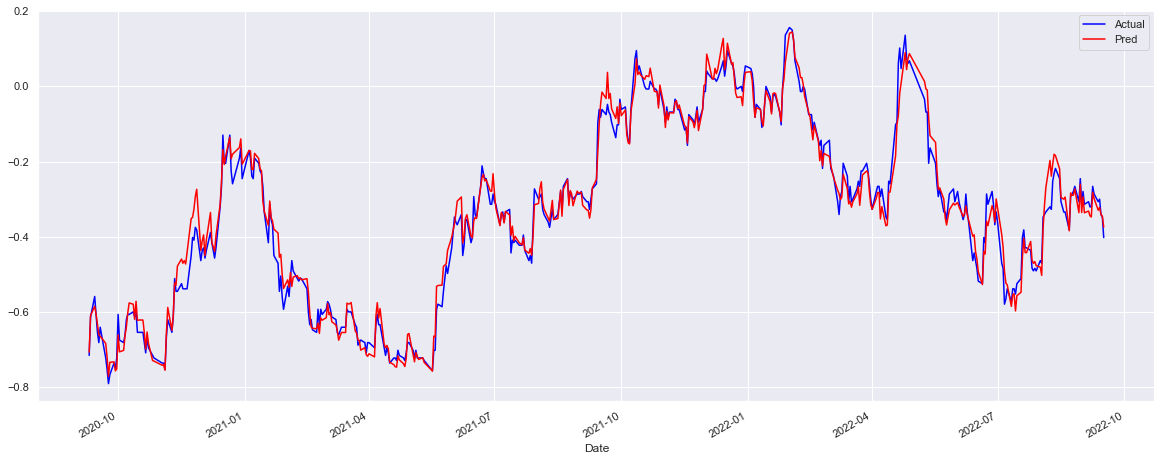

In [15]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [16]:
from joblib import load

In [17]:
close_scaler = load('../feature_engineering/excl_close_scaler.bin')

In [18]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [19]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,2052.860352,2040.0
2020-09-11,2195.316650,2190.0


**Plot error distribution**

In [20]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

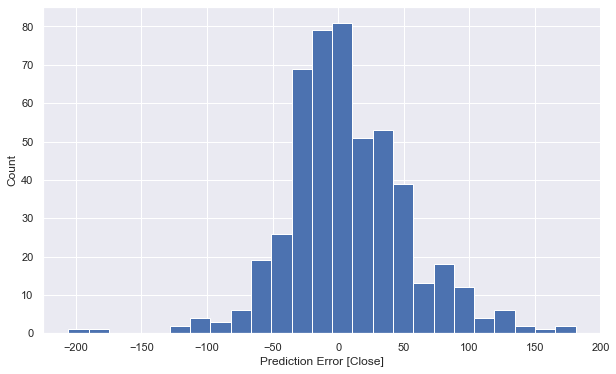

In [21]:
plotErrorHist(inversed)

**RMSE**

In [22]:
from statsmodels.tools.eval_measures import rmse

In [23]:
rmse(inversed['Pred'], inversed['Actual'])

47.70275447313665

**MAPE**

In [24]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [25]:
mape(inversed['Actual'], inversed['Pred'])

1.3702777462499105

**R-squared**

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9811260181188659

### Save Model

In [28]:
# Save model
model.save_model('./models/excl.json')